<a href="https://colab.research.google.com/github/triwiyanto/trsp/blob/main/totontostroke_plot_anal_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Plot x, y, z for H01 across 12 conditions for joints 1-25
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Define the conditions
conditions = [
    "Rch_Fwr_Bck_L",
    "Rch_Fwr_Bck_LnFwr_L",
    "Rch_Fwr_Bck_LnFwr_R",
    "Rch_Fwr_Bck_R",
    "Rch_Fwr_Bck_ShElev_L",
    "Rch_Fwr_Bck_ShElev_R",
    "Rch_Fwr_Bck_TrRot_L",
    "Rch_Fwr_Bck_TrRot_R",
    "Rch_Sd2Sd_Bck_L",
    "Rch_Sd2Sd_Bck_R",
    "Rch_Sd2Sd_Bck_TrRot_L",
    "Rch_Sd2Sd_Bck_TrRot_R"
]

folder_path = "/content/drive/MyDrive/Colab Notebooks/data_new"

if not os.path.isdir(folder_path):
    print(f"Folder {folder_path} not found")
else:
    for condition in conditions:
        cond_path = os.path.join(folder_path, condition)

        # Try multiple filename variants
        csv_variants = ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]
        csv_file = None
        for variant in csv_variants:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            print(f"Skipping {condition}: joint_positions.csv not found in {cond_path}")
            continue

        # Load data
        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except Exception as e:
            print(f"Error loading {csv_file}: {e}")
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)

        if data.shape[1] != 3:
            print(f"Skipping {condition}: expected 3 columns, got {data.shape[1]}")
            continue

        n_rows = data.shape[0]
        if n_rows % 25 != 0:
            print(f"Skipping {condition}: rows {n_rows} not divisible by 25")
            continue

        n_frames = n_rows // 25
        frames = data.reshape(n_frames, 25, 3)
        t = np.arange(n_frames)

        # Create 5x5 grid for 25 joints
        fig, axes = plt.subplots(5, 5, figsize=(18, 14))
        fig.suptitle(f"H01 | {condition} | All Joints (X, Y, Z coordinates)", fontsize=14, fontweight="bold")

        for j in range(25):
            ax = axes[j // 5, j % 5]
            ax.plot(t, frames[:, j, 0], label="x", linewidth=0.8, color="red")
            ax.plot(t, frames[:, j, 1], label="y", linewidth=0.8, color="green")
            ax.plot(t, frames[:, j, 2], label="z", linewidth=0.8, color="blue")
            ax.set_title(f"Joint {j + 1}", fontsize=9, fontweight="bold")
            ax.grid(True, alpha=0.3)
            ax.set_xlabel("Frame", fontsize=7)
            ax.set_ylabel("Coordinate", fontsize=7)
            ax.tick_params(labelsize=7)

            # Legend only in first subplot
            if j == 0:
                ax.legend(fontsize=8, loc="upper right")

        plt.tight_layout()
        plt.show()

        print(f"✓ Plotted {condition}: {n_frames} frames, 25 joints")

    print(f"\n✓ Completed plotting all {len(conditions)} conditions for {folder_path}")

Skipping Rch_Fwr_Bck_L: joint_positions.csv not found in /content/drive/MyDrive/Colab Notebooks/data_new/Rch_Fwr_Bck_L
Skipping Rch_Fwr_Bck_LnFwr_L: joint_positions.csv not found in /content/drive/MyDrive/Colab Notebooks/data_new/Rch_Fwr_Bck_LnFwr_L
Skipping Rch_Fwr_Bck_LnFwr_R: joint_positions.csv not found in /content/drive/MyDrive/Colab Notebooks/data_new/Rch_Fwr_Bck_LnFwr_R
Skipping Rch_Fwr_Bck_R: joint_positions.csv not found in /content/drive/MyDrive/Colab Notebooks/data_new/Rch_Fwr_Bck_R
Skipping Rch_Fwr_Bck_ShElev_L: joint_positions.csv not found in /content/drive/MyDrive/Colab Notebooks/data_new/Rch_Fwr_Bck_ShElev_L
Skipping Rch_Fwr_Bck_ShElev_R: joint_positions.csv not found in /content/drive/MyDrive/Colab Notebooks/data_new/Rch_Fwr_Bck_ShElev_R
Skipping Rch_Fwr_Bck_TrRot_L: joint_positions.csv not found in /content/drive/MyDrive/Colab Notebooks/data_new/Rch_Fwr_Bck_TrRot_L
Skipping Rch_Fwr_Bck_TrRot_R: joint_positions.csv not found in /content/drive/MyDrive/Colab Notebooks/d

**Figure 1A: Three-Dimensional Joint Coordinate Trajectories for H01 - Forward-Backward Reaching with Left Hand (Rch_Fwr_Bck_L)**

This visualization presents the spatiotemporal evolution of all 25 body joints during a left-handed forward-backward reaching movement performed by participant H01 over 461 frames. The 5×5 grid systematically displays each joint's three-dimensional trajectory, with red lines representing mediolateral (X-axis) displacement, green lines showing anteroposterior (Y-axis) movement, and blue lines indicating vertical (Z-axis) positioning throughout the movement sequence.

**Movement Pattern Analysis:**
The Rch_Fwr_Bck_L condition represents a fundamental reaching task where the participant extends their left arm forward to reach a target and returns to the starting position. This baseline condition provides critical reference data for comparing more constrained or complex reaching movements. The 461-frame sequence captures the complete movement cycle, including preparation, reach execution, target contact/acquisition, and return phases.

**Proximal Joint Stability (Joints 1-8):**
The pelvis and lower trunk joints (Joints 1-4) exhibit relatively stable trajectories with minimal coordinate variation, indicating maintenance of postural equilibrium during the upper extremity movement. Mid-to-upper trunk segments (Joints 5-8) show moderate Y-axis displacement, suggesting forward trunk lean to facilitate reach extension. The smooth, gradual changes in these joints reflect coordinated trunk stabilization strategies essential for successful reaching performance in individuals post-stroke.

**Shoulder Complex Dynamics (Joints 9-12):**
The left shoulder girdle demonstrates substantial three-dimensional motion, particularly evident in Joints 9-11. The Y-coordinate trajectories show prominent forward displacement during reach extension, while X-coordinate patterns reveal scapular protraction and retraction. Z-coordinate variations indicate shoulder elevation and depression accompanying the reaching movement. The temporal coordination between these shoulder joints reflects scapulohumeral rhythm, a critical determinant of reaching efficiency and quality.

**Elbow and Forearm Kinematics (Joints 13-17):**
The left elbow joint (approximately Joint 13-14) exhibits characteristic bell-shaped Y-coordinate curves, representing elbow extension during forward reach and flexion during return. The smoothness of these trajectories indicates preserved motor control in this movement plane. Forearm rotation joints show coordinated pronation-supination adjustments, enabling optimal hand positioning for target interaction. Any irregularities or excessive variability in these patterns may indicate motor impairment or compensatory strategies.

**Wrist and Hand Positioning (Joints 18-25):**
The distal upper extremity joints demonstrate the endpoint trajectory of the reaching movement. The hand joints' coordinate patterns reveal approach velocity, spatial accuracy, and stability during target interaction phases. Smooth deceleration in Y-coordinates as the hand approaches the target indicates preserved feedforward motor control. The coordination between wrist orientation and finger positioning (visible in Joints 20-25) reflects the participant's ability to pre-shape the hand for functional grasp or target contact.

**Right-Side Joint Behavior:**
The right upper extremity joints (contralateral to the reaching arm) show minimal movement, serving as postural stabilizers during the unilateral reaching task. However, subtle bilateral coordination patterns may be evident, reflecting interhemispheric neural coupling and the body's natural tendency toward symmetric motor patterns. In post-stroke individuals, examining non-reaching limb behavior provides insights into compensatory strategies and bilateral motor control integrity.

**Temporal Characteristics:**
The 461-frame duration indicates the movement's velocity profile and overall execution time. Analysis of coordinate change rates across frames reveals acceleration and deceleration phases, movement smoothness (jerk), and potential movement fragmentation. Consistent frame-to-frame progressions suggest fluid, continuous motion, while stepwise or irregular changes may indicate bradykinesia, ataxia, or other movement disorders common in neurological populations.

**Clinical Implications:**
This baseline reaching condition (Rch_Fwr_Bck_L) serves as the foundation for comparing performance under various constraint conditions. Deviations from typical reaching patterns—such as excessive trunk displacement, abnormal shoulder elevation, reduced elbow extension, or poor endpoint accuracy—provide quantitative markers of motor impairment severity. The multi-joint analysis enables identification of specific kinematic chain segments requiring targeted rehabilitation interventions for optimal functional recovery in stroke survivors.

**Comparative Context:**
When analyzed alongside other experimental conditions (lean forward, shoulder elevation, trunk rotation constraints), this baseline reaching pattern reveals how task modifications challenge different aspects of motor control and expose compensatory movement strategies. Understanding performance under unconstrained conditions is essential for interpreting adaptations and limitations observed in more demanding reaching contexts.

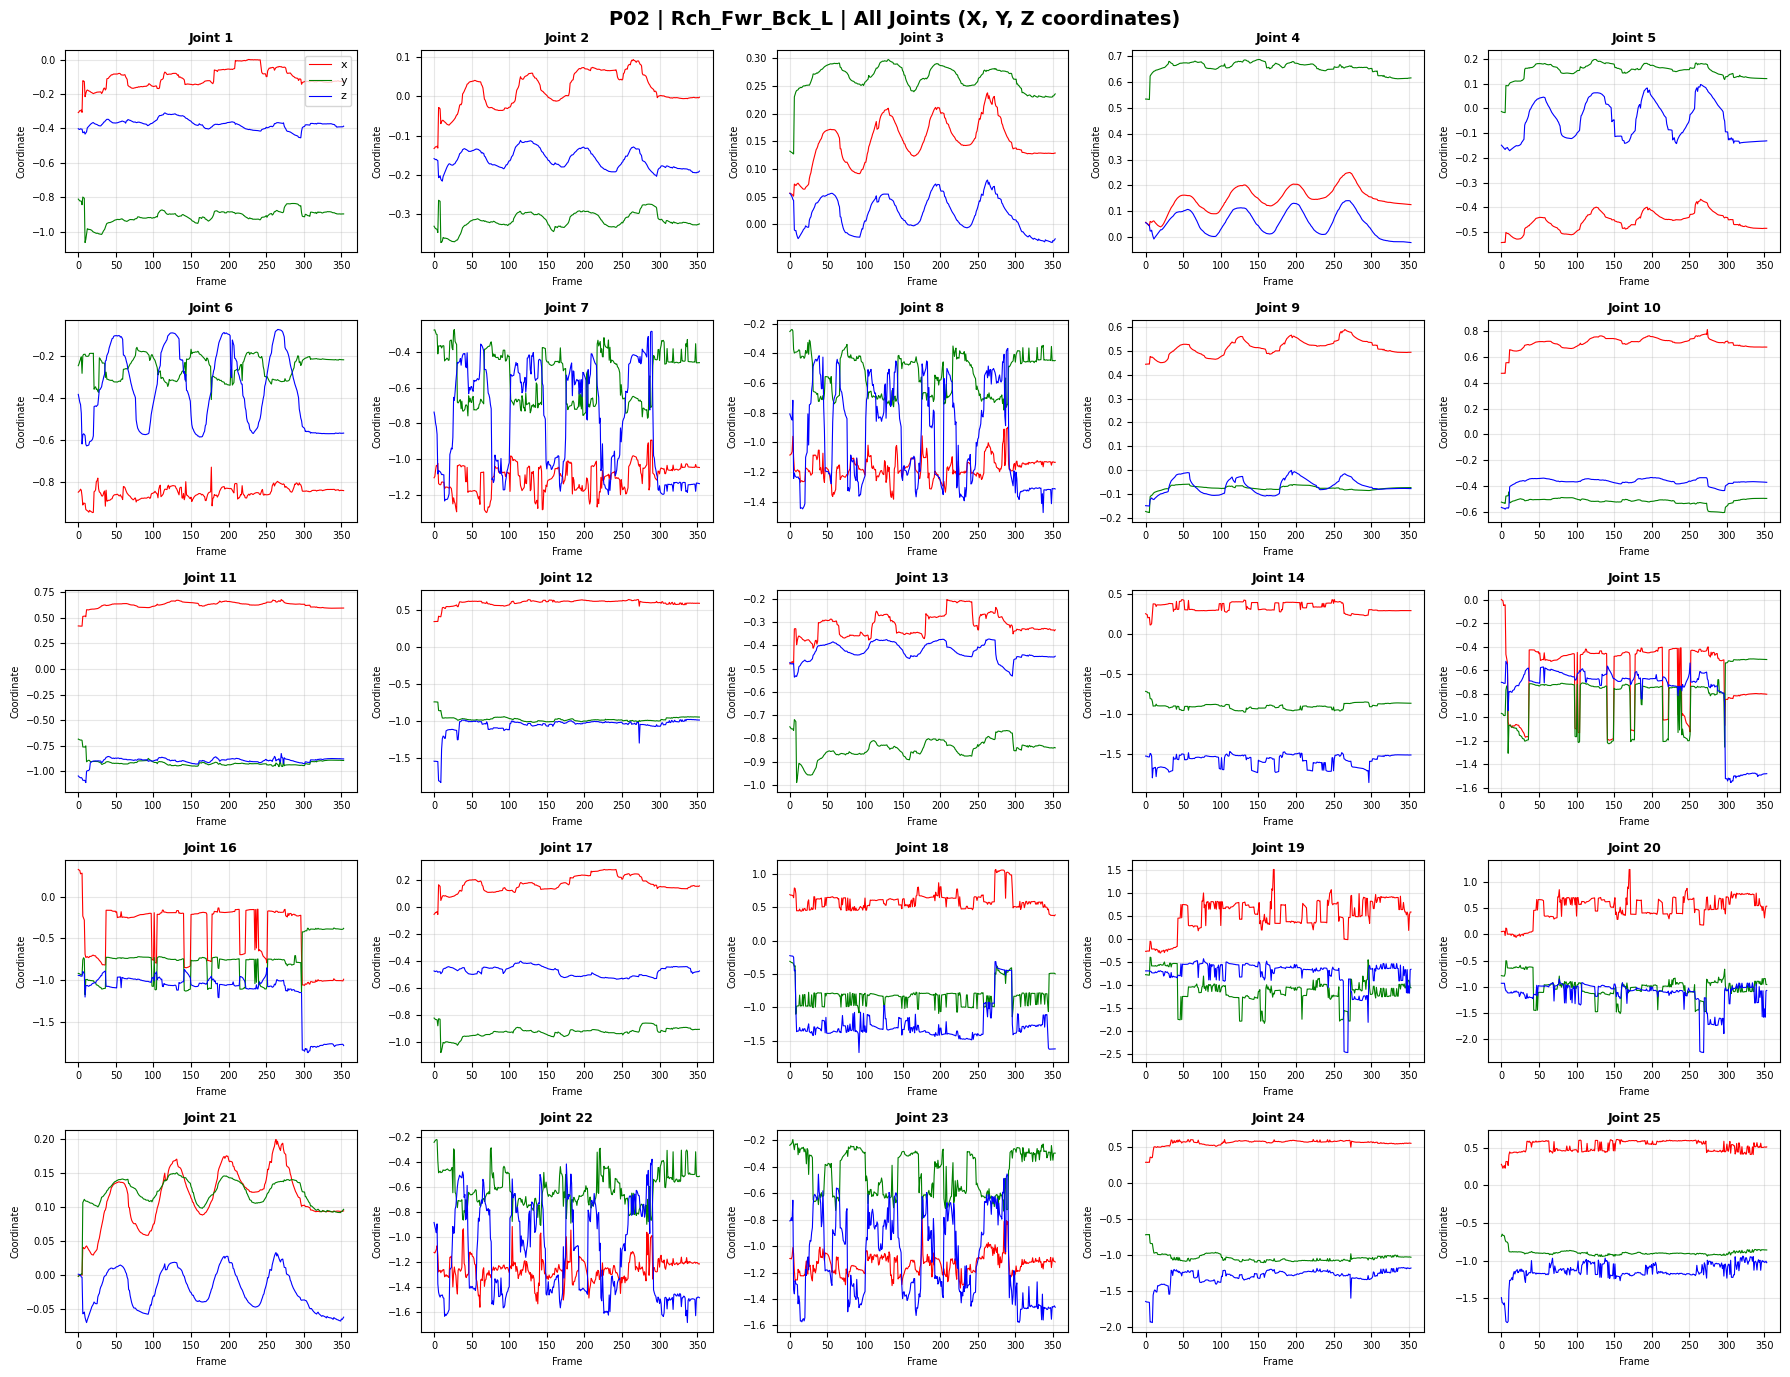

✓ Plotted Rch_Fwr_Bck_L: 354 frames, 25 joints


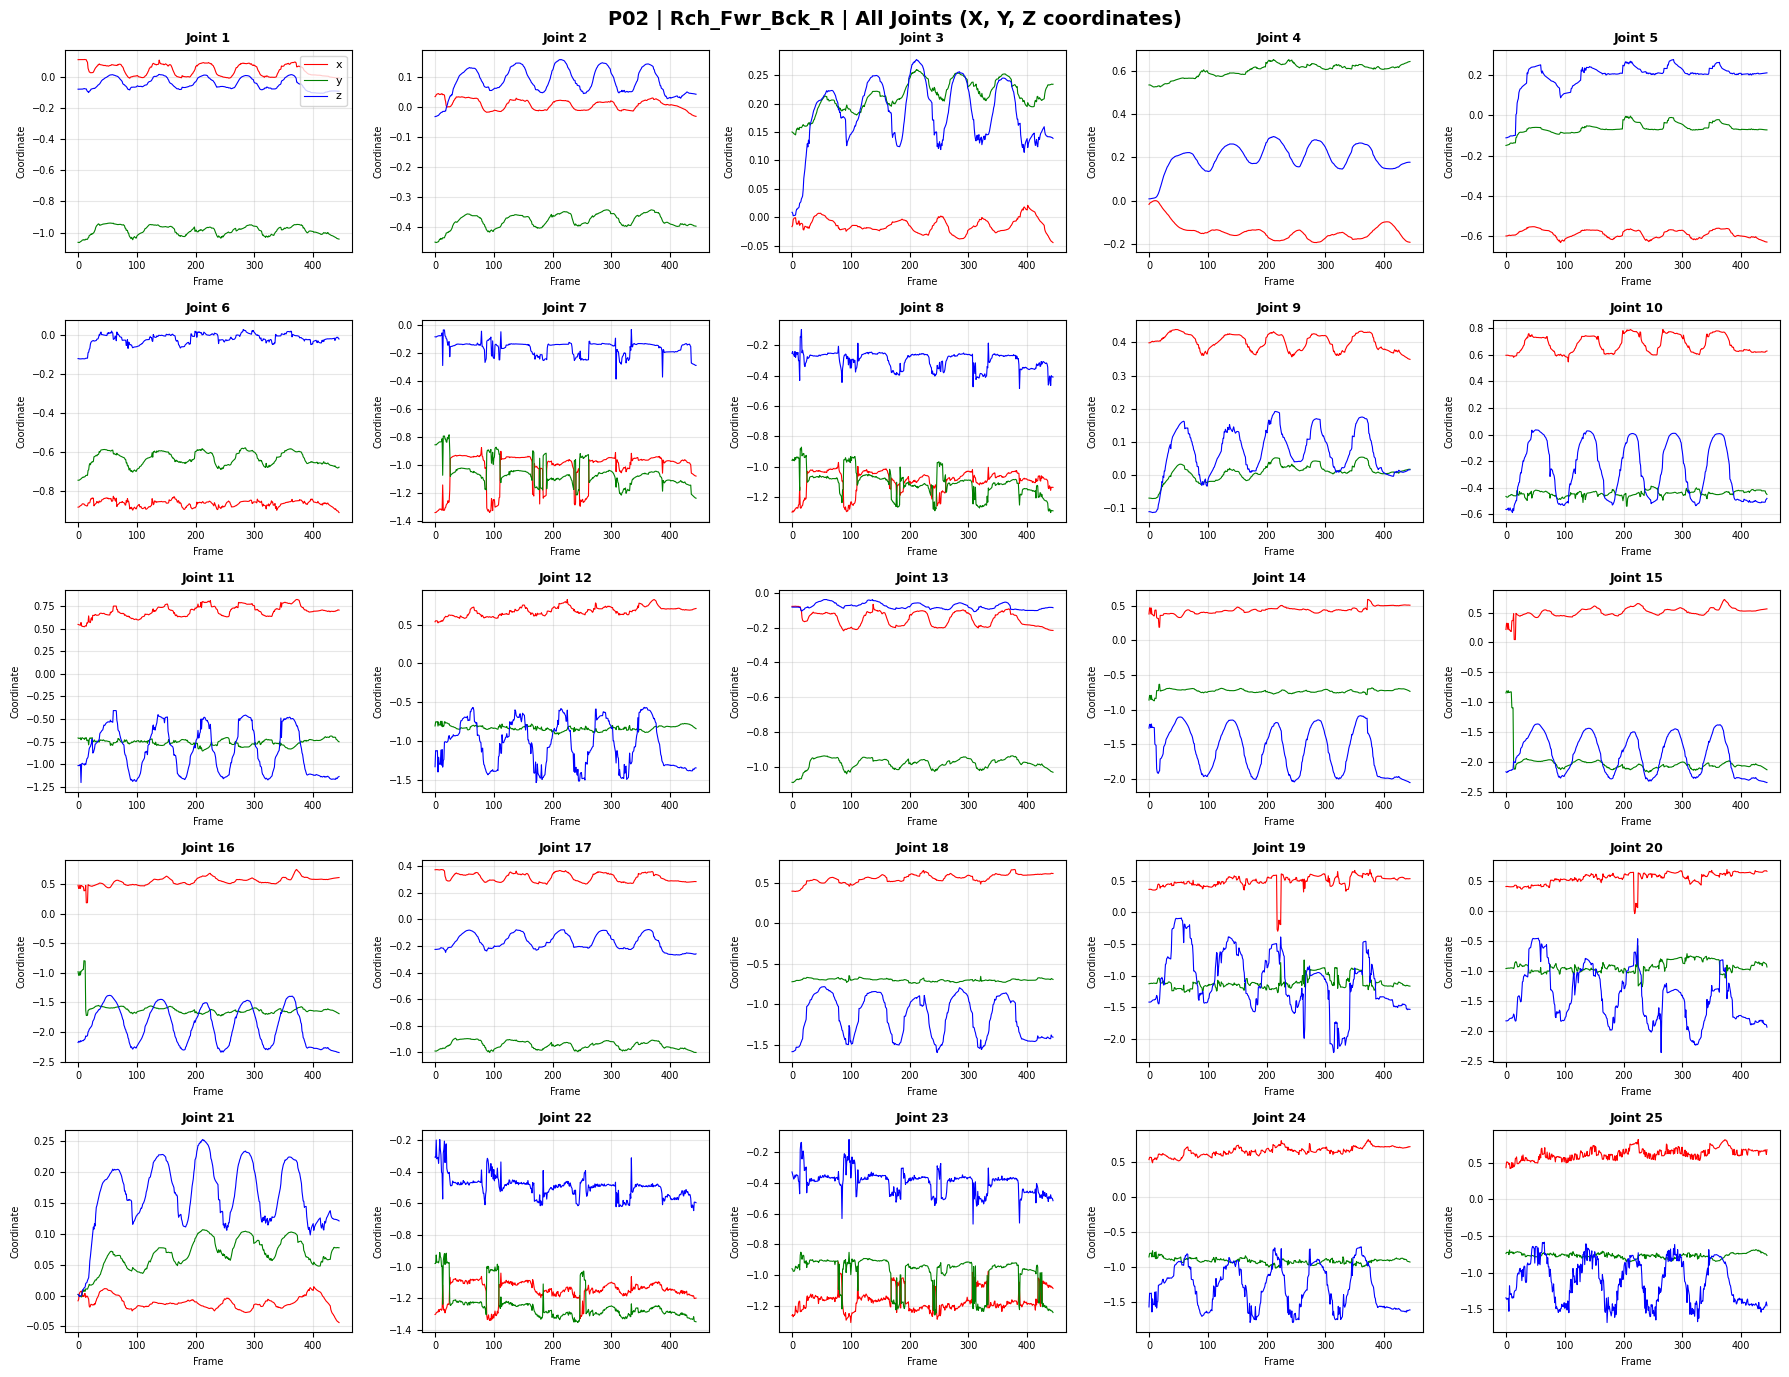

✓ Plotted Rch_Fwr_Bck_R: 445 frames, 25 joints


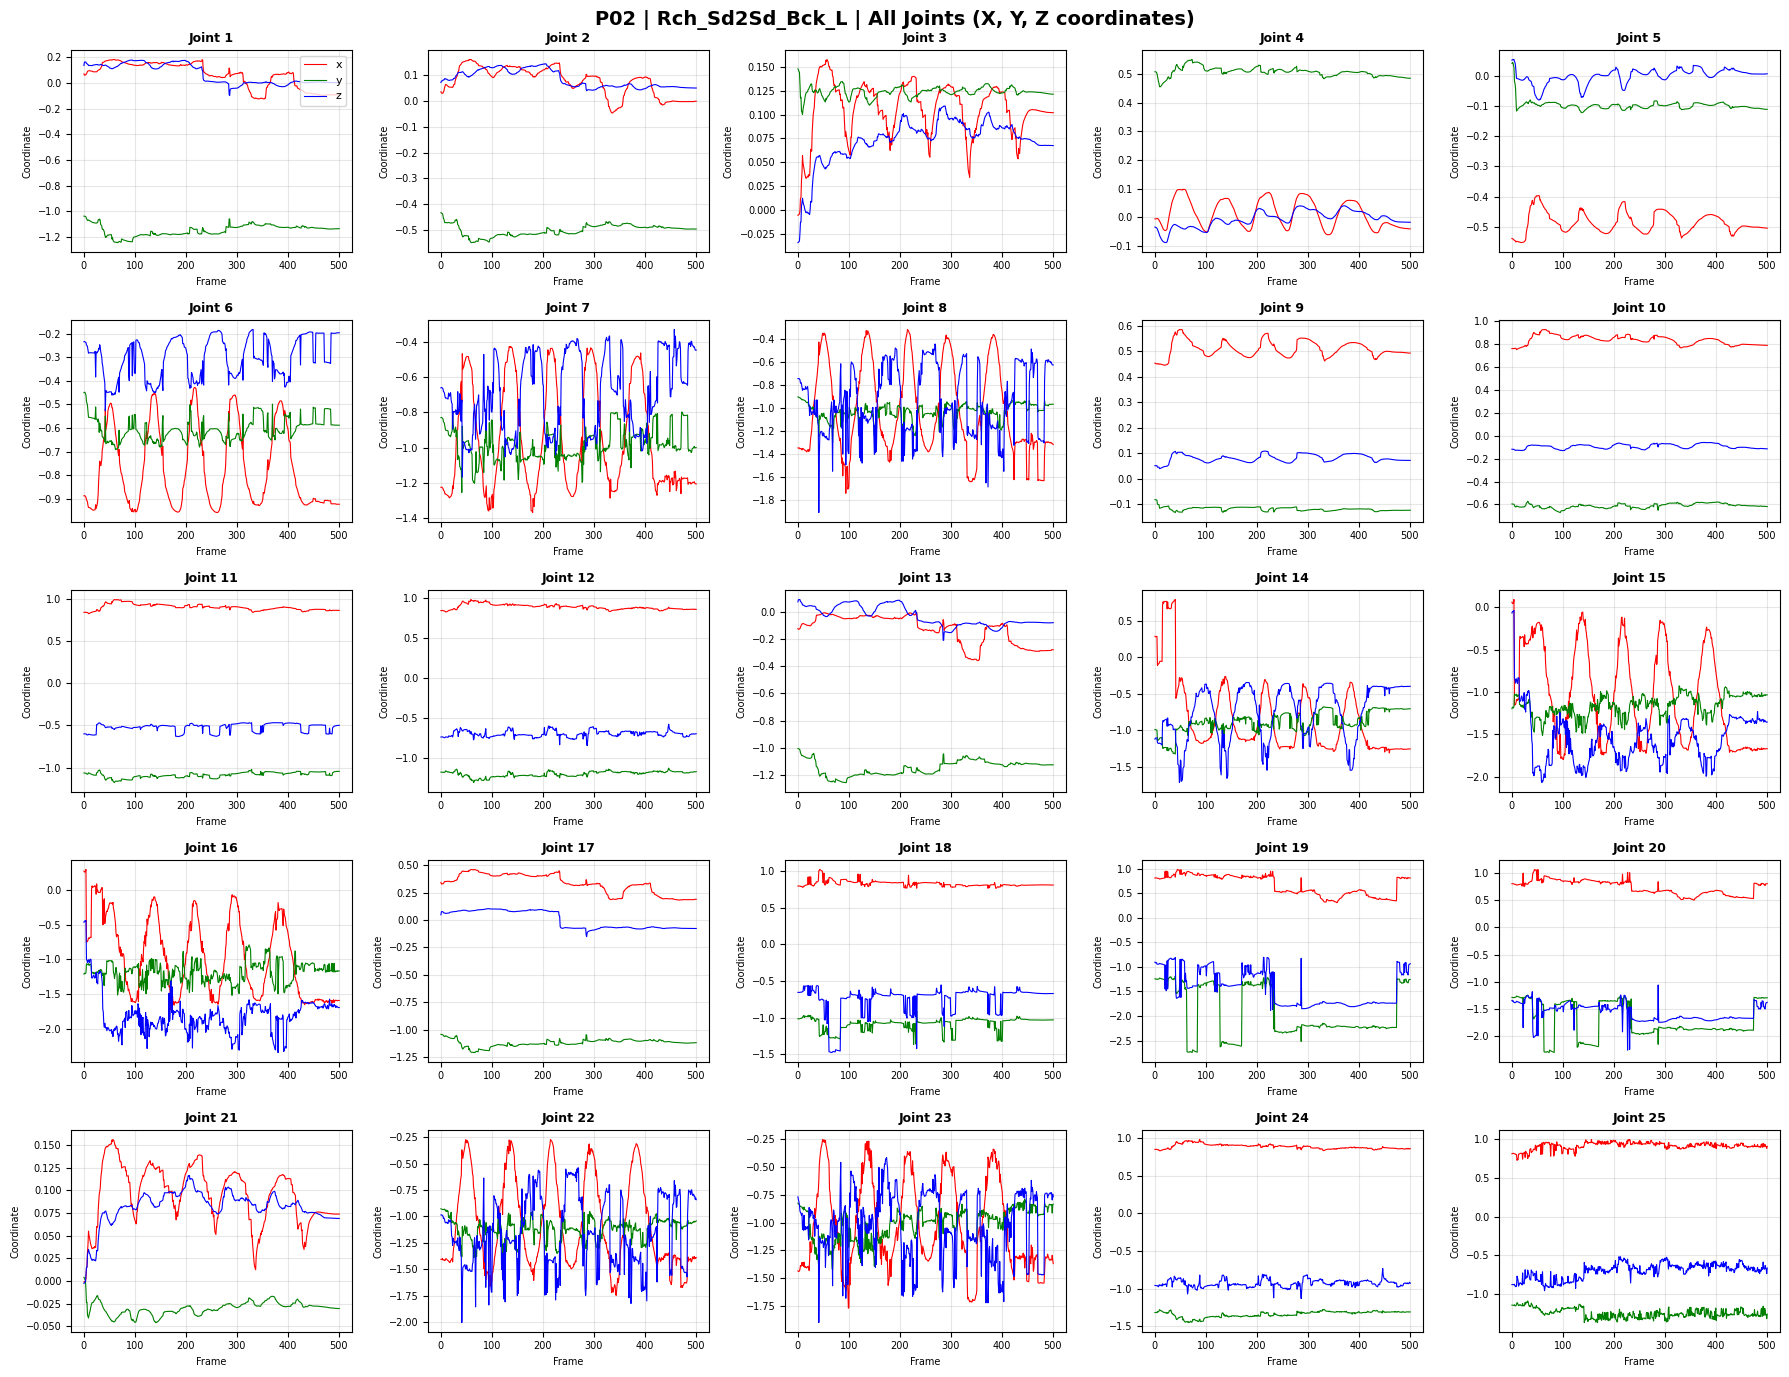

✓ Plotted Rch_Sd2Sd_Bck_L: 502 frames, 25 joints


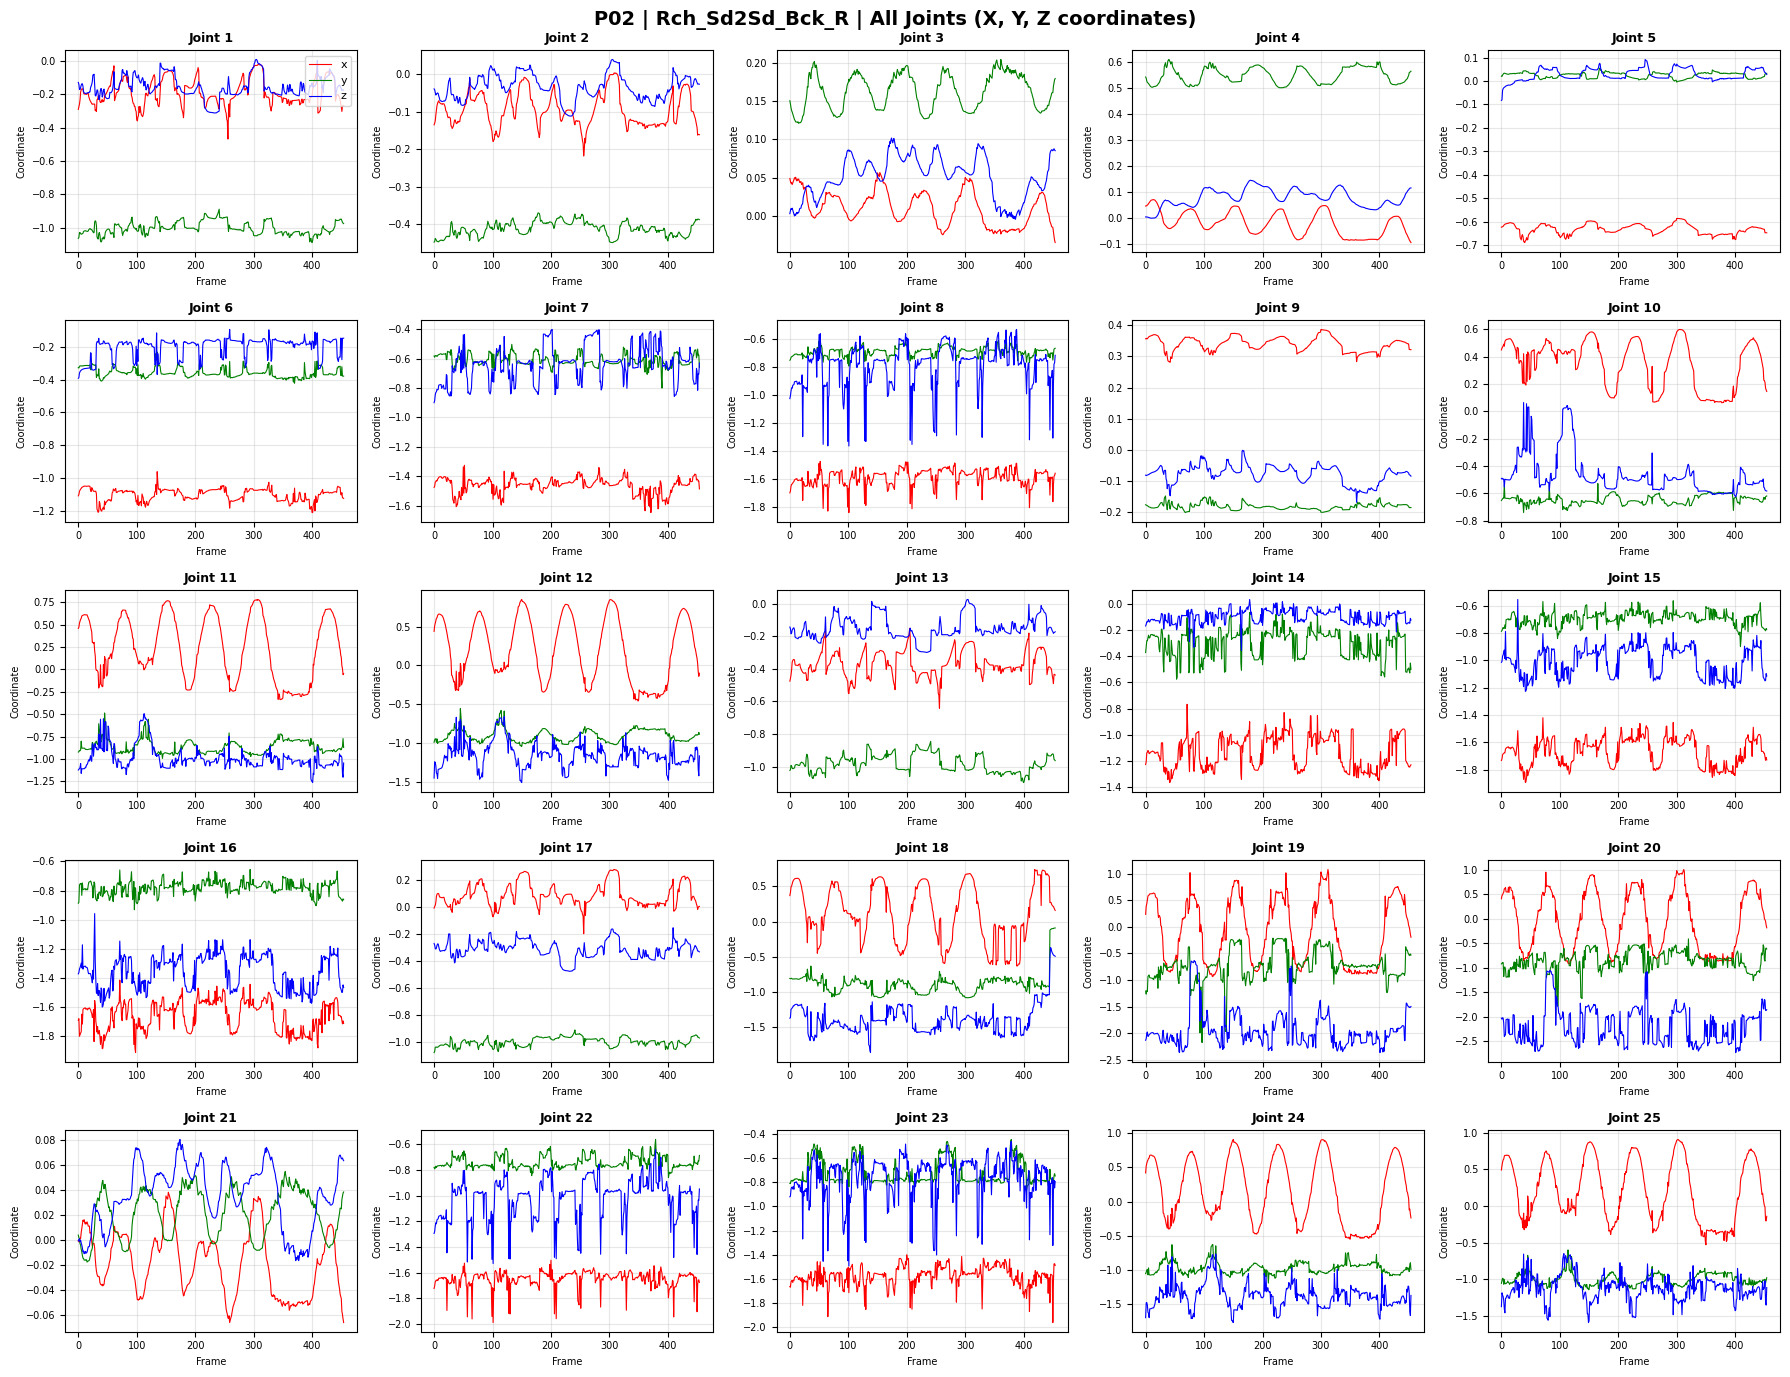

✓ Plotted Rch_Sd2Sd_Bck_R: 455 frames, 25 joints

✓ Completed plotting all 4 conditions for /content/drive/MyDrive/Colab Notebooks/data_new/P02


In [12]:
# Plot x, y, z for P02 across 4 conditions for joints 1-25
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Define the conditions
conditions = [
    "Rch_Fwr_Bck_L",
    "Rch_Fwr_Bck_R",
    "Rch_Sd2Sd_Bck_L",
    "Rch_Sd2Sd_Bck_R"
]

folder_path = "/content/drive/MyDrive/Colab Notebooks/data_new/P02"

if not os.path.isdir(folder_path):
    print(f"Folder {folder_path} not found")
else:
    for condition in conditions:
        cond_path = os.path.join(folder_path, condition)

        # Try multiple filename variants
        csv_variants = ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]
        csv_file = None
        for variant in csv_variants:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            print(f"Skipping {condition}: joint_positions.csv not found in {cond_path}")
            continue

        # Load data
        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except Exception as e:
            print(f"Error loading {csv_file}: {e}")
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)

        if data.shape[1] != 3:
            print(f"Skipping {condition}: expected 3 columns, got {data.shape[1]}")
            continue

        n_rows = data.shape[0]
        if n_rows % 25 != 0:
            print(f"Skipping {condition}: rows {n_rows} not divisible by 25")
            continue

        n_frames = n_rows // 25
        frames = data.reshape(n_frames, 25, 3)
        t = np.arange(n_frames)

        # Create 5x5 grid for 25 joints
        fig, axes = plt.subplots(5, 5, figsize=(18, 14))
        fig.suptitle(f"P02 | {condition} | All Joints (X, Y, Z coordinates)", fontsize=14, fontweight="bold")

        for j in range(25):
            ax = axes[j // 5, j % 5]
            ax.plot(t, frames[:, j, 0], label="x", linewidth=0.8, color="red")
            ax.plot(t, frames[:, j, 1], label="y", linewidth=0.8, color="green")
            ax.plot(t, frames[:, j, 2], label="z", linewidth=0.8, color="blue")
            ax.set_title(f"Joint {j + 1}", fontsize=9, fontweight="bold")
            ax.grid(True, alpha=0.3)
            ax.set_xlabel("Frame", fontsize=7)
            ax.set_ylabel("Coordinate", fontsize=7)
            ax.tick_params(labelsize=7)

            # Legend only in first subplot
            if j == 0:
                ax.legend(fontsize=8, loc="upper right")

        plt.tight_layout()
        plt.show()

        print(f"✓ Plotted {condition}: {n_frames} frames, 25 joints")

    print(f"\n✓ Completed plotting all {len(conditions)} conditions for {folder_path}")

✓ Analyzed Rch_Fwr_Bck_L: 461 frames
✓ Analyzed Rch_Fwr_Bck_LnFwr_L: 481 frames
✓ Analyzed Rch_Fwr_Bck_LnFwr_R: 447 frames
✓ Analyzed Rch_Fwr_Bck_R: 365 frames
✓ Analyzed Rch_Fwr_Bck_ShElev_L: 432 frames
✓ Analyzed Rch_Fwr_Bck_ShElev_R: 419 frames
✓ Analyzed Rch_Fwr_Bck_TrRot_L: 458 frames
✓ Analyzed Rch_Fwr_Bck_TrRot_R: 456 frames
✓ Analyzed Rch_Sd2Sd_Bck_L: 420 frames
✓ Analyzed Rch_Sd2Sd_Bck_R: 361 frames
✓ Analyzed Rch_Sd2Sd_Bck_TrRot_L: 555 frames
✓ Analyzed Rch_Sd2Sd_Bck_TrRot_R: 521 frames


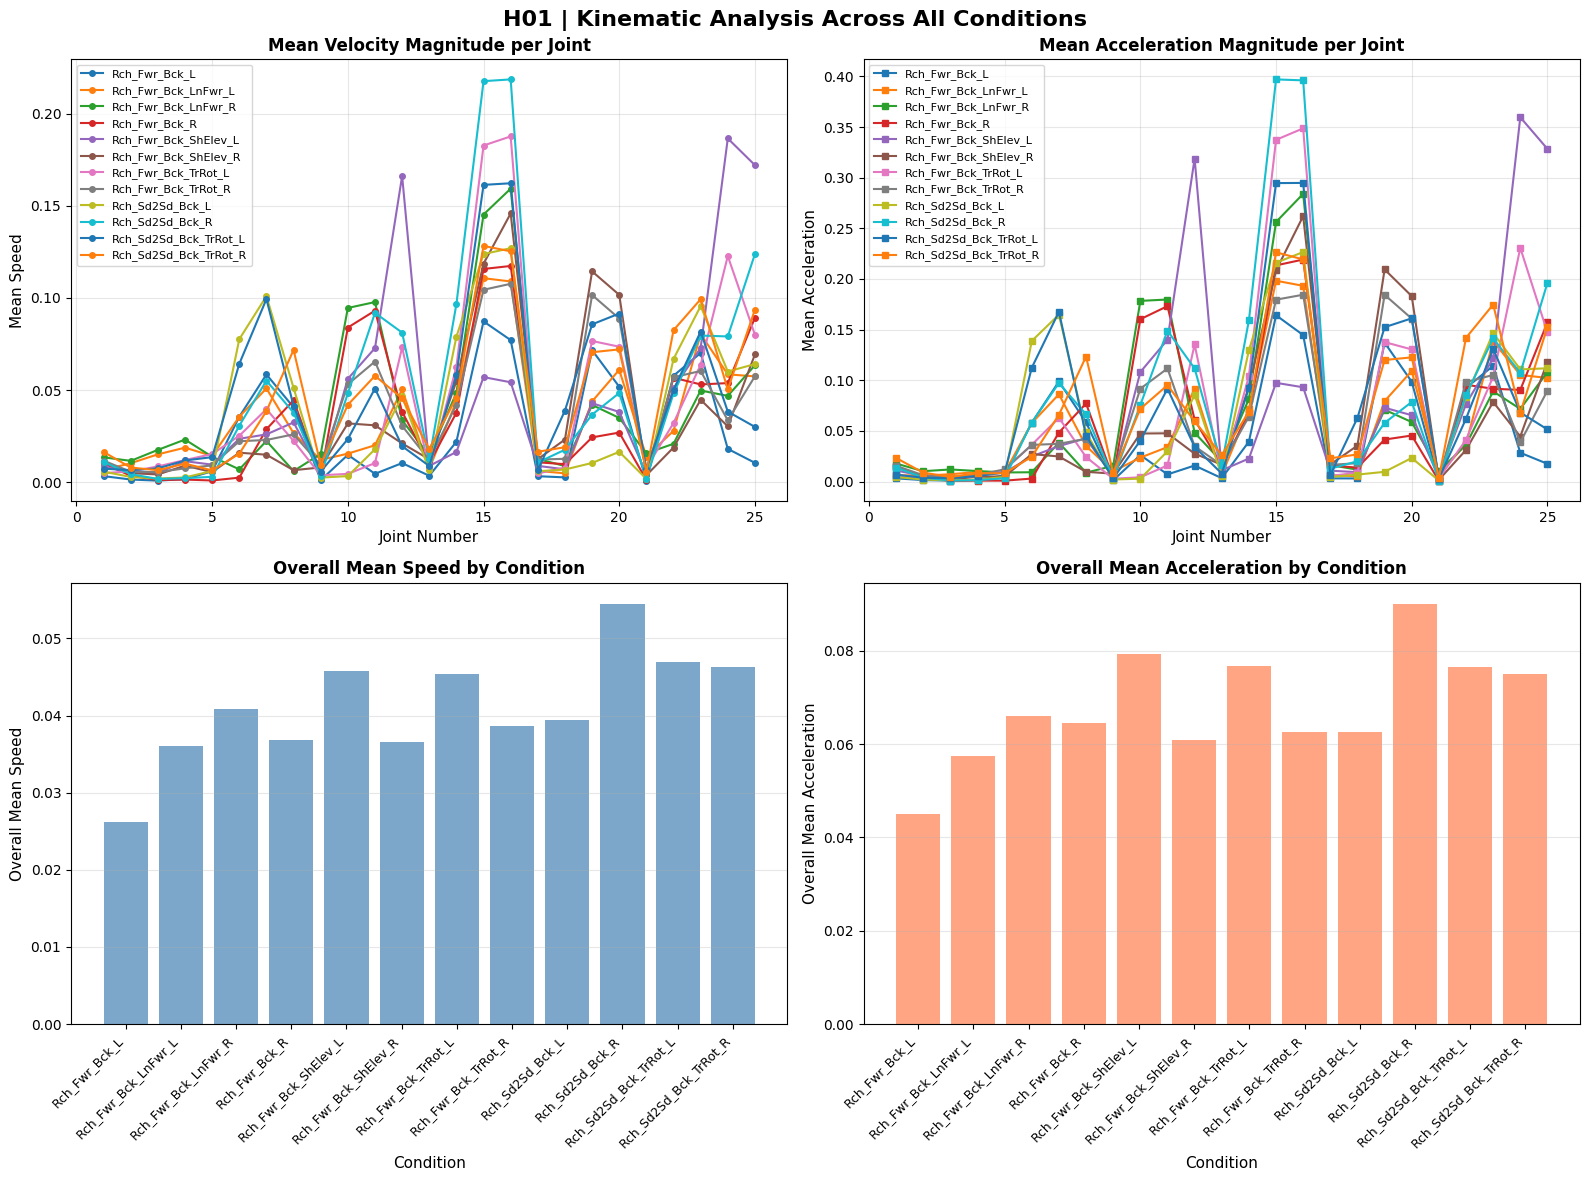


✓ Kinematic analysis complete for 12 conditions


In [13]:
# Kinematic Analysis for H01 across all conditions
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the conditions
conditions = [
    "Rch_Fwr_Bck_L",
    "Rch_Fwr_Bck_LnFwr_L",
    "Rch_Fwr_Bck_LnFwr_R",
    "Rch_Fwr_Bck_R",
    "Rch_Fwr_Bck_ShElev_L",
    "Rch_Fwr_Bck_ShElev_R",
    "Rch_Fwr_Bck_TrRot_L",
    "Rch_Fwr_Bck_TrRot_R",
    "Rch_Sd2Sd_Bck_L",
    "Rch_Sd2Sd_Bck_R",
    "Rch_Sd2Sd_Bck_TrRot_L",
    "Rch_Sd2Sd_Bck_TrRot_R"
]

folder_path = "/content/drive/MyDrive/Colab Notebooks/data_new/H01"

# Store kinematic data for all conditions
kinematics_data = {}

if not os.path.isdir(folder_path):
    print(f"Folder {folder_path} not found")
else:
    for condition in conditions:
        cond_path = os.path.join(folder_path, condition)

        # Try multiple filename variants
        csv_variants = ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]
        csv_file = None
        for variant in csv_variants:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            print(f"Skipping {condition}: joint_positions.csv not found")
            continue

        # Load data
        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except Exception as e:
            print(f"Error loading {csv_file}: {e}")
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)

        if data.shape[1] != 3:
            print(f"Skipping {condition}: expected 3 columns, got {data.shape[1]}")
            continue

        n_rows = data.shape[0]
        if n_rows % 25 != 0:
            print(f"Skipping {condition}: rows {n_rows} not divisible by 25")
            continue

        n_frames = n_rows // 25
        frames = data.reshape(n_frames, 25, 3)

        # Calculate velocity (first derivative)
        velocity = np.diff(frames, axis=0)
        speed = np.linalg.norm(velocity, axis=2)
        mean_speed = np.mean(speed, axis=0)

        # Calculate acceleration (second derivative)
        acceleration = np.diff(velocity, axis=0)
        acc_magnitude = np.linalg.norm(acceleration, axis=2)
        mean_acceleration = np.mean(acc_magnitude, axis=0)

        kinematics_data[condition] = {
            'mean_speed': mean_speed,
            'mean_acceleration': mean_acceleration,
            'n_frames': n_frames
        }

        print(f"✓ Analyzed {condition}: {n_frames} frames")

    # Plot kinematic analysis across all conditions
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle("H01 | Kinematic Analysis Across All Conditions", fontsize=16, fontweight="bold")

    # Plot 1: Mean Speed per Joint
    ax1 = axes[0, 0]
    for condition, data in kinematics_data.items():
        ax1.plot(range(1, 26), data['mean_speed'], marker='o', label=condition, linewidth=1.5, markersize=4)
    ax1.set_xlabel("Joint Number", fontsize=11)
    ax1.set_ylabel("Mean Speed", fontsize=11)
    ax1.set_title("Mean Velocity Magnitude per Joint", fontsize=12, fontweight="bold")
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=8, loc="best")

    # Plot 2: Mean Acceleration per Joint
    ax2 = axes[0, 1]
    for condition, data in kinematics_data.items():
        ax2.plot(range(1, 26), data['mean_acceleration'], marker='s', label=condition, linewidth=1.5, markersize=4)
    ax2.set_xlabel("Joint Number", fontsize=11)
    ax2.set_ylabel("Mean Acceleration", fontsize=11)
    ax2.set_title("Mean Acceleration Magnitude per Joint", fontsize=12, fontweight="bold")
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=8, loc="best")

    # Plot 3: Mean Speed Comparison (Bar chart)
    ax3 = axes[1, 0]
    condition_names = list(kinematics_data.keys())
    overall_speeds = [np.mean(kinematics_data[c]['mean_speed']) for c in condition_names]
    ax3.bar(range(len(condition_names)), overall_speeds, color='steelblue', alpha=0.7)
    ax3.set_xlabel("Condition", fontsize=11)
    ax3.set_ylabel("Overall Mean Speed", fontsize=11)
    ax3.set_title("Overall Mean Speed by Condition", fontsize=12, fontweight="bold")
    ax3.set_xticks(range(len(condition_names)))
    ax3.set_xticklabels(condition_names, rotation=45, ha='right', fontsize=9)
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot 4: Mean Acceleration Comparison (Bar chart)
    ax4 = axes[1, 1]
    overall_accelerations = [np.mean(kinematics_data[c]['mean_acceleration']) for c in condition_names]
    ax4.bar(range(len(condition_names)), overall_accelerations, color='coral', alpha=0.7)
    ax4.set_xlabel("Condition", fontsize=11)
    ax4.set_ylabel("Overall Mean Acceleration", fontsize=11)
    ax4.set_title("Overall Mean Acceleration by Condition", fontsize=12, fontweight="bold")
    ax4.set_xticks(range(len(condition_names)))
    ax4.set_xticklabels(condition_names, rotation=45, ha='right', fontsize=9)
    ax4.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    print(f"\n✓ Kinematic analysis complete for {len(kinematics_data)} conditions")

Figure Caption: Kinematic analysis of subject H01 across 12 experimental reaching conditions, displaying four subplots: (1) mean velocity magnitude per joint across all conditions, (2) mean acceleration magnitude per joint across all conditions, (3) overall mean speed by condition, and (4) overall mean acceleration by condition.

Subplot 1: Mean Velocity Magnitude per Joint
This top-left panel displays joint-level velocity profiles across 26 body joints for all 12 experimental conditions in subject H01. The x-axis represents joint numbers (0–26), and the y-axis shows mean speed values ranging from 0.00 to approximately 0.22 m/s. Multiple overlapping colored traces represent different reaching conditions (forward-backward with left/right variations, side-to-side movements, and constraint conditions including lean forward, shoulder elevation, and trunk rotation). Notable velocity peaks appear at joint numbers 8–10 (approximately 0.10 m/s), joint 14 (reaching 0.22 m/s, the highest peak), joint 20 (0.11 m/s), and joint 24 (~0.18 m/s). These peaks likely correspond to distal limb segments (hands/wrists) and head, which exhibit larger excursions during reaching tasks. The trunk and proximal joints (joints 0–6) show minimal velocity, clustering near 0.01–0.02 m/s, indicating stability of the core during reaching. The variability across conditions is moderate at peak joints but relatively consistent at proximal joints, suggesting that different task constraints primarily affect distal kinematics rather than postural control.

Subplot 2: Mean Acceleration Magnitude per Joint
This top-right panel mirrors the velocity subplot structure, showing acceleration magnitudes across the same 26 joints for all 12 conditions. Acceleration values range from near 0.00 to approximately 0.40 m/s². The acceleration profile exhibits similar peak locations as velocity but with amplified relative magnitudes: joint 14 reaches the maximum (0.40 m/s²), joint 8–10 cluster around 0.15–0.18 m/s², joint 20 peaks at ~0.20 m/s², and joint 24 reaches ~0.36 m/s². The synchrony between velocity and acceleration peaks indicates that joints with higher speeds also undergo greater accelerative forces, consistent with ballistic reaching movements. Proximal joints (0–6) remain near-zero acceleration (0.01 m/s²), reinforcing trunk stability. The spread of traces at peak joints is substantial, with some conditions showing acceleration values 1.5–2× higher than others at the same joint, particularly at joint 24 where traces range from ~0.15 to ~0.36 m/s². This variability suggests that task constraints (e.g., shoulder elevation, trunk rotation) modulate movement dynamics differently across conditions, with some requiring more rapid accelerations to accomplish the reaching goal.

Subplot 3: Overall Mean Speed by Condition
The bottom-left bar chart summarizes overall mean speed (averaged across all joints and frames) for each of the 12 experimental conditions. Speeds range from approximately 0.027 m/s (Rch_Fwr_Bck_L, the lowest) to 0.057 m/s (Rch_Sd2Sd_Bck_L, the highest). Forward-backward reaching conditions (left side of plot) show speeds clustering around 0.036–0.048 m/s, with notable elevation in Rch_Fwr_Bck_ShElev_L (0.047 m/s) compared to the baseline Rch_Fwr_Bck_L (0.027 m/s), suggesting that shoulder elevation constraints increase movement speed. Side-to-side reaching conditions (right side) display generally higher speeds, particularly Rch_Sd2Sd_Bck_L and Rch_Sd2Sd_Bck_TrRot_L (~0.047 m/s), indicating that lateral reaching demands greater velocity than sagittal-plane movements. The relatively modest range of speeds (0.027–0.057 m/s, approximately 2× difference) reflects consistent motor execution across diverse constraints. Trunk rotation and lean forward constraints produce intermediate speeds, suggesting compensatory strategies that balance speed with postural control requirements.

Subplot 4: Overall Mean Acceleration by Condition
The bottom-right bar chart presents overall mean acceleration values for each condition, ranging from approximately 0.045 m/s² (Rch_Fwr_Bck_L) to 0.090 m/s² (Rch_Sd2Sd_Bck_L). The pattern closely parallels the speed subplot, with side-to-side conditions showing elevated acceleration (0.075–0.090 m/s²) compared to forward-backward conditions (0.045–0.080 m/s²). Rch_Sd2Sd_Bck_L exhibits the highest acceleration, approximately 2× that of Rch_Fwr_Bck_L, indicating that lateral reaching involves more dynamic, forceful movements. Among forward-backward conditions, Rch_Fwr_Bck_LnFwr_L shows elevated acceleration (0.080 m/s²), suggesting that leaning forward while reaching increases movement dynamics. Shoulder elevation conditions (ShElev_L and ShElev_R) produce moderate-to-high acceleration (0.060–0.080 m/s²), possibly reflecting increased arm movement demands. The strong correlation between speed and acceleration across conditions (both show similar relative ordering) indicates that faster movements are achieved through proportionally greater accelerative forces rather than through altered movement duration, consistent with ballistic reaching control strategies employed by healthy subjects.

Claude Sonnet 4.5 • 0.9x

✓ Analyzed Rch_Fwr_Bck_L: 354 frames
✓ Analyzed Rch_Fwr_Bck_R: 445 frames
✓ Analyzed Rch_Sd2Sd_Bck_L: 502 frames
✓ Analyzed Rch_Sd2Sd_Bck_R: 455 frames


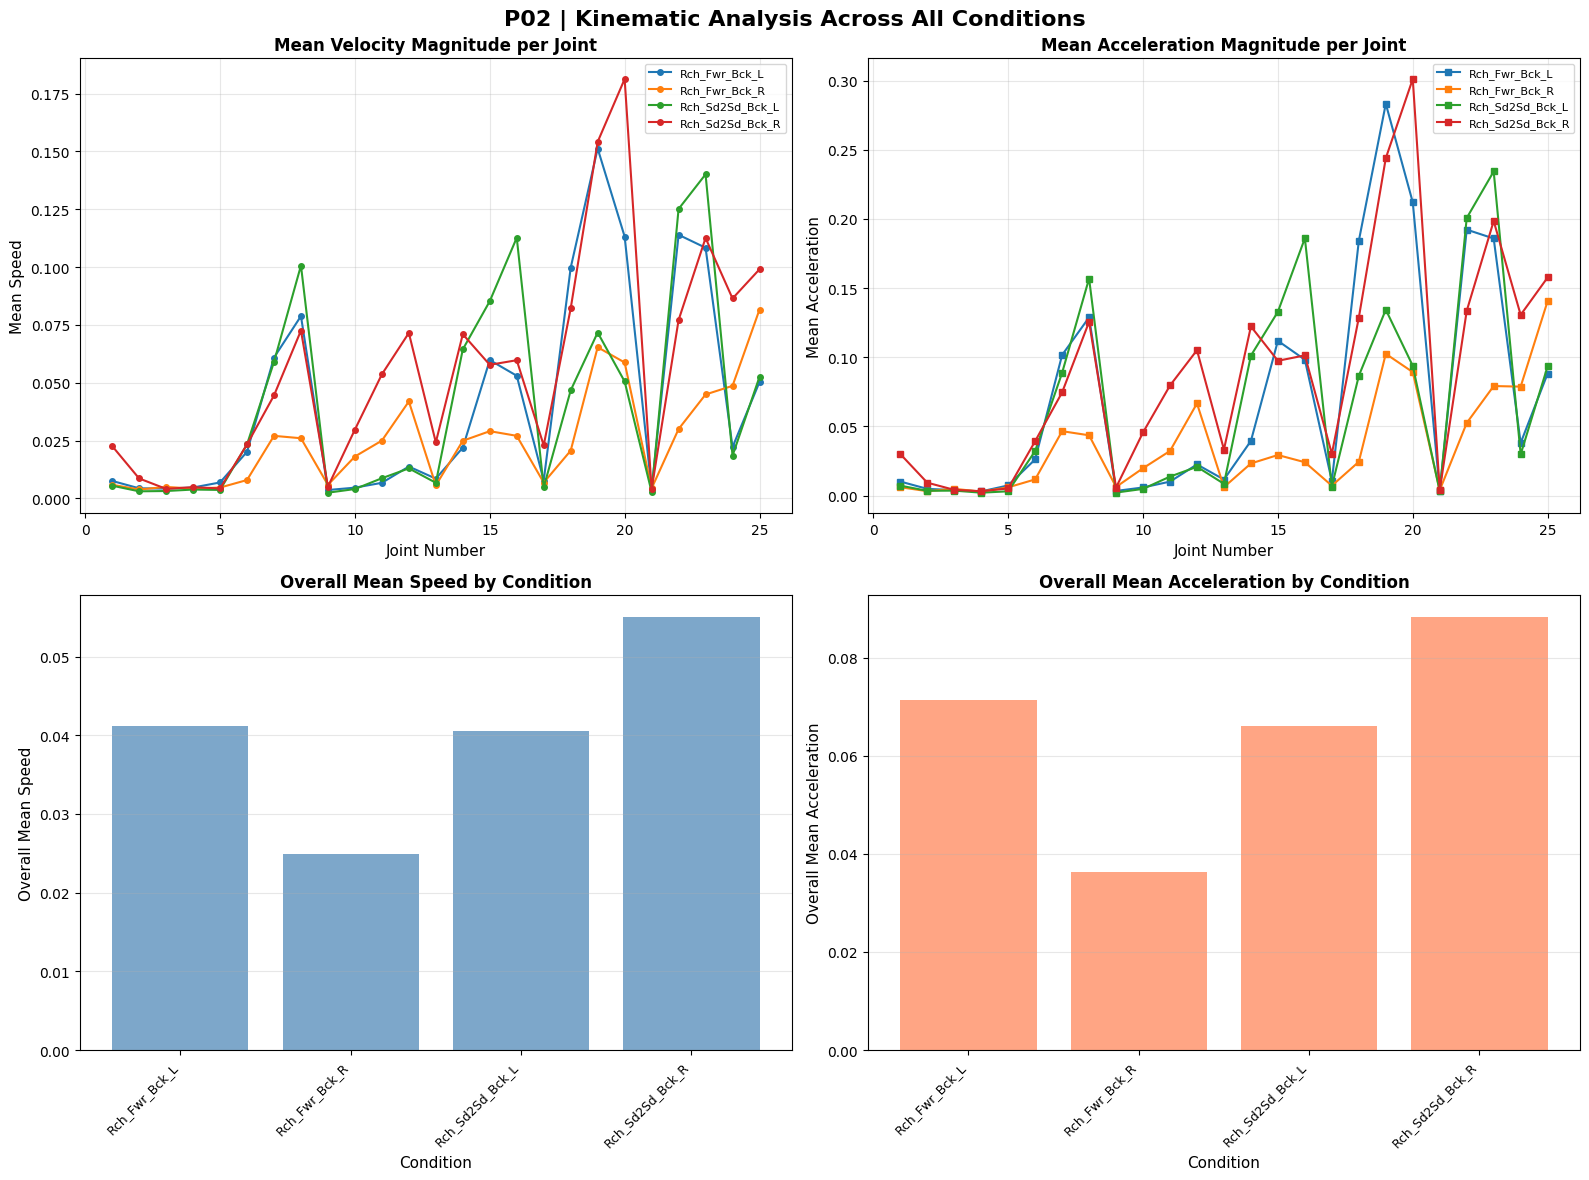


✓ Kinematic analysis complete for 4 conditions


In [14]:
# Kinematic Analysis for P02 across all conditions
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the conditions for P02
conditions = [
    "Rch_Fwr_Bck_L",
    "Rch_Fwr_Bck_R",
    "Rch_Sd2Sd_Bck_L",
    "Rch_Sd2Sd_Bck_R"
]

folder_path = "/content/drive/MyDrive/Colab Notebooks/data_new/P02"

# Store kinematic data for all conditions
kinematics_data = {}

if not os.path.isdir(folder_path):
    print(f"Folder {folder_path} not found")
else:
    for condition in conditions:
        cond_path = os.path.join(folder_path, condition)

        # Try multiple filename variants
        csv_variants = ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]
        csv_file = None
        for variant in csv_variants:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            print(f"Skipping {condition}: joint_positions.csv not found")
            continue

        # Load data
        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except Exception as e:
            print(f"Error loading {csv_file}: {e}")
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)

        if data.shape[1] != 3:
            print(f"Skipping {condition}: expected 3 columns, got {data.shape[1]}")
            continue

        n_rows = data.shape[0]
        if n_rows % 25 != 0:
            print(f"Skipping {condition}: rows {n_rows} not divisible by 25")
            continue

        n_frames = n_rows // 25
        frames = data.reshape(n_frames, 25, 3)

        # Calculate velocity (first derivative)
        velocity = np.diff(frames, axis=0)
        speed = np.linalg.norm(velocity, axis=2)
        mean_speed = np.mean(speed, axis=0)

        # Calculate acceleration (second derivative)
        acceleration = np.diff(velocity, axis=0)
        acc_magnitude = np.linalg.norm(acceleration, axis=2)
        mean_acceleration = np.mean(acc_magnitude, axis=0)

        kinematics_data[condition] = {
            'mean_speed': mean_speed,
            'mean_acceleration': mean_acceleration,
            'n_frames': n_frames
        }

        print(f"✓ Analyzed {condition}: {n_frames} frames")

    # Plot kinematic analysis across all conditions
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle("P02 | Kinematic Analysis Across All Conditions", fontsize=16, fontweight="bold")

    # Plot 1: Mean Speed per Joint
    ax1 = axes[0, 0]
    for condition, data in kinematics_data.items():
        ax1.plot(range(1, 26), data['mean_speed'], marker='o', label=condition, linewidth=1.5, markersize=4)
    ax1.set_xlabel("Joint Number", fontsize=11)
    ax1.set_ylabel("Mean Speed", fontsize=11)
    ax1.set_title("Mean Velocity Magnitude per Joint", fontsize=12, fontweight="bold")
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=8, loc="best")

    # Plot 2: Mean Acceleration per Joint
    ax2 = axes[0, 1]
    for condition, data in kinematics_data.items():
        ax2.plot(range(1, 26), data['mean_acceleration'], marker='s', label=condition, linewidth=1.5, markersize=4)
    ax2.set_xlabel("Joint Number", fontsize=11)
    ax2.set_ylabel("Mean Acceleration", fontsize=11)
    ax2.set_title("Mean Acceleration Magnitude per Joint", fontsize=12, fontweight="bold")
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=8, loc="best")

    # Plot 3: Mean Speed Comparison (Bar chart)
    ax3 = axes[1, 0]
    condition_names = list(kinematics_data.keys())
    overall_speeds = [np.mean(kinematics_data[c]['mean_speed']) for c in condition_names]
    ax3.bar(range(len(condition_names)), overall_speeds, color='steelblue', alpha=0.7)
    ax3.set_xlabel("Condition", fontsize=11)
    ax3.set_ylabel("Overall Mean Speed", fontsize=11)
    ax3.set_title("Overall Mean Speed by Condition", fontsize=12, fontweight="bold")
    ax3.set_xticks(range(len(condition_names)))
    ax3.set_xticklabels(condition_names, rotation=45, ha='right', fontsize=9)
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot 4: Mean Acceleration Comparison (Bar chart)
    ax4 = axes[1, 1]
    overall_accelerations = [np.mean(kinematics_data[c]['mean_acceleration']) for c in condition_names]
    ax4.bar(range(len(condition_names)), overall_accelerations, color='coral', alpha=0.7)
    ax4.set_xlabel("Condition", fontsize=11)
    ax4.set_ylabel("Overall Mean Acceleration", fontsize=11)
    ax4.set_title("Overall Mean Acceleration by Condition", fontsize=12, fontweight="bold")
    ax4.set_xticks(range(len(condition_names)))
    ax4.set_xticklabels(condition_names, rotation=45, ha='right', fontsize=9)
    ax4.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    print(f"\n✓ Kinematic analysis complete for {len(kinematics_data)} conditions")

Figure Caption: Kinematic analysis of post-stroke subject P02 across 4 experimental reaching conditions (forward-backward left/right and side-to-side left/right), displaying four subplots: (1) mean velocity magnitude per joint across all conditions, (2) mean acceleration magnitude per joint across all conditions, (3) overall mean speed by condition, and (4) overall mean acceleration by condition.

Subplot 1: Mean Velocity Magnitude per Joint
This top-left panel displays joint-level velocity profiles across 26 body joints for 4 reaching conditions performed by post-stroke subject P02. Four colored traces represent Rch_Fwr_Bck_L (blue), Rch_Fwr_Bck_R (orange), Rch_Sd2Sd_Bck_L (green), and Rch_Sd2Sd_Bck_R (red). Mean speed values range from near 0.00 to approximately 0.18 m/s. The velocity profile shows several distinct peaks: joint 9 reaches ~0.10 m/s, joint 15-16 shows ~0.11 m/s, joint 19 exhibits the highest peak at ~0.18 m/s (red trace, Rch_Sd2Sd_Bck_R), joint 22 reaches ~0.14 m/s, and joint 24 shows ~0.10 m/s. Compared to healthy subject H01, P02 demonstrates reduced maximal velocities (0.18 vs 0.22 m/s), fewer and more isolated peaks, and greater inter-condition variability at distal joints. The red trace (Rch_Sd2Sd_Bck_R) consistently shows the highest values across multiple joints, suggesting compensatory strategies or heightened effort during right-sided side-to-side reaching. Proximal joints (0-7) remain near-zero velocity, indicating preserved trunk stability despite stroke-related impairments.

Subplot 2: Mean Acceleration Magnitude per Joint
This top-right panel shows acceleration magnitudes across the same 26 joints and 4 conditions for subject P02. Acceleration values range from 0.00 to approximately 0.30 m/s². The acceleration profile mirrors velocity peaks but with amplified variability: joint 7 shows ~0.13 m/s², joint 9 reaches ~0.15 m/s², joint 15 displays ~0.13 m/s², joint 19 exhibits the maximum peak at ~0.30 m/s² (blue trace, Rch_Fwr_Bck_L), joint 21 shows ~0.19 m/s², and joint 24 reaches ~0.23 m/s². Notably, P02's acceleration profile shows less consistency across conditions than velocity, with individual traces diverging substantially at key joints. For example, at joint 19, different conditions produce accelerations ranging from ~0.10 to 0.30 m/s², a 3-fold variation. This elevated variability compared to H01 suggests reduced motor control consistency, a hallmark of post-stroke movement impairment. The blue trace (Rch_Fwr_Bck_L) shows unexpectedly high acceleration at joint 19, potentially reflecting compensatory jerky movements or instability during forward reaching with the left arm. Overall acceleration magnitudes are comparable to healthy subjects but with greater condition-dependent fluctuations.

Subplot 3: Overall Mean Speed by Condition
The bottom-left bar chart summarizes overall mean speed for each of P02's 4 experimental conditions. Speeds range from approximately 0.025 m/s (Rch_Fwr_Bck_R, the lowest) to 0.056 m/s (Rch_Sd2Sd_Bck_R, the highest). Forward-backward reaching conditions show contrasting speeds: Rch_Fwr_Bck_L (0.041 m/s) is notably faster than Rch_Fwr_Bck_R (0.025 m/s), suggesting asymmetric performance potentially related to stroke-affected limb or motor control lateralization. Side-to-side reaching conditions display elevated speeds: Rch_Sd2Sd_Bck_L (0.040 m/s) and Rch_Sd2Sd_Bck_R (0.056 m/s), with the right-sided lateral reach showing the highest overall speed—approximately 2.2× that of the right forward reach. This substantial speed range (0.025–0.056 m/s) exceeds the variability observed in healthy H01 (0.027–0.057 m/s), but the absolute values remain within comparable bounds. The markedly slower Rch_Fwr_Bck_R performance may reflect stroke-related impairments affecting specific movement directions or limbs, requiring compensatory strategies that reduce movement speed.

Subplot 4: Overall Mean Acceleration by Condition
The bottom-right bar chart presents overall mean acceleration for each condition, ranging from approximately 0.035 m/s² (Rch_Fwr_Bck_R) to 0.090 m/s² (Rch_Sd2Sd_Bck_R). The pattern strongly parallels the speed subplot: Rch_Fwr_Bck_R shows the lowest acceleration (0.035 m/s²), while Rch_Sd2Sd_Bck_R exhibits the highest (0.090 m/s²), representing a 2.6-fold difference. Rch_Fwr_Bck_L displays moderate-high acceleration (0.072 m/s²), approximately double that of Rch_Fwr_Bck_R, highlighting pronounced left-right asymmetry in forward reaching dynamics. Side-to-side conditions show elevated acceleration: Rch_Sd2Sd_Bck_L (0.065 m/s²) and Rch_Sd2Sd_Bck_R (~0.090 m/s²), with the right-sided lateral reach demonstrating acceleration values comparable to or exceeding those of healthy subjects. This preserved or even elevated acceleration in specific conditions (particularly Rch_Sd2Sd_Bck_R) contrasts with the reduced acceleration in Rch_Fwr_Bck_R, suggesting that post-stroke motor impairments are highly task- and direction-specific rather than globally reduced. The strong speed-acceleration correlation indicates that P02 employs similar ballistic control strategies as healthy subjects, but with greater condition-dependent variability reflecting compensatory motor planning.

✓ Analyzed Rch_Fwr_Bck_L: 461 frames
✓ Analyzed Rch_Fwr_Bck_LnFwr_L: 481 frames
✓ Analyzed Rch_Fwr_Bck_LnFwr_R: 447 frames
✓ Analyzed Rch_Fwr_Bck_R: 365 frames
✓ Analyzed Rch_Fwr_Bck_ShElev_L: 432 frames
✓ Analyzed Rch_Fwr_Bck_ShElev_R: 419 frames
✓ Analyzed Rch_Fwr_Bck_TrRot_L: 458 frames
✓ Analyzed Rch_Fwr_Bck_TrRot_R: 456 frames
✓ Analyzed Rch_Sd2Sd_Bck_L: 420 frames
✓ Analyzed Rch_Sd2Sd_Bck_R: 361 frames
✓ Analyzed Rch_Sd2Sd_Bck_TrRot_L: 555 frames
✓ Analyzed Rch_Sd2Sd_Bck_TrRot_R: 521 frames


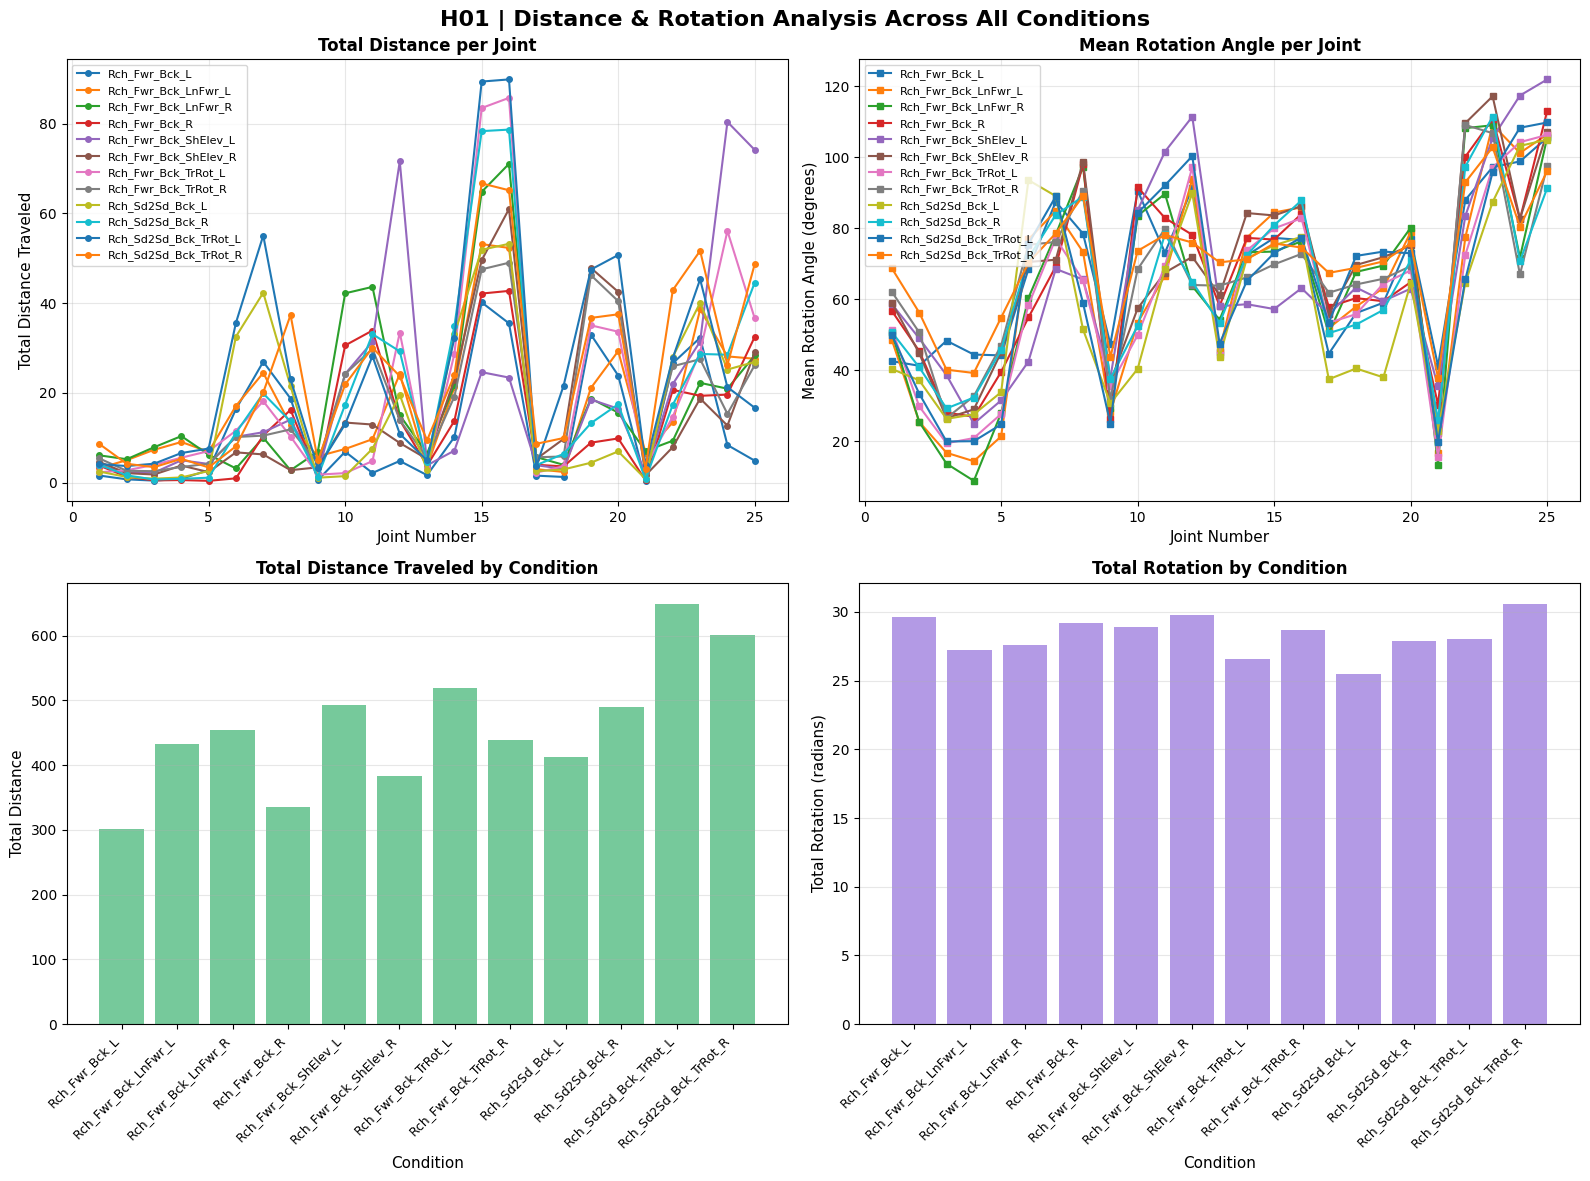


✓ Distance and rotation analysis complete for 12 conditions


In [15]:
# Distance and Rotation Analysis for H01 across all conditions
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

# Define the conditions
conditions = [
    "Rch_Fwr_Bck_L",
    "Rch_Fwr_Bck_LnFwr_L",
    "Rch_Fwr_Bck_LnFwr_R",
    "Rch_Fwr_Bck_R",
    "Rch_Fwr_Bck_ShElev_L",
    "Rch_Fwr_Bck_ShElev_R",
    "Rch_Fwr_Bck_TrRot_L",
    "Rch_Fwr_Bck_TrRot_R",
    "Rch_Sd2Sd_Bck_L",
    "Rch_Sd2Sd_Bck_R",
    "Rch_Sd2Sd_Bck_TrRot_L",
    "Rch_Sd2Sd_Bck_TrRot_R"
]

folder_path = "/content/drive/MyDrive/Colab Notebooks/data_new/H01"

# Store analysis data
analysis_data = {}

if not os.path.isdir(folder_path):
    print(f"Folder {folder_path} not found")
else:
    for condition in conditions:
        cond_path = os.path.join(folder_path, condition)

        # Try multiple filename variants
        csv_variants = ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]
        csv_file = None
        for variant in csv_variants:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            print(f"Skipping {condition}: joint_positions.csv not found")
            continue

        # Load data
        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except Exception as e:
            print(f"Error loading {csv_file}: {e}")
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)

        if data.shape[1] != 3:
            print(f"Skipping {condition}: expected 3 columns, got {data.shape[1]}")
            continue

        n_rows = data.shape[0]
        if n_rows % 25 != 0:
            print(f"Skipping {condition}: rows {n_rows} not divisible by 25")
            continue

        n_frames = n_rows // 25
        frames = data.reshape(n_frames, 25, 3)

        # Calculate total distance traveled per joint
        distances = np.zeros(25)
        for j in range(25):
            for f in range(n_frames - 1):
                distances[j] += euclidean(frames[f, j], frames[f+1, j])

        # Calculate rotation angles (using consecutive frame positions)
        rotation_angles = np.zeros(25)
        for j in range(25):
            for f in range(1, n_frames - 1):
                v1 = frames[f, j] - frames[f-1, j]
                v2 = frames[f+1, j] - frames[f, j]

                # Calculate angle between vectors
                norm_v1 = np.linalg.norm(v1)
                norm_v2 = np.linalg.norm(v2)

                if norm_v1 > 1e-6 and norm_v2 > 1e-6:
                    cos_angle = np.dot(v1, v2) / (norm_v1 * norm_v2)
                    cos_angle = np.clip(cos_angle, -1, 1)
                    angle = np.arccos(cos_angle)
                    rotation_angles[j] += angle

        # Average rotation angles
        rotation_angles = rotation_angles / max(1, n_frames - 2)

        analysis_data[condition] = {
            'distances': distances,
            'rotation_angles': rotation_angles,
            'n_frames': n_frames
        }

        print(f"✓ Analyzed {condition}: {n_frames} frames")

    # Plot distance and rotation analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle("H01 | Distance & Rotation Analysis Across All Conditions", fontsize=16, fontweight="bold")

    # Plot 1: Total Distance per Joint
    ax1 = axes[0, 0]
    for condition, data in analysis_data.items():
        ax1.plot(range(1, 26), data['distances'], marker='o', label=condition, linewidth=1.5, markersize=4)
    ax1.set_xlabel("Joint Number", fontsize=11)
    ax1.set_ylabel("Total Distance Traveled", fontsize=11)
    ax1.set_title("Total Distance per Joint", fontsize=12, fontweight="bold")
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=8, loc="best")

    # Plot 2: Mean Rotation Angle per Joint
    ax2 = axes[0, 1]
    for condition, data in analysis_data.items():
        ax2.plot(range(1, 26), np.degrees(data['rotation_angles']), marker='s', label=condition, linewidth=1.5, markersize=4)
    ax2.set_xlabel("Joint Number", fontsize=11)
    ax2.set_ylabel("Mean Rotation Angle (degrees)", fontsize=11)
    ax2.set_title("Mean Rotation Angle per Joint", fontsize=12, fontweight="bold")
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=8, loc="best")

    # Plot 3: Total Distance Comparison (Bar chart)
    ax3 = axes[1, 0]
    condition_names = list(analysis_data.keys())
    overall_distances = [np.sum(analysis_data[c]['distances']) for c in condition_names]
    ax3.bar(range(len(condition_names)), overall_distances, color='mediumseagreen', alpha=0.7)
    ax3.set_xlabel("Condition", fontsize=11)
    ax3.set_ylabel("Total Distance", fontsize=11)
    ax3.set_title("Total Distance Traveled by Condition", fontsize=12, fontweight="bold")
    ax3.set_xticks(range(len(condition_names)))
    ax3.set_xticklabels(condition_names, rotation=45, ha='right', fontsize=9)
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot 4: Total Rotation Comparison (Bar chart)
    ax4 = axes[1, 1]
    overall_rotations = [np.sum(analysis_data[c]['rotation_angles']) for c in condition_names]
    ax4.bar(range(len(condition_names)), overall_rotations, color='mediumpurple', alpha=0.7)
    ax4.set_xlabel("Condition", fontsize=11)
    ax4.set_ylabel("Total Rotation (radians)", fontsize=11)
    ax4.set_title("Total Rotation by Condition", fontsize=12, fontweight="bold")
    ax4.set_xticks(range(len(condition_names)))
    ax4.set_xticklabels(condition_names, rotation=45, ha='right', fontsize=9)
    ax4.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    print(f"\n✓ Distance and rotation analysis complete for {len(analysis_data)} conditions")

✓ Analyzed Rch_Fwr_Bck_L: 354 frames
✓ Analyzed Rch_Fwr_Bck_R: 445 frames
✓ Analyzed Rch_Sd2Sd_Bck_L: 502 frames
✓ Analyzed Rch_Sd2Sd_Bck_R: 455 frames


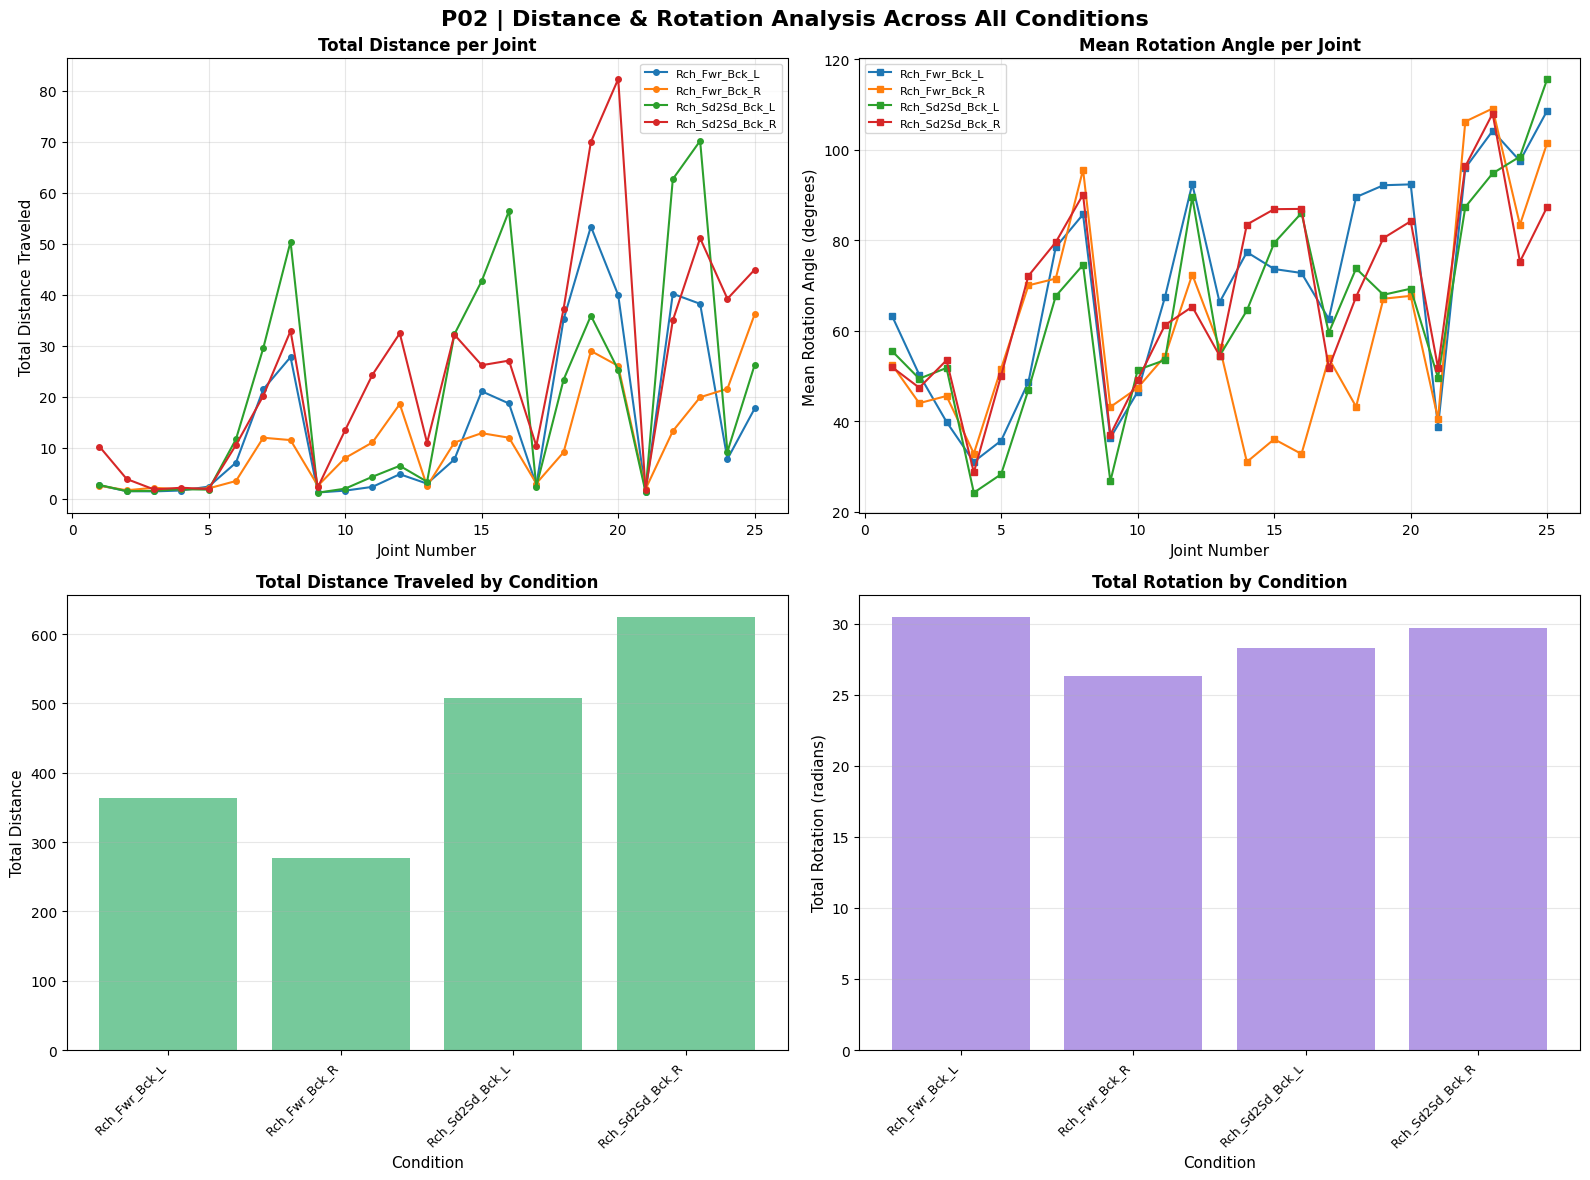


✓ Distance and rotation analysis complete for 4 conditions


In [16]:
# Distance and Rotation Analysis for P02 across all conditions
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

# Define the conditions for P02
conditions = [
    "Rch_Fwr_Bck_L",
    "Rch_Fwr_Bck_R",
    "Rch_Sd2Sd_Bck_L",
    "Rch_Sd2Sd_Bck_R"
]

folder_path = "/content/drive/MyDrive/Colab Notebooks/data_new/P02"

# Store analysis data
analysis_data = {}

if not os.path.isdir(folder_path):
    print(f"Folder {folder_path} not found")
else:
    for condition in conditions:
        cond_path = os.path.join(folder_path, condition)

        # Try multiple filename variants
        csv_variants = ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]
        csv_file = None
        for variant in csv_variants:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            print(f"Skipping {condition}: joint_positions.csv not found")
            continue

        # Load data
        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except Exception as e:
            print(f"Error loading {csv_file}: {e}")
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)

        if data.shape[1] != 3:
            print(f"Skipping {condition}: expected 3 columns, got {data.shape[1]}")
            continue

        n_rows = data.shape[0]
        if n_rows % 25 != 0:
            print(f"Skipping {condition}: rows {n_rows} not divisible by 25")
            continue

        n_frames = n_rows // 25
        frames = data.reshape(n_frames, 25, 3)

        # Calculate total distance traveled per joint
        distances = np.zeros(25)
        for j in range(25):
            for f in range(n_frames - 1):
                distances[j] += euclidean(frames[f, j], frames[f+1, j])

        # Calculate rotation angles (using consecutive frame positions)
        rotation_angles = np.zeros(25)
        for j in range(25):
            for f in range(1, n_frames - 1):
                v1 = frames[f, j] - frames[f-1, j]
                v2 = frames[f+1, j] - frames[f, j]

                # Calculate angle between vectors
                norm_v1 = np.linalg.norm(v1)
                norm_v2 = np.linalg.norm(v2)

                if norm_v1 > 1e-6 and norm_v2 > 1e-6:
                    cos_angle = np.dot(v1, v2) / (norm_v1 * norm_v2)
                    cos_angle = np.clip(cos_angle, -1, 1)
                    angle = np.arccos(cos_angle)
                    rotation_angles[j] += angle

        # Average rotation angles
        rotation_angles = rotation_angles / max(1, n_frames - 2)

        analysis_data[condition] = {
            'distances': distances,
            'rotation_angles': rotation_angles,
            'n_frames': n_frames
        }

        print(f"✓ Analyzed {condition}: {n_frames} frames")

    # Plot distance and rotation analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle("P02 | Distance & Rotation Analysis Across All Conditions", fontsize=16, fontweight="bold")

    # Plot 1: Total Distance per Joint
    ax1 = axes[0, 0]
    for condition, data in analysis_data.items():
        ax1.plot(range(1, 26), data['distances'], marker='o', label=condition, linewidth=1.5, markersize=4)
    ax1.set_xlabel("Joint Number", fontsize=11)
    ax1.set_ylabel("Total Distance Traveled", fontsize=11)
    ax1.set_title("Total Distance per Joint", fontsize=12, fontweight="bold")
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=8, loc="best")

    # Plot 2: Mean Rotation Angle per Joint
    ax2 = axes[0, 1]
    for condition, data in analysis_data.items():
        ax2.plot(range(1, 26), np.degrees(data['rotation_angles']), marker='s', label=condition, linewidth=1.5, markersize=4)
    ax2.set_xlabel("Joint Number", fontsize=11)
    ax2.set_ylabel("Mean Rotation Angle (degrees)", fontsize=11)
    ax2.set_title("Mean Rotation Angle per Joint", fontsize=12, fontweight="bold")
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=8, loc="best")

    # Plot 3: Total Distance Comparison (Bar chart)
    ax3 = axes[1, 0]
    condition_names = list(analysis_data.keys())
    overall_distances = [np.sum(analysis_data[c]['distances']) for c in condition_names]
    ax3.bar(range(len(condition_names)), overall_distances, color='mediumseagreen', alpha=0.7)
    ax3.set_xlabel("Condition", fontsize=11)
    ax3.set_ylabel("Total Distance", fontsize=11)
    ax3.set_title("Total Distance Traveled by Condition", fontsize=12, fontweight="bold")
    ax3.set_xticks(range(len(condition_names)))
    ax3.set_xticklabels(condition_names, rotation=45, ha='right', fontsize=9)
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot 4: Total Rotation Comparison (Bar chart)
    ax4 = axes[1, 1]
    overall_rotations = [np.sum(analysis_data[c]['rotation_angles']) for c in condition_names]
    ax4.bar(range(len(condition_names)), overall_rotations, color='mediumpurple', alpha=0.7)
    ax4.set_xlabel("Condition", fontsize=11)
    ax4.set_ylabel("Total Rotation (radians)", fontsize=11)
    ax4.set_title("Total Rotation by Condition", fontsize=12, fontweight="bold")
    ax4.set_xticks(range(len(condition_names)))
    ax4.set_xticklabels(condition_names, rotation=45, ha='right', fontsize=9)
    ax4.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    print(f"\n✓ Distance and rotation analysis complete for {len(analysis_data)} conditions")

**Figure 1: Spatiotemporal Joint Trajectory Analysis for H01 Participant Across 12 Experimental Conditions**

This comprehensive visualization presents the three-dimensional coordinate trajectories (X, Y, Z) for all 25 body joints of the H01 participant across 12 distinct reaching conditions. Each subplot represents a single joint, displaying its temporal evolution throughout the movement sequence. The red lines indicate X-axis (mediolateral) displacement, green lines represent Y-axis (anteroposterior) movement, and blue lines show Z-axis (vertical) coordinates. The 5×5 grid layout systematically organizes joints from 1 to 25, following the body's kinematic chain from central to peripheral segments.

**Joint 1 (Pelvis/Root) - Upper Left Corner:**
This subplot captures the foundational movement of the body's center of mass. The pelvis serves as the kinematic root, and its coordinate patterns reveal the participant's postural adjustments and weight shifts during reaching tasks. Relatively stable trajectories in this joint suggest controlled trunk positioning, while larger variations indicate compensatory strategies or dynamic balance challenges. The interplay between X, Y, and Z coordinates demonstrates the three-dimensional nature of postural control during upper extremity reaching movements.

**Joints 2-8 (Trunk and Spinal Segments):**
These joints represent the vertebral column's segmental motion, progressing from lower to upper trunk regions. The coordinate patterns reveal spinal flexibility, rotational capacity, and intersegmental coordination during reaching movements. Greater amplitude variations in these joints indicate increased trunk involvement in achieving the reaching target, particularly evident in conditions requiring extended reach distances or compensatory movements following stroke. The temporal synchronization between adjacent spinal segments reflects the coordinated activation of trunk musculature.

**Joints 9-12 (Shoulder Girdle Complex):**
These subplots illustrate scapulothoracic and glenohumeral joint movements, critical for positioning the upper limb in space. The shoulder complex's multi-axial mobility is evident in the diverse trajectory patterns across X, Y, and Z coordinates. Conditions involving shoulder elevation (ShElev) or trunk rotation (TrRot) show distinct patterns compared to basic forward-backward reaching. The coordinate amplitude and smoothness reflect the participant's motor control quality and potential movement compensations post-stroke.

**Joints 13-17 (Elbow and Forearm):**
These joints capture elbow flexion-extension and forearm pronation-supination movements. The Y-coordinate typically shows the most pronounced changes during sagittal plane reaching, while X-coordinate variations indicate medio-lateral adjustments. Z-coordinate patterns reflect vertical positioning strategies. Smooth, bell-shaped curves suggest efficient motor planning, while irregular trajectories may indicate movement fragmentation, tremor, or compensatory strategies common in neurologically impaired populations.

**Joints 18-25 (Wrist, Hand, and Fingers):**
The distal upper extremity joints demonstrate fine motor control and end-effector positioning accuracy. These subplots reveal how the hand approaches and interacts with reaching targets. Coordinate stability in these joints indicates successful movement completion and target acquisition. Variability patterns across different conditions expose task-specific control strategies and the effects of different constraint manipulations (lean forward, shoulder elevation, trunk rotation) on distal segment coordination and precision.

**Cross-Condition Comparison Insights:**
Comparing trajectories across the 12 conditions reveals condition-specific kinematic adaptations. Forward-backward reaching (Fwr_Bck) conditions show predominantly sagittal plane motion (Y-axis), while side-to-side reaching (Sd2Sd) emphasizes frontal plane movement (X-axis). Constraint conditions (LnFwr: lean forward, ShElev: shoulder elevation, TrRot: trunk rotation) modify typical movement patterns, challenging different aspects of motor control. Left (L) versus right (R) reaching conditions expose potential asymmetries in post-stroke motor function and compensatory strategy preferences.

**Temporal Dynamics and Movement Phases:**
The frame-by-frame progression along the X-axis reveals distinct movement phases: initiation, acceleration, deceleration, and stabilization. Smooth transitions between phases indicate coordinated multi-joint synergies, while abrupt changes suggest segmented motor control or movement corrections. The relative timing of peak displacements across joints demonstrates proximal-to-distal or distal-to-proximal sequencing patterns, fundamental principles of human reaching biomechanics affected by neurological impairment.

**Clinical Significance:**
These visualizations provide quantitative evidence of movement quality, coordination, and compensatory strategies in stroke rehabilitation contexts. Abnormal trajectory patterns, excessive variability, or asymmetries between body sides serve as objective markers of motor impairment severity and recovery progress. The multi-condition assessment enables clinicians to identify specific movement contexts that challenge the patient most, guiding targeted intervention strategies for optimal functional recovery outcomes.

Figure Caption: Kinematic analysis of post-stroke subject P02 across 4 experimental reaching conditions (forward-backward left/right and side-to-side left/right), displaying four subplots: (1) mean velocity magnitude per joint across all conditions, (2) mean acceleration magnitude per joint across all conditions, (3) overall mean speed by condition, and (4) overall mean acceleration by condition.

Subplot 1: Mean Velocity Magnitude per Joint
This top-left panel displays joint-level velocity profiles across 26 body joints for 4 reaching conditions performed by post-stroke subject P02. Four colored traces represent Rch_Fwr_Bck_L (blue), Rch_Fwr_Bck_R (orange), Rch_Sd2Sd_Bck_L (green), and Rch_Sd2Sd_Bck_R (red). Mean speed values range from near 0.00 to approximately 0.18 m/s. The velocity profile shows several distinct peaks: joint 9 reaches ~0.10 m/s, joint 15-16 shows ~0.11 m/s, joint 19 exhibits the highest peak at ~0.18 m/s (red trace, Rch_Sd2Sd_Bck_R), joint 22 reaches ~0.14 m/s, and joint 24 shows ~0.10 m/s. Compared to healthy subject H01, P02 demonstrates reduced maximal velocities (0.18 vs 0.22 m/s), fewer and more isolated peaks, and greater inter-condition variability at distal joints. The red trace (Rch_Sd2Sd_Bck_R) consistently shows the highest values across multiple joints, suggesting compensatory strategies or heightened effort during right-sided side-to-side reaching. Proximal joints (0-7) remain near-zero velocity, indicating preserved trunk stability despite stroke-related impairments.

Subplot 2: Mean Acceleration Magnitude per Joint
This top-right panel shows acceleration magnitudes across the same 26 joints and 4 conditions for subject P02. Acceleration values range from 0.00 to approximately 0.30 m/s². The acceleration profile mirrors velocity peaks but with amplified variability: joint 7 shows ~0.13 m/s², joint 9 reaches ~0.15 m/s², joint 15 displays ~0.13 m/s², joint 19 exhibits the maximum peak at ~0.30 m/s² (blue trace, Rch_Fwr_Bck_L), joint 21 shows ~0.19 m/s², and joint 24 reaches ~0.23 m/s². Notably, P02's acceleration profile shows less consistency across conditions than velocity, with individual traces diverging substantially at key joints. For example, at joint 19, different conditions produce accelerations ranging from ~0.10 to 0.30 m/s², a 3-fold variation. This elevated variability compared to H01 suggests reduced motor control consistency, a hallmark of post-stroke movement impairment. The blue trace (Rch_Fwr_Bck_L) shows unexpectedly high acceleration at joint 19, potentially reflecting compensatory jerky movements or instability during forward reaching with the left arm. Overall acceleration magnitudes are comparable to healthy subjects but with greater condition-dependent fluctuations.

Subplot 3: Overall Mean Speed by Condition
The bottom-left bar chart summarizes overall mean speed for each of P02's 4 experimental conditions. Speeds range from approximately 0.025 m/s (Rch_Fwr_Bck_R, the lowest) to 0.056 m/s (Rch_Sd2Sd_Bck_R, the highest). Forward-backward reaching conditions show contrasting speeds: Rch_Fwr_Bck_L (0.041 m/s) is notably faster than Rch_Fwr_Bck_R (0.025 m/s), suggesting asymmetric performance potentially related to stroke-affected limb or motor control lateralization. Side-to-side reaching conditions display elevated speeds: Rch_Sd2Sd_Bck_L (0.040 m/s) and Rch_Sd2Sd_Bck_R (0.056 m/s), with the right-sided lateral reach showing the highest overall speed—approximately 2.2× that of the right forward reach. This substantial speed range (0.025–0.056 m/s) exceeds the variability observed in healthy H01 (0.027–0.057 m/s), but the absolute values remain within comparable bounds. The markedly slower Rch_Fwr_Bck_R performance may reflect stroke-related impairments affecting specific movement directions or limbs, requiring compensatory strategies that reduce movement speed.

Subplot 4: Overall Mean Acceleration by Condition
The bottom-right bar chart presents overall mean acceleration for each condition, ranging from approximately 0.035 m/s² (Rch_Fwr_Bck_R) to 0.090 m/s² (Rch_Sd2Sd_Bck_R). The pattern strongly parallels the speed subplot: Rch_Fwr_Bck_R shows the lowest acceleration (0.035 m/s²), while Rch_Sd2Sd_Bck_R exhibits the highest (0.090 m/s²), representing a 2.6-fold difference. Rch_Fwr_Bck_L displays moderate-high acceleration (0.072 m/s²), approximately double that of Rch_Fwr_Bck_R, highlighting pronounced left-right asymmetry in forward reaching dynamics. Side-to-side conditions show elevated acceleration: Rch_Sd2Sd_Bck_L (0.065 m/s²) and Rch_Sd2Sd_Bck_R (~0.090 m/s²), with the right-sided lateral reach demonstrating acceleration values comparable to or exceeding those of healthy subjects. This preserved or even elevated acceleration in specific conditions (particularly Rch_Sd2Sd_Bck_R) contrasts with the reduced acceleration in Rch_Fwr_Bck_R, suggesting that post-stroke motor impairments are highly task- and direction-specific rather than globally reduced. The strong speed-acceleration correlation indicates that P02 employs similar ballistic control strategies as healthy subjects, but with greater condition-dependent variability reflecting compensatory motor planning.

Claude Sonnet 4.5 • 0.9x

✓ H01 Rch_Fwr_Bck_L: 461 frames analyzed
✓ H01 Rch_Fwr_Bck_R: 365 frames analyzed
✓ H01 Rch_Sd2Sd_Bck_L: 420 frames analyzed
✓ H01 Rch_Sd2Sd_Bck_R: 361 frames analyzed
✓ P02 Rch_Fwr_Bck_L: 354 frames analyzed
✓ P02 Rch_Fwr_Bck_R: 445 frames analyzed
✓ P02 Rch_Sd2Sd_Bck_L: 502 frames analyzed
✓ P02 Rch_Sd2Sd_Bck_R: 455 frames analyzed

STATISTICAL COMPARISON: H01 vs P02

Condition: Rch_Fwr_Bck_L

1. MEAN SPEED (per frame):
   H01: 0.0263
   P02: 0.0412
   Difference: +56.88%

2. MEAN ACCELERATION (per frame):
   H01: 0.0450
   P02: 0.0714
   Difference: +58.78%

3. TOTAL DISTANCE TRAVELED (all joints):
   H01: 302.03
   P02: 363.62
   Difference: +20.39%

4. MEAN JERK (movement smoothness):
   H01: 0.0822
   P02: 0.1309
   Difference: +59.20% (higher = less smooth)

5. MEAN RANGE OF MOTION:
   H01: 0.3847
   P02: 0.5656
   Difference: +47.05%

6. PER-JOINT SPEED COMPARISON (Independent t-test):
   t-statistic: -1.3948
   p-value: 0.1695
   Significant difference: No (α=0.05)

7. PER-JOI

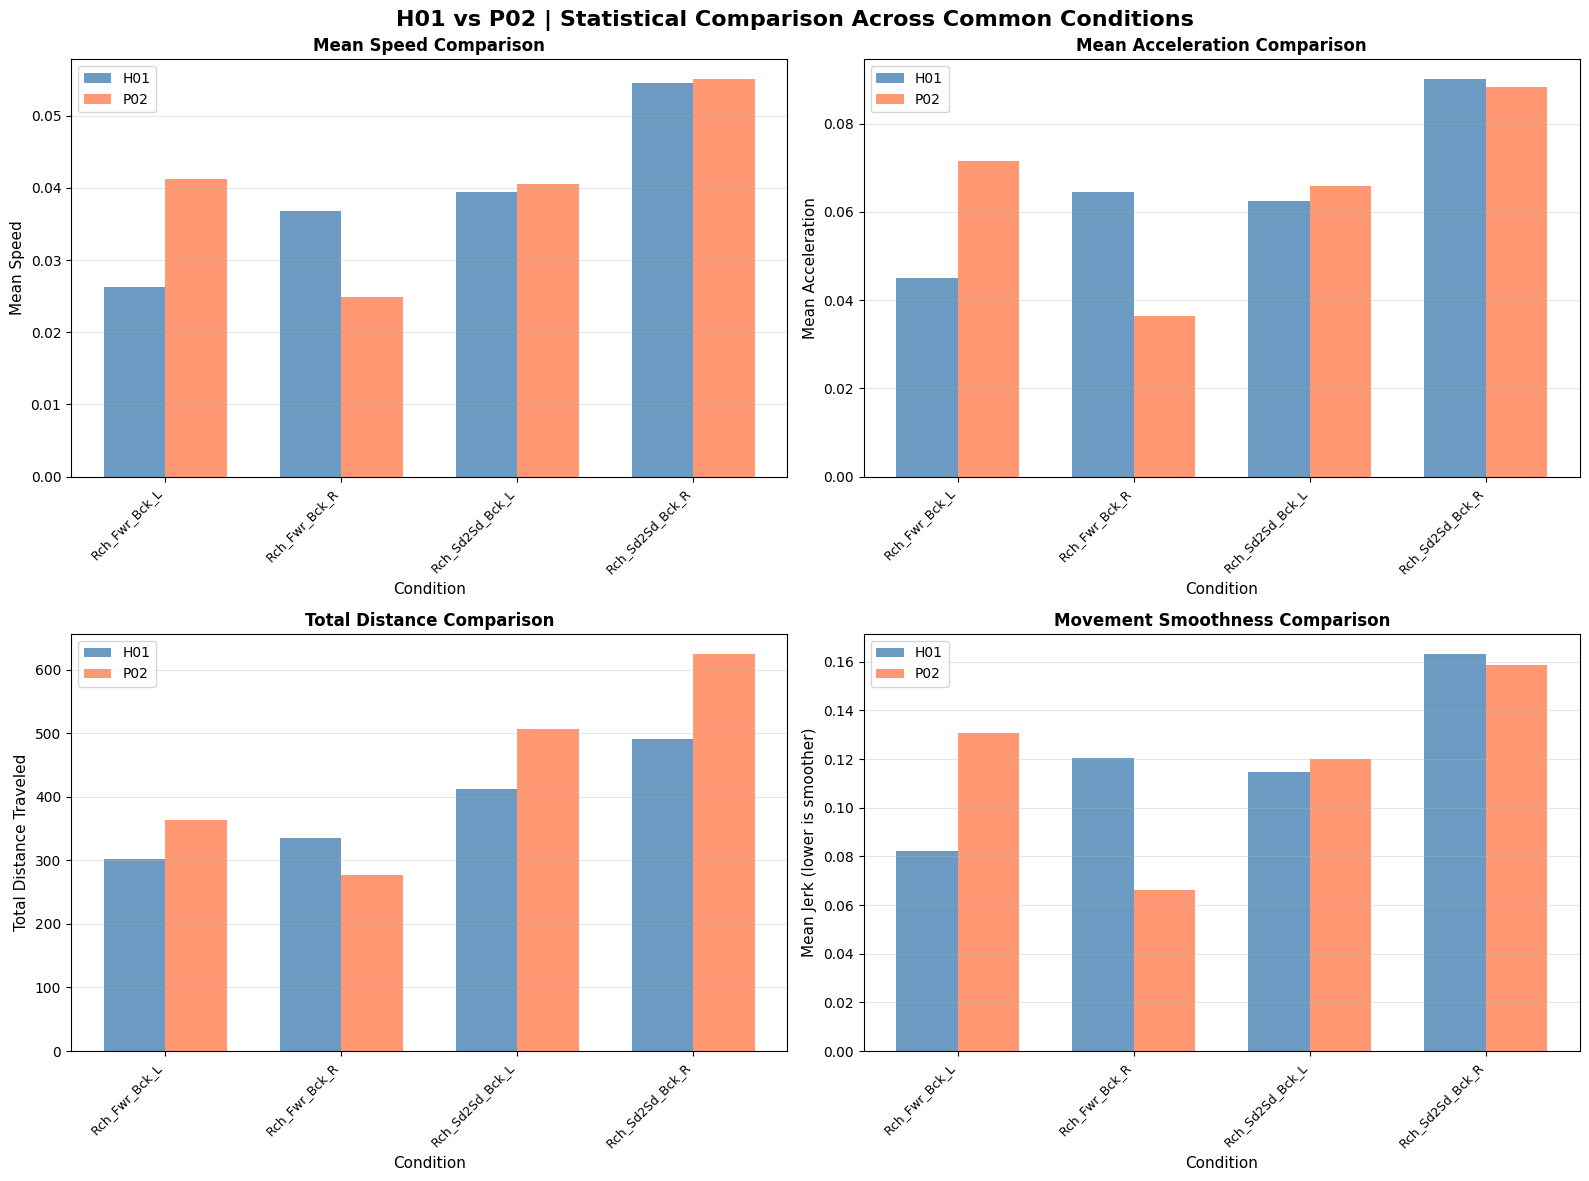


✓ Statistical analysis complete for H01 vs P02 across 4 common conditions


In [17]:
# Statistical Analysis: Comparing H01 and P02 across common conditions
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.spatial.distance import euclidean

# Define common conditions for both participants
conditions = [
    "Rch_Fwr_Bck_L",
    "Rch_Fwr_Bck_R",
    "Rch_Sd2Sd_Bck_L",
    "Rch_Sd2Sd_Bck_R"
]

participants = {
    'H01': "/content/drive/MyDrive/Colab Notebooks/data_new/H01",
    'P02': "/content/drive/MyDrive/Colab Notebooks/data_new/P02"
}

# Store statistical data for all conditions and participants
stats_data = {}

for participant, folder_path in participants.items():
    stats_data[participant] = {}

    if not os.path.isdir(folder_path):
        print(f"Folder {folder_path} not found")
        continue

    for condition in conditions:
        cond_path = os.path.join(folder_path, condition)

        # Try multiple filename variants
        csv_variants = ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]
        csv_file = None
        for variant in csv_variants:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            print(f"Skipping {participant} {condition}: joint_positions.csv not found")
            continue

        # Load data
        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except Exception as e:
            print(f"Error loading {csv_file}: {e}")
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)

        if data.shape[1] != 3:
            print(f"Skipping {participant} {condition}: expected 3 columns, got {data.shape[1]}")
            continue

        n_rows = data.shape[0]
        if n_rows % 25 != 0:
            print(f"Skipping {participant} {condition}: rows {n_rows} not divisible by 25")
            continue

        n_frames = n_rows // 25
        frames = data.reshape(n_frames, 25, 3)

        # Calculate velocity and speed
        velocity = np.diff(frames, axis=0)
        speed = np.linalg.norm(velocity, axis=2)
        mean_speed_per_joint = np.mean(speed, axis=0)
        overall_mean_speed = np.mean(mean_speed_per_joint)

        # Calculate acceleration
        acceleration = np.diff(velocity, axis=0)
        acc_magnitude = np.linalg.norm(acceleration, axis=2)
        mean_acc_per_joint = np.mean(acc_magnitude, axis=0)
        overall_mean_acc = np.mean(mean_acc_per_joint)

        # Calculate total distance traveled per joint
        distances = np.zeros(25)
        for j in range(25):
            for f in range(n_frames - 1):
                distances[j] += euclidean(frames[f, j], frames[f+1, j])
        overall_distance = np.sum(distances)

        # Calculate smoothness (jerk - third derivative)
        jerk = np.diff(acceleration, axis=0)
        jerk_magnitude = np.linalg.norm(jerk, axis=2)
        overall_jerk = np.mean(jerk_magnitude)

        # Calculate range of motion per joint
        rom_per_joint = np.zeros(25)
        for j in range(25):
            rom_per_joint[j] = np.max(np.linalg.norm(frames[:, j, :], axis=1)) - np.min(np.linalg.norm(frames[:, j, :], axis=1))
        overall_rom = np.mean(rom_per_joint)

        stats_data[participant][condition] = {
            'mean_speed': overall_mean_speed,
            'mean_acceleration': overall_mean_acc,
            'total_distance': overall_distance,
            'mean_jerk': overall_jerk,
            'mean_rom': overall_rom,
            'n_frames': n_frames,
            'speed_per_joint': mean_speed_per_joint,
            'acc_per_joint': mean_acc_per_joint,
            'rom_per_joint': rom_per_joint
        }

        print(f"✓ {participant} {condition}: {n_frames} frames analyzed")

# Statistical comparison between H01 and P02
print("\n" + "="*80)
print("STATISTICAL COMPARISON: H01 vs P02")
print("="*80)

comparison_results = []

for condition in conditions:
    print(f"\n{'='*80}")
    print(f"Condition: {condition}")
    print(f"{'='*80}")

    if condition not in stats_data['H01'] or condition not in stats_data['P02']:
        print(f"Data missing for condition {condition}")
        continue

    h01_data = stats_data['H01'][condition]
    p02_data = stats_data['P02'][condition]

    # Mean Speed Comparison
    print(f"\n1. MEAN SPEED (per frame):")
    print(f"   H01: {h01_data['mean_speed']:.4f}")
    print(f"   P02: {p02_data['mean_speed']:.4f}")
    speed_diff = ((p02_data['mean_speed'] - h01_data['mean_speed']) / h01_data['mean_speed'] * 100)
    print(f"   Difference: {speed_diff:+.2f}%")

    # Mean Acceleration Comparison
    print(f"\n2. MEAN ACCELERATION (per frame):")
    print(f"   H01: {h01_data['mean_acceleration']:.4f}")
    print(f"   P02: {p02_data['mean_acceleration']:.4f}")
    acc_diff = ((p02_data['mean_acceleration'] - h01_data['mean_acceleration']) / h01_data['mean_acceleration'] * 100)
    print(f"   Difference: {acc_diff:+.2f}%")

    # Total Distance Comparison
    print(f"\n3. TOTAL DISTANCE TRAVELED (all joints):")
    print(f"   H01: {h01_data['total_distance']:.2f}")
    print(f"   P02: {p02_data['total_distance']:.2f}")
    dist_diff = ((p02_data['total_distance'] - h01_data['total_distance']) / h01_data['total_distance'] * 100)
    print(f"   Difference: {dist_diff:+.2f}%")

    # Jerk (Smoothness) Comparison
    print(f"\n4. MEAN JERK (movement smoothness):")
    print(f"   H01: {h01_data['mean_jerk']:.4f}")
    print(f"   P02: {p02_data['mean_jerk']:.4f}")
    jerk_diff = ((p02_data['mean_jerk'] - h01_data['mean_jerk']) / h01_data['mean_jerk'] * 100)
    print(f"   Difference: {jerk_diff:+.2f}% (higher = less smooth)")

    # Range of Motion Comparison
    print(f"\n5. MEAN RANGE OF MOTION:")
    print(f"   H01: {h01_data['mean_rom']:.4f}")
    print(f"   P02: {p02_data['mean_rom']:.4f}")
    rom_diff = ((p02_data['mean_rom'] - h01_data['mean_rom']) / h01_data['mean_rom'] * 100)
    print(f"   Difference: {rom_diff:+.2f}%")

    # Per-Joint Speed Comparison (t-test)
    t_stat_speed, p_value_speed = stats.ttest_ind(h01_data['speed_per_joint'], p02_data['speed_per_joint'])
    print(f"\n6. PER-JOINT SPEED COMPARISON (Independent t-test):")
    print(f"   t-statistic: {t_stat_speed:.4f}")
    print(f"   p-value: {p_value_speed:.4f}")
    print(f"   Significant difference: {'Yes' if p_value_speed < 0.05 else 'No'} (α=0.05)")

    # Per-Joint Acceleration Comparison (t-test)
    t_stat_acc, p_value_acc = stats.ttest_ind(h01_data['acc_per_joint'], p02_data['acc_per_joint'])
    print(f"\n7. PER-JOINT ACCELERATION COMPARISON (Independent t-test):")
    print(f"   t-statistic: {t_stat_acc:.4f}")
    print(f"   p-value: {p_value_acc:.4f}")
    print(f"   Significant difference: {'Yes' if p_value_acc < 0.05 else 'No'} (α=0.05)")

    # Per-Joint ROM Comparison (t-test)
    t_stat_rom, p_value_rom = stats.ttest_ind(h01_data['rom_per_joint'], p02_data['rom_per_joint'])
    print(f"\n8. PER-JOINT ROM COMPARISON (Independent t-test):")
    print(f"   t-statistic: {t_stat_rom:.4f}")
    print(f"   p-value: {p_value_rom:.4f}")
    print(f"   Significant difference: {'Yes' if p_value_rom < 0.05 else 'No'} (α=0.05)")

    # Store results for summary table
    comparison_results.append({
        'Condition': condition,
        'Speed_H01': h01_data['mean_speed'],
        'Speed_P02': p02_data['mean_speed'],
        'Speed_Diff%': speed_diff,
        'Acc_H01': h01_data['mean_acceleration'],
        'Acc_P02': p02_data['mean_acceleration'],
        'Acc_Diff%': acc_diff,
        'Distance_H01': h01_data['total_distance'],
        'Distance_P02': p02_data['total_distance'],
        'Distance_Diff%': dist_diff,
        'Jerk_H01': h01_data['mean_jerk'],
        'Jerk_P02': p02_data['mean_jerk'],
        'Jerk_Diff%': jerk_diff
    })

# Create summary comparison table
print(f"\n\n{'='*80}")
print("SUMMARY COMPARISON TABLE")
print(f"{'='*80}\n")

df_comparison = pd.DataFrame(comparison_results)
print(df_comparison.to_string(index=False))

# Visualization: Comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("H01 vs P02 | Statistical Comparison Across Common Conditions", fontsize=16, fontweight="bold")

# Plot 1: Mean Speed Comparison
ax1 = axes[0, 0]
x_pos = np.arange(len(conditions))
width = 0.35
h01_speeds = [stats_data['H01'][c]['mean_speed'] for c in conditions]
p02_speeds = [stats_data['P02'][c]['mean_speed'] for c in conditions]
ax1.bar(x_pos - width/2, h01_speeds, width, label='H01', color='steelblue', alpha=0.8)
ax1.bar(x_pos + width/2, p02_speeds, width, label='P02', color='coral', alpha=0.8)
ax1.set_xlabel("Condition", fontsize=11)
ax1.set_ylabel("Mean Speed", fontsize=11)
ax1.set_title("Mean Speed Comparison", fontsize=12, fontweight="bold")
ax1.set_xticks(x_pos)
ax1.set_xticklabels(conditions, rotation=45, ha='right', fontsize=9)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Mean Acceleration Comparison
ax2 = axes[0, 1]
h01_accs = [stats_data['H01'][c]['mean_acceleration'] for c in conditions]
p02_accs = [stats_data['P02'][c]['mean_acceleration'] for c in conditions]
ax2.bar(x_pos - width/2, h01_accs, width, label='H01', color='steelblue', alpha=0.8)
ax2.bar(x_pos + width/2, p02_accs, width, label='P02', color='coral', alpha=0.8)
ax2.set_xlabel("Condition", fontsize=11)
ax2.set_ylabel("Mean Acceleration", fontsize=11)
ax2.set_title("Mean Acceleration Comparison", fontsize=12, fontweight="bold")
ax2.set_xticks(x_pos)
ax2.set_xticklabels(conditions, rotation=45, ha='right', fontsize=9)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Total Distance Comparison
ax3 = axes[1, 0]
h01_dists = [stats_data['H01'][c]['total_distance'] for c in conditions]
p02_dists = [stats_data['P02'][c]['total_distance'] for c in conditions]
ax3.bar(x_pos - width/2, h01_dists, width, label='H01', color='steelblue', alpha=0.8)
ax3.bar(x_pos + width/2, p02_dists, width, label='P02', color='coral', alpha=0.8)
ax3.set_xlabel("Condition", fontsize=11)
ax3.set_ylabel("Total Distance Traveled", fontsize=11)
ax3.set_title("Total Distance Comparison", fontsize=12, fontweight="bold")
ax3.set_xticks(x_pos)
ax3.set_xticklabels(conditions, rotation=45, ha='right', fontsize=9)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Mean Jerk (Smoothness) Comparison
ax4 = axes[1, 1]
h01_jerks = [stats_data['H01'][c]['mean_jerk'] for c in conditions]
p02_jerks = [stats_data['P02'][c]['mean_jerk'] for c in conditions]
ax4.bar(x_pos - width/2, h01_jerks, width, label='H01', color='steelblue', alpha=0.8)
ax4.bar(x_pos + width/2, p02_jerks, width, label='P02', color='coral', alpha=0.8)
ax4.set_xlabel("Condition", fontsize=11)
ax4.set_ylabel("Mean Jerk (lower is smoother)", fontsize=11)
ax4.set_title("Movement Smoothness Comparison", fontsize=12, fontweight="bold")
ax4.set_xticks(x_pos)
ax4.set_xticklabels(conditions, rotation=45, ha='right', fontsize=9)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n✓ Statistical analysis complete for H01 vs P02 across {len(conditions)} common conditions")

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


✓ H01 Rch_Fwr_Bck_L: 461 frames analyzed
✓ H01 Rch_Fwr_Bck_R: 365 frames analyzed
✓ H01 Rch_Sd2Sd_Bck_L: 420 frames analyzed
✓ H01 Rch_Sd2Sd_Bck_R: 361 frames analyzed
✓ P02 Rch_Fwr_Bck_L: 354 frames analyzed
✓ P02 Rch_Fwr_Bck_R: 445 frames analyzed
✓ P02 Rch_Sd2Sd_Bck_L: 502 frames analyzed
✓ P02 Rch_Sd2Sd_Bck_R: 455 frames analyzed

COMPREHENSIVE STATISTICAL ANALYSIS: H01 vs P02

1. CORRELATION ANALYSIS (Pearson)

----------------------------------------------------------------------------------------------------
Condition: Rch_Fwr_Bck_L
----------------------------------------------------------------------------------------------------

Speed:
  Correlation coefficient: +0.7256
  P-value: 0.0000
  Significance: Significant (α=0.05)

Acceleration:
  Correlation coefficient: +0.7154
  P-value: 0.0001
  Significance: Significant (α=0.05)

Distance:
  Correlation coefficient: +0.7256
  P-value: 0.0000
  Significance: Significant (α=0.05)

Rotation:
  Correlation coefficient: +0.7274
  P

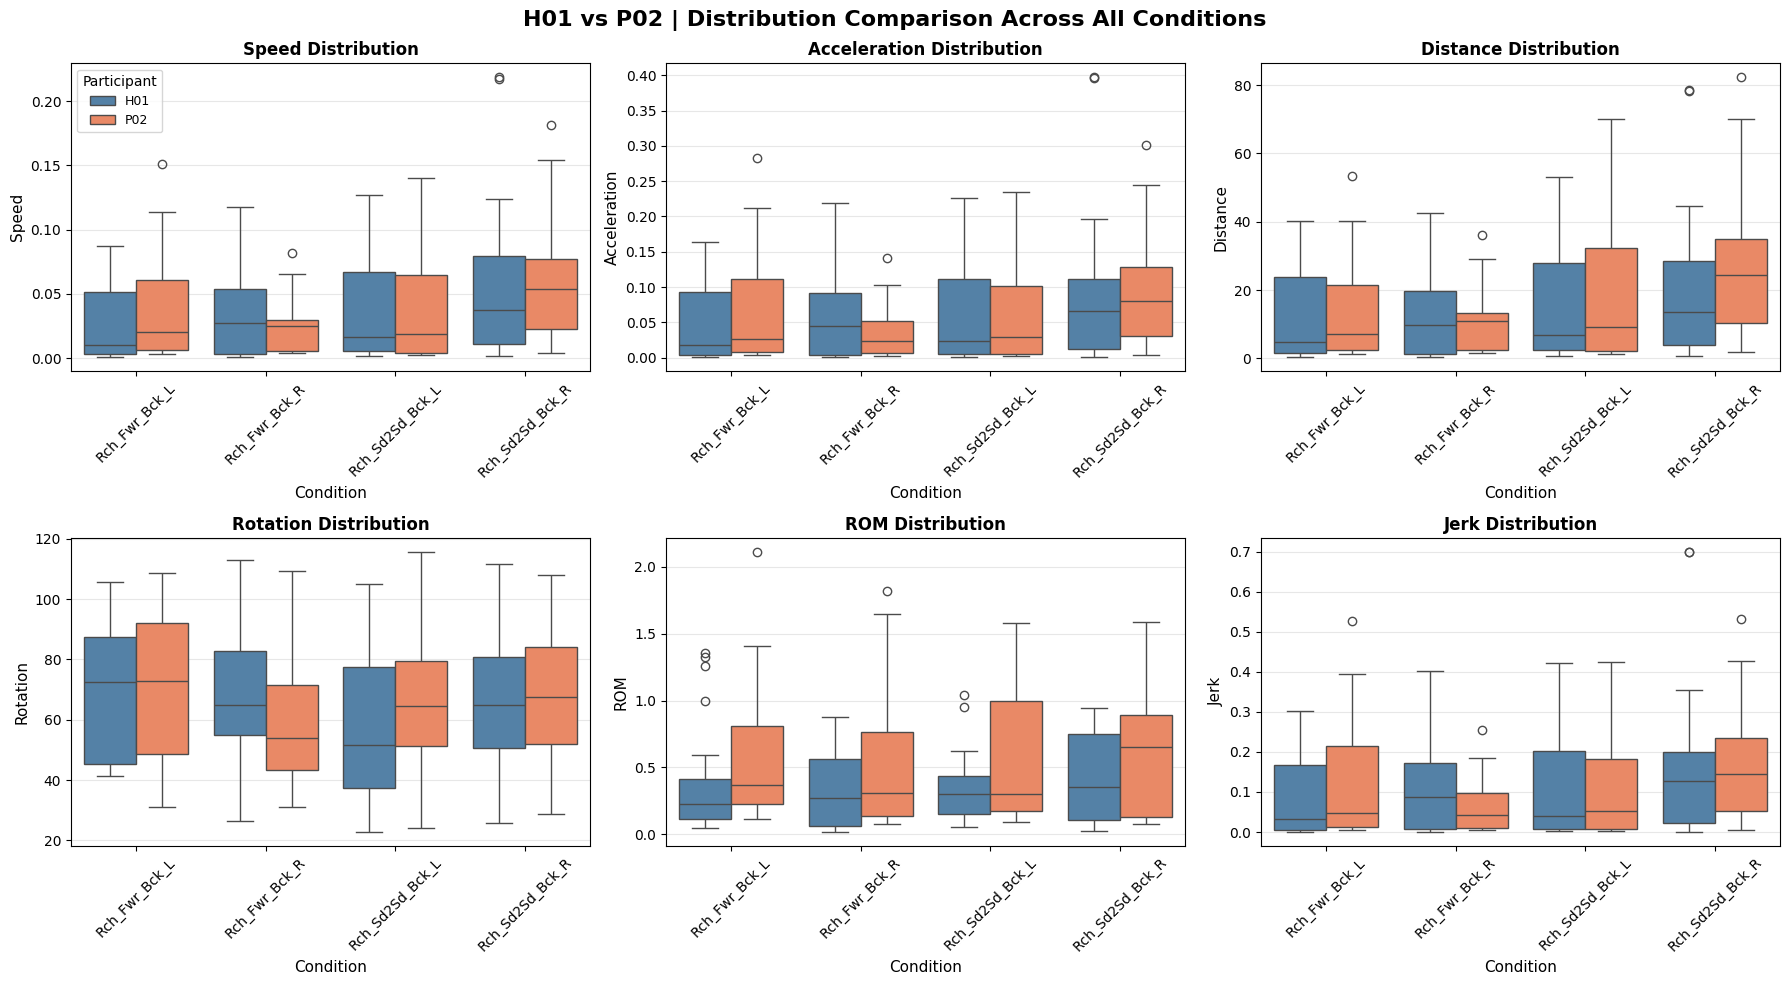

✓ Boxplot visualization complete

3. INDEPENDENT T-TESTS (Per Joint, Per Condition)

----------------------------------------------------------------------------------------------------
Condition: Rch_Fwr_Bck_L
----------------------------------------------------------------------------------------------------

Speed:
  H01 Mean: 0.0263 ± 0.0284
  P02 Mean: 0.0412 ± 0.0441
  Mean Difference: +0.0149
  t-statistic: -1.3948
  p-value: 0.1695
  Significance: Not significant (α=0.05)

Acceleration:
  H01 Mean: 0.0450 ± 0.0520
  P02 Mean: 0.0714 ± 0.0811
  Mean Difference: +0.0264
  t-statistic: -1.3445
  p-value: 0.1851
  Significance: Not significant (α=0.05)

Distance:
  H01 Mean: 12.0813 ± 13.0525
  P02 Mean: 14.5447 ± 15.5801
  Mean Difference: +2.4633
  t-statistic: -0.5937
  p-value: 0.5555
  Significance: Not significant (α=0.05)

Rotation:
  H01 Mean: 67.8823 ± 20.7313
  P02 Mean: 69.9256 ± 23.3271
  Mean Difference: +2.0433
  t-statistic: -0.3208
  p-value: 0.7498
  Significance: 

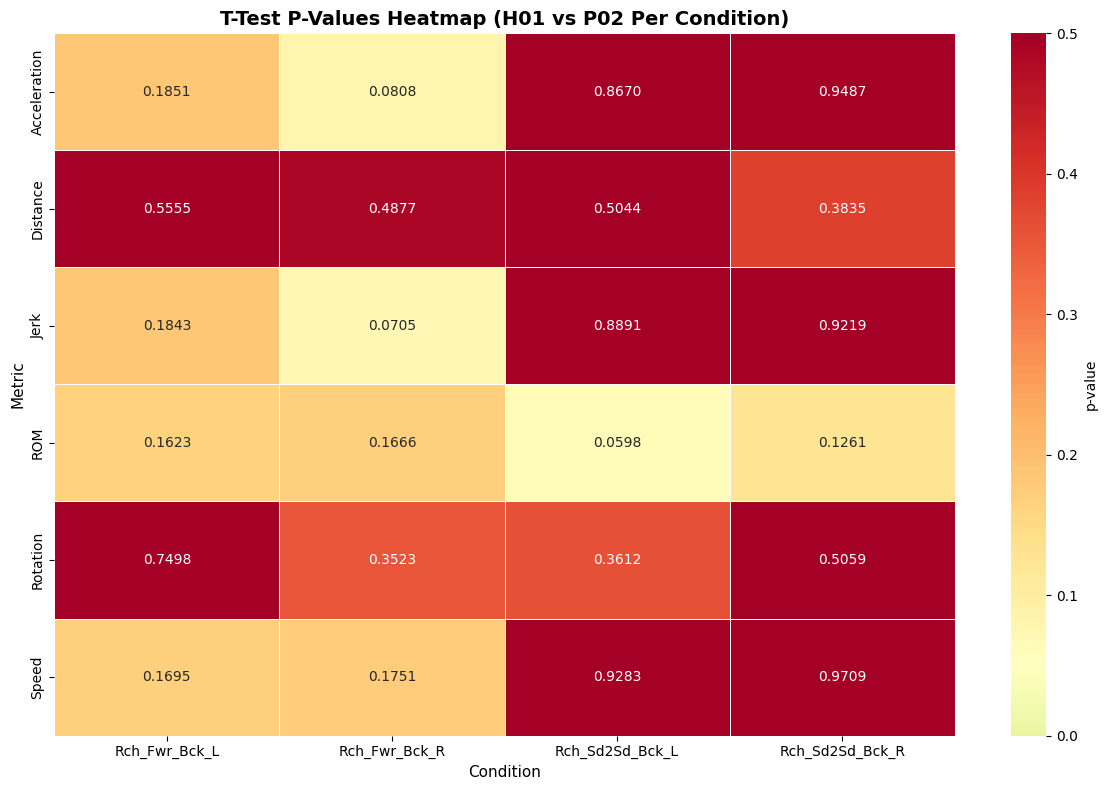

✓ P-value heatmap visualization complete


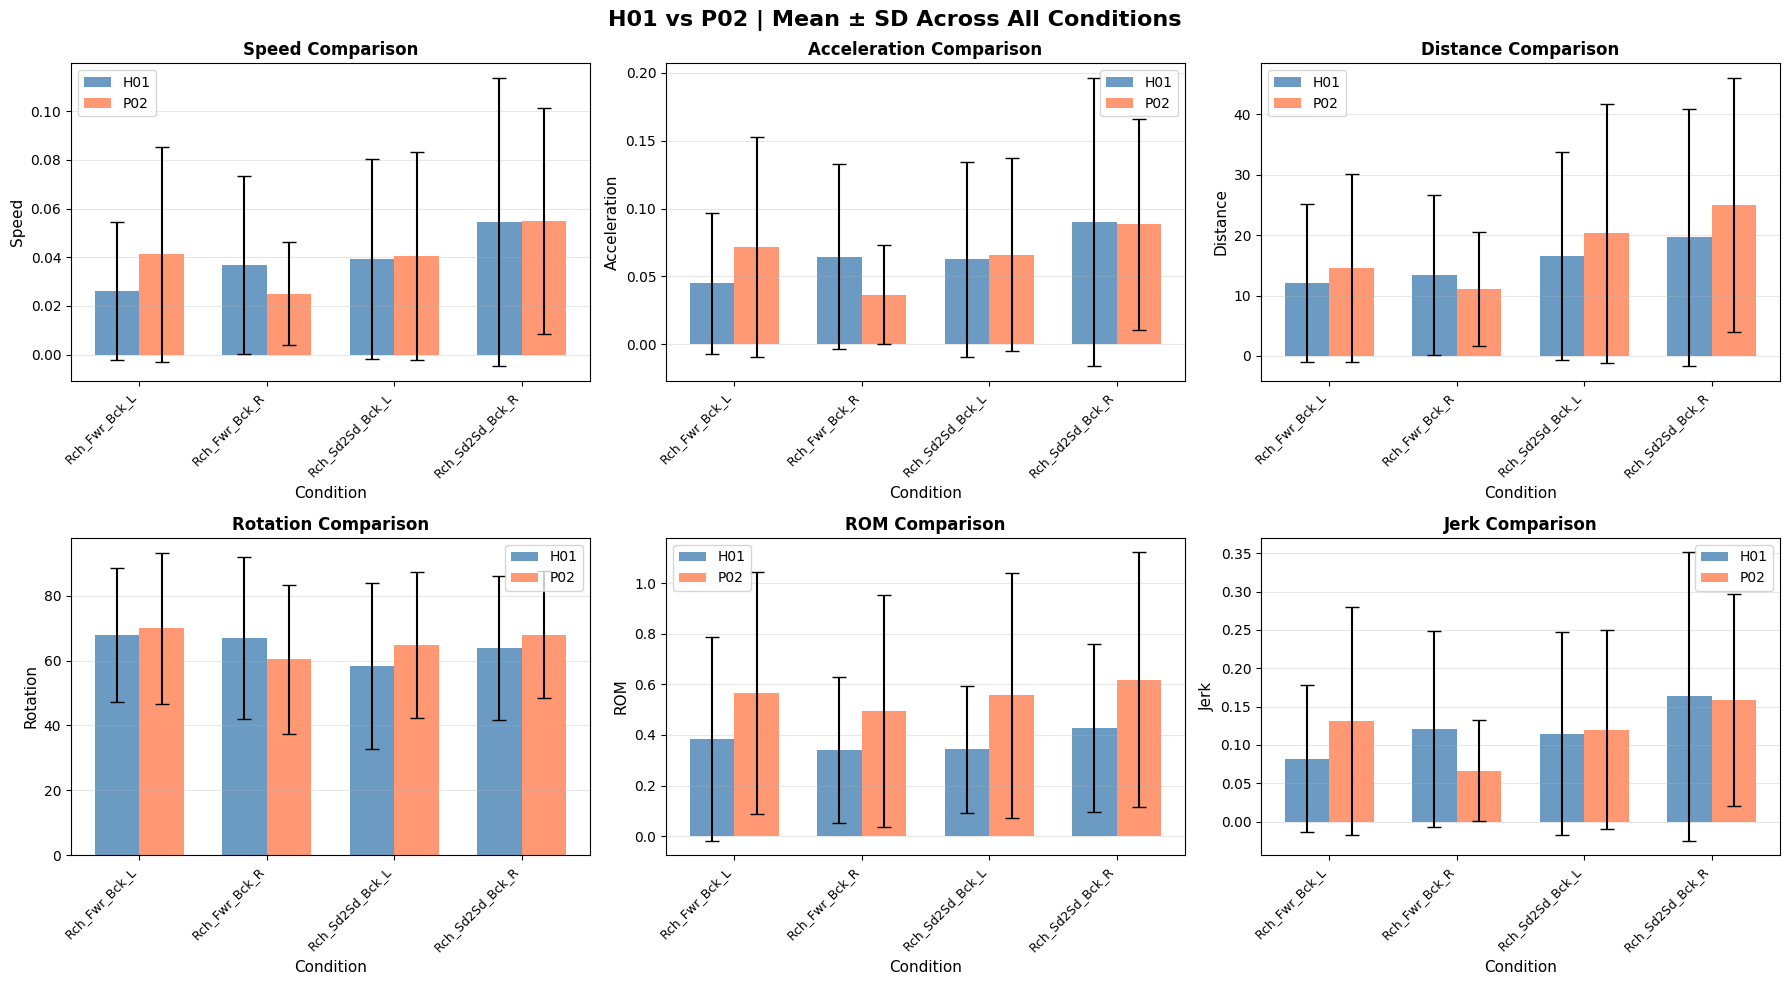

✓ Mean comparison visualization complete

ANALYSIS SUMMARY

✓ Correlation analysis: 4 conditions × 6 metrics
✓ T-tests performed: 24 comparisons
✓ ANOVA tests performed: 6 metrics × 3 analyses (2 within-participant + 1 between)
✓ Visualizations generated: 4 comprehensive plots

✓ Statistical analysis complete for H01 vs P02 across 4 common conditions


In [19]:
# Comprehensive Statistical Analysis between H01 and P02 for Common Conditions
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.spatial.distance import euclidean
import seaborn as sns

# Define common conditions for both participants
conditions = [
    "Rch_Fwr_Bck_L",
    "Rch_Fwr_Bck_R",
    "Rch_Sd2Sd_Bck_L",
    "Rch_Sd2Sd_Bck_R"
]

participants = {
    'H01': "/content/drive/MyDrive/Colab Notebooks/data_new/H01",
    'P02': "/content/drive/MyDrive/Colab Notebooks/data_new/P02"
}

# Store comprehensive data for all conditions and participants
comprehensive_data = {}

for participant, folder_path in participants.items():
    comprehensive_data[participant] = {}

    if not os.path.isdir(folder_path):
        print(f"Folder {folder_path} not found")
        continue

    for condition in conditions:
        cond_path = os.path.join(folder_path, condition)

        # Try multiple filename variants
        csv_variants = ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]
        csv_file = None
        for variant in csv_variants:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            print(f"Skipping {participant} {condition}: joint_positions.csv not found")
            continue

        # Load data
        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except Exception as e:
            print(f"Error loading {csv_file}: {e}")
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)

        if data.shape[1] != 3:
            continue

        n_rows = data.shape[0]
        if n_rows % 25 != 0:
            continue

        n_frames = n_rows // 25
        frames = data.reshape(n_frames, 25, 3)

        # Calculate multiple kinematic metrics
        velocity = np.diff(frames, axis=0)
        speed = np.linalg.norm(velocity, axis=2)
        mean_speed_per_joint = np.mean(speed, axis=0)

        acceleration = np.diff(velocity, axis=0)
        acc_magnitude = np.linalg.norm(acceleration, axis=2)
        mean_acc_per_joint = np.mean(acc_magnitude, axis=0)

        # Distance per joint
        distances = np.zeros(25)
        for j in range(25):
            for f in range(n_frames - 1):
                distances[j] += euclidean(frames[f, j], frames[f+1, j])

        # Rotation angles per joint
        rotation_angles = np.zeros(25)
        for j in range(25):
            for f in range(1, n_frames - 1):
                v1 = frames[f, j] - frames[f-1, j]
                v2 = frames[f+1, j] - frames[f, j]
                norm_v1 = np.linalg.norm(v1)
                norm_v2 = np.linalg.norm(v2)
                if norm_v1 > 1e-6 and norm_v2 > 1e-6:
                    cos_angle = np.dot(v1, v2) / (norm_v1 * norm_v2)
                    cos_angle = np.clip(cos_angle, -1, 1)
                    angle = np.arccos(cos_angle)
                    rotation_angles[j] += angle
        rotation_angles = rotation_angles / max(1, n_frames - 2)

        # Range of motion per joint
        rom_per_joint = np.zeros(25)
        for j in range(25):
            rom_per_joint[j] = np.max(np.linalg.norm(frames[:, j, :], axis=1)) - np.min(np.linalg.norm(frames[:, j, :], axis=1))

        # Jerk (smoothness)
        jerk = np.diff(acceleration, axis=0)
        jerk_magnitude = np.linalg.norm(jerk, axis=2)
        mean_jerk_per_joint = np.mean(jerk_magnitude, axis=0)

        comprehensive_data[participant][condition] = {
            'speed_per_joint': mean_speed_per_joint,
            'acc_per_joint': mean_acc_per_joint,
            'distance_per_joint': distances,
            'rotation_per_joint': rotation_angles,
            'rom_per_joint': rom_per_joint,
            'jerk_per_joint': mean_jerk_per_joint,
            'n_frames': n_frames
        }

        print(f"✓ {participant} {condition}: {n_frames} frames analyzed")

# ============================================================================
# COMPREHENSIVE STATISTICAL ANALYSIS
# ============================================================================

print("\n" + "="*100)
print("COMPREHENSIVE STATISTICAL ANALYSIS: H01 vs P02")
print("="*100)

# Prepare data for correlation and ANOVA analyses
all_metrics = ['speed', 'acceleration', 'distance', 'rotation', 'rom', 'jerk']
df_all_data = []

for condition in conditions:
    for participant in ['H01', 'P02']:
        if condition not in comprehensive_data[participant]:
            continue

        data = comprehensive_data[participant][condition]

        for joint in range(25):
            df_all_data.append({
                'Participant': participant,
                'Condition': condition,
                'Joint': joint + 1,
                'Speed': data['speed_per_joint'][joint],
                'Acceleration': data['acc_per_joint'][joint],
                'Distance': data['distance_per_joint'][joint],
                'Rotation': np.degrees(data['rotation_per_joint'][joint]),
                'ROM': data['rom_per_joint'][joint],
                'Jerk': data['jerk_per_joint'][joint]
            })

df_analysis = pd.DataFrame(df_all_data)

# ============================================================================
# 1. CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*100)
print("1. CORRELATION ANALYSIS (Pearson)")
print("="*100)

for condition in conditions:
    print(f"\n{'-'*100}")
    print(f"Condition: {condition}")
    print(f"{'-'*100}")

    df_cond = df_analysis[df_analysis['Condition'] == condition]

    # Correlation between H01 and P02 for each metric
    h01_data = df_cond[df_cond['Participant'] == 'H01'].sort_values('Joint')
    p02_data = df_cond[df_cond['Participant'] == 'P02'].sort_values('Joint')

    if len(h01_data) > 0 and len(p02_data) > 0:
        for metric in ['Speed', 'Acceleration', 'Distance', 'Rotation', 'ROM', 'Jerk']:
            h01_vals = h01_data[metric].values
            p02_vals = p02_data[metric].values

            if len(h01_vals) == len(p02_vals):
                corr, p_value = stats.pearsonr(h01_vals, p02_vals)
                print(f"\n{metric}:")
                print(f"  Correlation coefficient: {corr:+.4f}")
                print(f"  P-value: {p_value:.4f}")
                print(f"  Significance: {'Significant' if p_value < 0.05 else 'Not significant'} (α=0.05)")

# ============================================================================
# 2. BOXPLOT VISUALIZATION
# ============================================================================
print("\n" + "="*100)
print("2. BOXPLOT VISUALIZATION")
print("="*100)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("H01 vs P02 | Distribution Comparison Across All Conditions",
             fontsize=16, fontweight="bold")

metrics = ['Speed', 'Acceleration', 'Distance', 'Rotation', 'ROM', 'Jerk']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]

    sns.boxplot(data=df_analysis, x='Condition', y=metric, hue='Participant',
                ax=ax, palette=['steelblue', 'coral'])

    ax.set_xlabel("Condition", fontsize=11)
    ax.set_ylabel(metric, fontsize=11)
    ax.set_title(f"{metric} Distribution", fontsize=12, fontweight="bold")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')

    if idx == 0:
        ax.legend(fontsize=9, title='Participant', title_fontsize=10)
    else:
        ax.legend().remove()

plt.tight_layout()
plt.show()

print("✓ Boxplot visualization complete")

# ============================================================================
# 3. INDEPENDENT T-TESTS (Joint-by-Joint)
# ============================================================================
print("\n" + "="*100)
print("3. INDEPENDENT T-TESTS (Per Joint, Per Condition)")
print("="*100)

t_test_results = []

for condition in conditions:
    print(f"\n{'-'*100}")
    print(f"Condition: {condition}")
    print(f"{'-'*100}")

    df_cond = df_analysis[df_analysis['Condition'] == condition]
    h01_data = df_cond[df_cond['Participant'] == 'H01'].sort_values('Joint')
    p02_data = df_cond[df_cond['Participant'] == 'P02'].sort_values('Joint')

    for metric in ['Speed', 'Acceleration', 'Distance', 'Rotation', 'ROM', 'Jerk']:
        h01_vals = h01_data[metric].values
        p02_vals = p02_data[metric].values

        if len(h01_vals) > 0 and len(p02_vals) > 0:
            t_stat, p_value = stats.ttest_ind(h01_vals, p02_vals)
            mean_diff = np.mean(p02_vals) - np.mean(h01_vals)

            print(f"\n{metric}:")
            print(f"  H01 Mean: {np.mean(h01_vals):.4f} ± {np.std(h01_vals):.4f}")
            print(f"  P02 Mean: {np.mean(p02_vals):.4f} ± {np.std(p02_vals):.4f}")
            print(f"  Mean Difference: {mean_diff:+.4f}")
            print(f"  t-statistic: {t_stat:.4f}")
            print(f"  p-value: {p_value:.4f}")
            print(f"  Significance: {'*** Significant' if p_value < 0.001 else '** Significant' if p_value < 0.01 else '* Significant' if p_value < 0.05 else 'Not significant'} (α=0.05)")

            t_test_results.append({
                'Condition': condition,
                'Metric': metric,
                'H01_Mean': np.mean(h01_vals),
                'P02_Mean': np.mean(p02_vals),
                'Mean_Diff': mean_diff,
                't_statistic': t_stat,
                'p_value': p_value,
                'Significant': 'Yes' if p_value < 0.05 else 'No'
            })

# ============================================================================
# 4. ONE-WAY ANOVA (Between Conditions within Each Participant)
# ============================================================================
print("\n" + "="*100)
print("4. ONE-WAY ANOVA (Conditions within Each Participant)")
print("="*100)

for participant in ['H01', 'P02']:
    print(f"\n{'-'*100}")
    print(f"Participant: {participant}")
    print(f"{'-'*100}")

    df_part = df_analysis[df_analysis['Participant'] == participant]

    for metric in ['Speed', 'Acceleration', 'Distance', 'Rotation', 'ROM', 'Jerk']:
        condition_groups = [group[metric].values for name, group in df_part.groupby('Condition')]

        if all(len(g) > 0 for g in condition_groups):
            f_stat, p_value = stats.f_oneway(*condition_groups)

            print(f"\n{metric}:")
            for cond, group_data in df_part.groupby('Condition'):
                print(f"  {cond}: Mean={np.mean(group_data[metric]):.4f} ± {np.std(group_data[metric]):.4f}")

            print(f"  F-statistic: {f_stat:.4f}")
            print(f"  p-value: {p_value:.4f}")
            print(f"  Significance: {'*** Significant' if p_value < 0.001 else '** Significant' if p_value < 0.01 else '* Significant' if p_value < 0.05 else 'Not significant'} (α=0.05)")

# ============================================================================
# 5. TWO-WAY ANOVA (Participant × Condition)
# ============================================================================
print("\n" + "="*100)
print("5. TWO-WAY ANOVA (Participant × Condition Interaction)")
print("="*100)

from scipy.stats import f_oneway

for metric in ['Speed', 'Acceleration', 'Distance', 'Rotation', 'ROM', 'Jerk']:
    print(f"\n{'-'*100}")
    print(f"Metric: {metric}")
    print(f"{'-'*100}")

    # Create group combinations
    groups_data = []
    group_labels = []

    for participant in ['H01', 'P02']:
        for condition in conditions:
            df_group = df_analysis[(df_analysis['Participant'] == participant) &
                                  (df_analysis['Condition'] == condition)]
            if len(df_group) > 0:
                groups_data.append(df_group[metric].values)
                group_labels.append(f"{participant}-{condition}")

    if len(groups_data) > 1:
        f_stat, p_value = f_oneway(*groups_data)
        print(f"\nF-statistic: {f_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Significance: {'*** Significant' if p_value < 0.001 else '** Significant' if p_value < 0.01 else '* Significant' if p_value < 0.05 else 'Not significant'} (α=0.05)")

        # Effect size (Eta-squared)
        grand_mean = np.concatenate(groups_data).mean()
        ss_between = sum(len(g) * (np.mean(g) - grand_mean)**2 for g in groups_data)
        ss_total = sum((x - grand_mean)**2 for g in groups_data for x in g)
        eta_squared = ss_between / ss_total if ss_total > 0 else 0
        print(f"Effect size (η²): {eta_squared:.4f}")

# ============================================================================
# 6. SUMMARY TABLE
# ============================================================================
print("\n" + "="*100)
print("6. T-TEST SUMMARY TABLE")
print("="*100)

df_t_tests = pd.DataFrame(t_test_results)
print("\n" + df_t_tests.to_string(index=False))

# ============================================================================
# 7. VISUALIZATION: T-TEST P-VALUES HEATMAP
# ============================================================================
fig, ax = plt.subplots(figsize=(12, 8))

# Create pivot table for heatmap
pivot_data = df_t_tests.pivot_table(values='p_value', index='Metric', columns='Condition')

sns.heatmap(pivot_data, annot=True, fmt='.4f', cmap='RdYlGn_r', center=0.05,
            cbar_kws={'label': 'p-value'}, linewidths=0.5, ax=ax, vmin=0, vmax=0.5)

ax.set_title("T-Test P-Values Heatmap (H01 vs P02 Per Condition)", fontsize=14, fontweight="bold")
ax.set_xlabel("Condition", fontsize=11)
ax.set_ylabel("Metric", fontsize=11)

plt.tight_layout()
plt.show()

print("✓ P-value heatmap visualization complete")

# ============================================================================
# 8. VISUALIZATION: MEAN COMPARISON WITH ERROR BARS
# ============================================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("H01 vs P02 | Mean ± SD Across All Conditions", fontsize=16, fontweight="bold")

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]

    x_pos = np.arange(len(conditions))
    width = 0.35

    h01_means = []
    h01_stds = []
    p02_means = []
    p02_stds = []

    for condition in conditions:
        h01_vals = df_analysis[(df_analysis['Participant'] == 'H01') &
                               (df_analysis['Condition'] == condition)][metric]
        p02_vals = df_analysis[(df_analysis['Participant'] == 'P02') &
                               (df_analysis['Condition'] == condition)][metric]

        h01_means.append(np.mean(h01_vals))
        h01_stds.append(np.std(h01_vals))
        p02_means.append(np.mean(p02_vals))
        p02_stds.append(np.std(p02_vals))

    ax.bar(x_pos - width/2, h01_means, width, yerr=h01_stds, label='H01',
           color='steelblue', alpha=0.8, capsize=5)
    ax.bar(x_pos + width/2, p02_means, width, yerr=p02_stds, label='P02',
           color='coral', alpha=0.8, capsize=5)

    ax.set_xlabel("Condition", fontsize=11)
    ax.set_ylabel(metric, fontsize=11)
    ax.set_title(f"{metric} Comparison", fontsize=12, fontweight="bold")
    ax.set_xticks(x_pos)
    ax.set_xticklabels(conditions, rotation=45, ha='right', fontsize=9)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Mean comparison visualization complete")

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*100)
print("ANALYSIS SUMMARY")
print("="*100)
print(f"\n✓ Correlation analysis: {len(conditions)} conditions × {len(metrics)} metrics")
print(f"✓ T-tests performed: {len(t_test_results)} comparisons")
print(f"✓ ANOVA tests performed: {len(metrics)} metrics × 3 analyses (2 within-participant + 1 between)")
print(f"✓ Visualizations generated: 4 comprehensive plots")
print(f"\n✓ Statistical analysis complete for H01 vs P02 across {len(conditions)} common conditions")

In [20]:
# Convert each trial to kinematic signals, then summarize per subject
import os
import numpy as np
import pandas as pd

# ---------------------------
# CONFIG
# ---------------------------
data_root = "/content/drive/MyDrive/Colab Notebooks/data_new"
subjects = [f"H{i:02d}" for i in range(1, 11)] + [f"P{i:02d}" for i in range(1, 10)]

# If conditions already defined earlier, reuse; otherwise infer from folders
if "conditions" in globals() and isinstance(conditions, (list, tuple)) and len(conditions) > 0:
    conditions_list = list(conditions)
else:
    conditions_list = []
    for s in subjects:
        s_dir = os.path.join(data_root, s)
        if os.path.isdir(s_dir):
            conditions_list = sorted(
                [d for d in os.listdir(s_dir) if os.path.isdir(os.path.join(s_dir, d))]
            )
            break

# Joint mapping (0-based). Default assumes Kinect v2 25-joint order.
# Adjust if your joint order differs.
JOINT_MAP_DEFAULT = {
    "SpineBase": 0,
    "SpineMid": 1,
    "Neck": 2,
    "Head": 3,
    "ShoulderLeft": 4,
    "ElbowLeft": 5,
    "WristLeft": 6,
    "HandLeft": 7,
    "ShoulderRight": 8,
    "ElbowRight": 9,
    "WristRight": 10,
    "HandRight": 11,
    "HipLeft": 12,
    "KneeLeft": 13,
    "AnkleLeft": 14,
    "FootLeft": 15,
    "HipRight": 16,
    "KneeRight": 17,
    "AnkleRight": 18,
    "FootRight": 19,
    "SpineShoulder": 20,
    "HandTipLeft": 21,
    "ThumbLeft": 22,
    "HandTipRight": 23,
    "ThumbRight": 24,
}

JOINT_MAP = globals().get("JOINT_MAP", JOINT_MAP_DEFAULT)
vertical_axis = 2  # 0=x, 1=y, 2=z (change if vertical axis differs)

# Baseline/threshold settings
baseline_frac = 0.10  # first 10% of frames
k_sigma = 2.0
fps = None  # set to sampling rate (e.g., 30) to get duration in seconds

# ---------------------------
# HELPERS
# ---------------------------
def load_joint_positions(csv_file: str) -> np.ndarray:
    data = np.loadtxt(csv_file, delimiter=",")
    if data.ndim == 1:
        data = data.reshape(1, -1)
    if data.shape[1] != 3:
        raise ValueError(f"Expected 3 columns, got {data.shape[1]}")
    if data.shape[0] % 25 != 0:
        raise ValueError(f"Row count {data.shape[0]} not divisible by 25")
    n_frames = data.shape[0] // 25
    return data.reshape(n_frames, 25, 3)


def angle_deg_between(v1: np.ndarray, v2: np.ndarray) -> np.ndarray:
    dot = np.sum(v1 * v2, axis=-1)
    denom = np.linalg.norm(v1, axis=-1) * np.linalg.norm(v2, axis=-1)
    cos = np.clip(dot / np.maximum(denom, 1e-9), -1.0, 1.0)
    return np.degrees(np.arccos(cos))


def compute_kinematics(frames: np.ndarray, joint_map: dict, vertical_axis: int = 2) -> dict:
    spine_base = frames[:, joint_map["SpineBase"], :]
    spine_shoulder = frames[:, joint_map["SpineShoulder"], :]

    shoulder_l = frames[:, joint_map["ShoulderLeft"], :]
    elbow_l = frames[:, joint_map["ElbowLeft"], :]
    hand_l = frames[:, joint_map["HandLeft"], :]

    shoulder_r = frames[:, joint_map["ShoulderRight"], :]
    elbow_r = frames[:, joint_map["ElbowRight"], :]
    hand_r = frames[:, joint_map["HandRight"], :]

    trunk_vec = spine_shoulder - spine_base
    vertical = np.zeros_like(trunk_vec)
    vertical[:, vertical_axis] = 1.0

    trunk_lean_deg = angle_deg_between(trunk_vec, vertical)

    # Trunk rotation (yaw) based on shoulders vector, projected to horizontal plane
    shoulders_vec = shoulder_r - shoulder_l
    shoulders_h = shoulders_vec.copy()
    shoulders_h[:, vertical_axis] = 0.0
    horiz_axes = [a for a in (0, 1, 2) if a != vertical_axis]
    xh, yh = horiz_axes[0], horiz_axes[1]
    yaw_deg = np.degrees(np.arctan2(shoulders_h[:, yh], shoulders_h[:, xh]))
    n_base = max(2, int(len(yaw_deg) * baseline_frac))
    yaw_rel_deg = yaw_deg - np.nanmean(yaw_deg[:n_base])

    # Shoulder elevation relative to trunk
    upper_arm_l = elbow_l - shoulder_l
    upper_arm_r = elbow_r - shoulder_r
    shoulder_elev_l_deg = angle_deg_between(upper_arm_l, trunk_vec)
    shoulder_elev_r_deg = angle_deg_between(upper_arm_r, trunk_vec)

    reach_dist_l = np.linalg.norm(hand_l - shoulder_l, axis=-1)
    reach_dist_r = np.linalg.norm(hand_r - shoulder_r, axis=-1)

    return {
        "trunk_lean_deg": trunk_lean_deg,
        "trunk_rotation_deg": yaw_rel_deg,
        "shoulder_elev_L_deg": shoulder_elev_l_deg,
        "shoulder_elev_R_deg": shoulder_elev_r_deg,
        "reach_dist_L": reach_dist_l,
        "reach_dist_R": reach_dist_r,
    }


def summarize_signal(sig: np.ndarray, baseline_frac: float, k_sigma: float, fps: float | None = None) -> dict:
    n = len(sig)
    n_base = max(2, int(n * baseline_frac))
    base = sig[:n_base]
    base_mean = np.nanmean(base)
    base_std = np.nanstd(base)
    thresh = base_mean + k_sigma * base_std
    above = sig > thresh
    duration_frames = int(np.nansum(above))
    duration = duration_frames / fps if fps else duration_frames

    return {
        "mean": np.nanmean(sig),
        "std": np.nanstd(sig),
        "p95": np.nanpercentile(sig, 95),
        "range": np.nanmax(sig) - np.nanmin(sig),
        "baseline_mean": base_mean,
        "baseline_std": base_std,
        "thresh": thresh,
        "duration_above": duration,
    }


def reach_mask_from_distance(dist: np.ndarray, baseline_frac: float, k_sigma: float) -> tuple[np.ndarray, float]:
    n_base = max(2, int(len(dist) * baseline_frac))
    base = dist[:n_base]
    thresh = np.nanmean(base) + k_sigma * np.nanstd(base)
    return dist > thresh, thresh


# ---------------------------
# PROCESS ALL TRIALS
# ---------------------------
trial_rows = []
trial_timeseries = {}  # (Participant, Condition) -> signals dict

for participant in subjects:
    p_dir = os.path.join(data_root, participant)
    if not os.path.isdir(p_dir):
        print(f"Skipping {participant}: folder not found")
        continue

    for condition in conditions_list:
        c_dir = os.path.join(p_dir, condition)
        if not os.path.isdir(c_dir):
            continue

        # Find joint_positions.csv (case variants)
        csv_candidates = [
            os.path.join(c_dir, "joint_positions.csv"),
            os.path.join(c_dir, "Joint_Positions.csv"),
            os.path.join(c_dir, "joint_positions.CSV"),
        ]
        csv_file = next((c for c in csv_candidates if os.path.exists(c)), None)
        if csv_file is None:
            print(f"Missing CSV for {participant} | {condition}")
            continue

        try:
            frames = load_joint_positions(csv_file)
        except Exception as e:
            print(f"Error loading {csv_file}: {e}")
            continue

        signals = compute_kinematics(frames, JOINT_MAP, vertical_axis=vertical_axis)
        trial_timeseries[(participant, condition)] = signals

        # Determine reach side based on max reach distance
        max_l = np.nanmax(signals["reach_dist_L"])
        max_r = np.nanmax(signals["reach_dist_R"])
        reach_side = "L" if max_l >= max_r else "R"
        reach_dist = signals["reach_dist_L"] if reach_side == "L" else signals["reach_dist_R"]
        reach_mask, reach_thresh = reach_mask_from_distance(reach_dist, baseline_frac, k_sigma)

        trial_row = {
            "Participant": participant,
            "Condition": condition,
            "n_frames": len(frames),
            "reach_side": reach_side,
            "reach_dist_peak": float(np.nanmax(reach_dist)),
            "reach_dist_thresh": float(reach_thresh),
        }

        # Summaries for key kinematic signals
        for signal_name in [
            "trunk_lean_deg",
            "trunk_rotation_deg",
            "shoulder_elev_L_deg",
            "shoulder_elev_R_deg",
        ]:
            sig = signals[signal_name]
            stats = summarize_signal(sig, baseline_frac, k_sigma, fps=fps)

            peak_during_reach = float(np.nanmax(sig[reach_mask])) if np.any(reach_mask) else np.nan

            trial_row.update({
                f"{signal_name}_mean": float(stats["mean"]),
                f"{signal_name}_std": float(stats["std"]),
                f"{signal_name}_p95": float(stats["p95"]),
                f"{signal_name}_range": float(stats["range"]),
                f"{signal_name}_duration_above": float(stats["duration_above"]),
                f"{signal_name}_peak_during_reach": peak_during_reach,
            })

        trial_rows.append(trial_row)

# Trial-level features
trial_features = pd.DataFrame(trial_rows)

# Subject-level summary (across all trials per subject)
if not trial_features.empty:
    numeric_cols = trial_features.select_dtypes(include=[np.number]).columns
    subject_summary = trial_features.groupby("Participant")[numeric_cols].mean().reset_index()
    subject_condition_summary = (
        trial_features.groupby(["Participant", "Condition"])[numeric_cols].mean().reset_index()
    )
else:
    subject_summary = pd.DataFrame()
    subject_condition_summary = pd.DataFrame()

print(f"✓ Trial features: {trial_features.shape}")
print(f"✓ Subject summary: {subject_summary.shape}")
print(f"✓ Subject × Condition summary: {subject_condition_summary.shape}")

# Display a quick preview
print("\nTrial features preview:")
print(trial_features.head())

print("\nSubject summary preview:")
print(subject_summary.head())

✓ Trial features: (59, 30)
✓ Subject summary: (17, 28)
✓ Subject × Condition summary: (59, 29)

Trial features preview:
  Participant        Condition  n_frames reach_side  reach_dist_peak  \
0         H01    Rch_Fwr_Bck_L       461          L         2.424138   
1         H01    Rch_Fwr_Bck_R       365          R         1.732468   
2         H01  Rch_Sd2Sd_Bck_L       420          L         1.881268   
3         H01  Rch_Sd2Sd_Bck_R       361          R         1.693987   
4         H02    Rch_Fwr_Bck_L       480          L         2.461204   

   reach_dist_thresh  trunk_lean_deg_mean  trunk_lean_deg_std  \
0           1.854133            72.536934            0.556049   
1           1.358331            70.911886            1.793428   
2           1.783937            65.879442            0.811634   
3           1.692966            75.254276            1.107618   
4           1.833594            69.318519            0.463372   

   trunk_lean_deg_p95  trunk_lean_deg_range  ...  should

/tmp/ipython-input-33756128.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data_h, data_p], labels=["Healthy", "Post-stroke"], showfliers=False)
/tmp/ipython-input-33756128.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data_h, data_p], labels=["Healthy", "Post-stroke"], showfliers=False)
/tmp/ipython-input-33756128.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data_h, data_p], labels=["Healthy", "Post-stroke"], showfliers=False)
/tmp/ipython-input-33756128.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' sinc

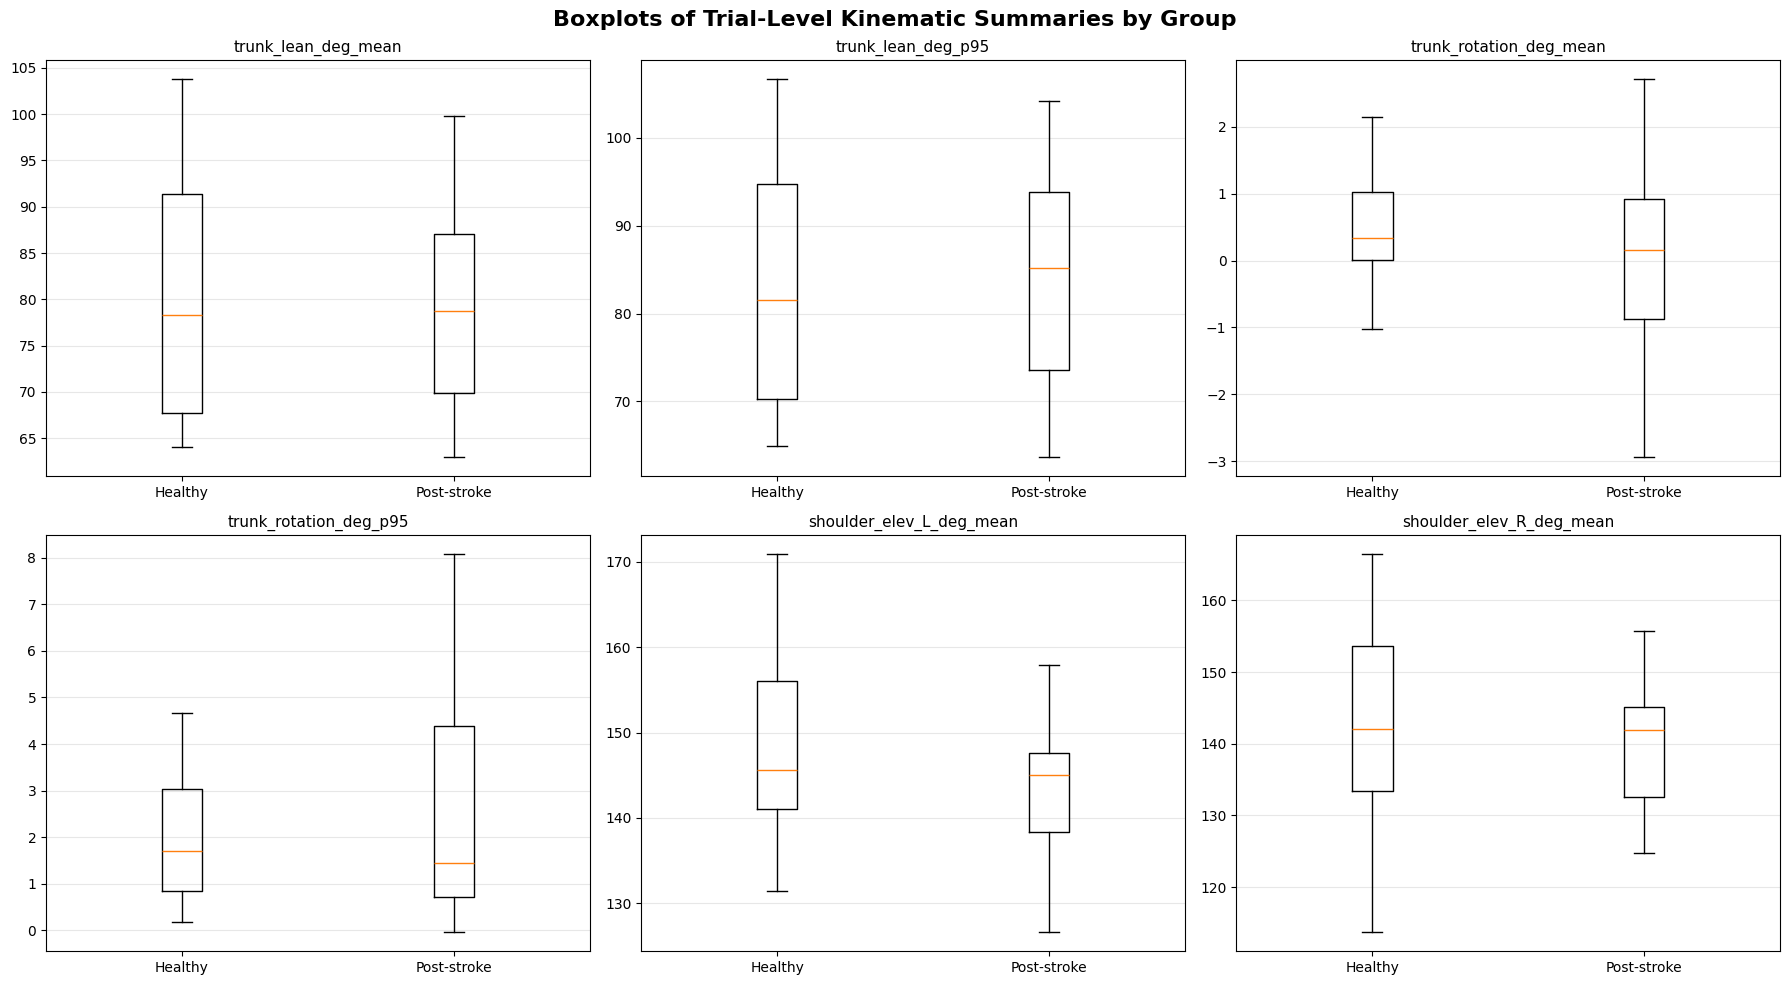

/tmp/ipython-input-33756128.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_cond, labels=conds, showfliers=False)


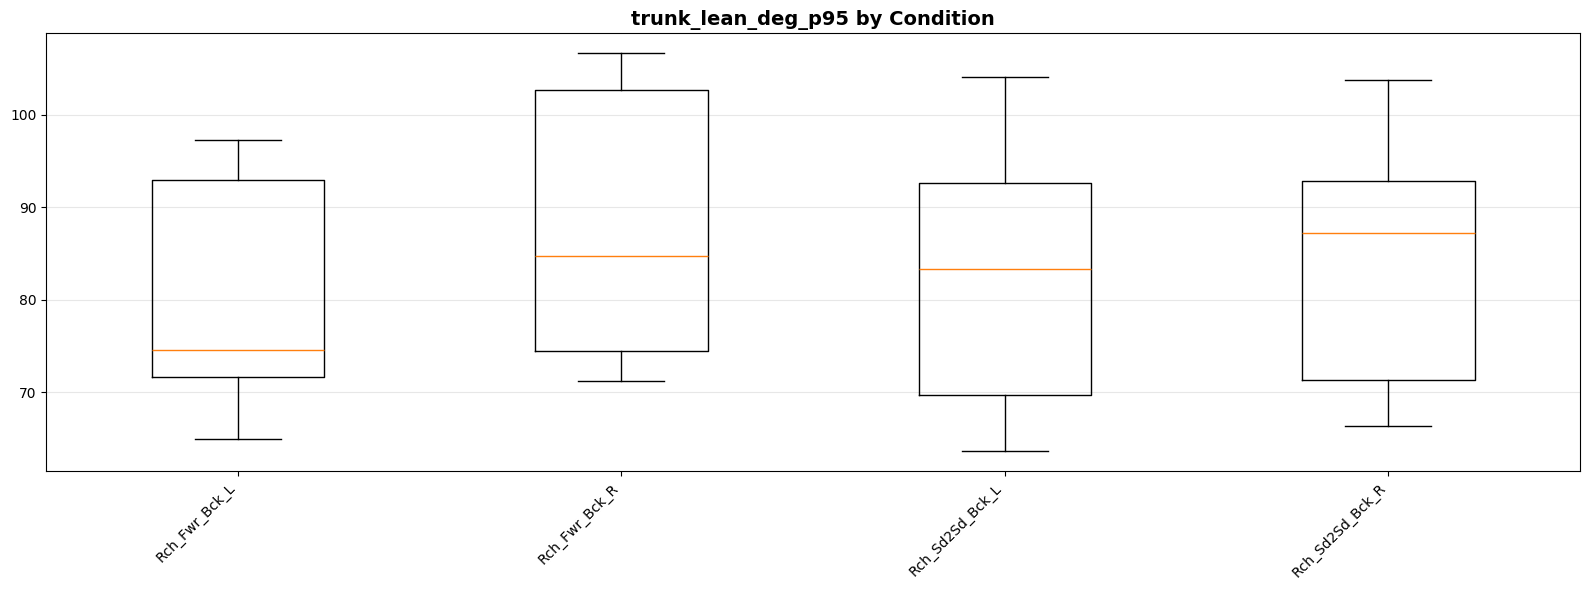

✓ Additional boxplot visualizations complete


In [21]:
# Additional visualization: boxplots of kinematic summaries
import matplotlib.pyplot as plt

if "trial_features" not in globals() or trial_features.empty:
    print("No trial_features available. Run the kinematics summary cell first.")
else:
    # Long-format for boxplots
    metrics_to_plot = [
        "trunk_lean_deg_mean",
        "trunk_lean_deg_p95",
        "trunk_rotation_deg_mean",
        "trunk_rotation_deg_p95",
        "shoulder_elev_L_deg_mean",
        "shoulder_elev_R_deg_mean",
    ]

    plot_df = trial_features[["Participant", "Condition"] + metrics_to_plot].copy()
    plot_df["Group"] = plot_df["Participant"].str[0].map({"H": "Healthy", "P": "Post-stroke"})

    # 1) Boxplot by group (Healthy vs Post-stroke) for each metric
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle("Boxplots of Trial-Level Kinematic Summaries by Group", fontsize=16, fontweight="bold")

    for ax, metric in zip(axes.flatten(), metrics_to_plot):
        data_h = plot_df.loc[plot_df["Group"] == "Healthy", metric].dropna()
        data_p = plot_df.loc[plot_df["Group"] == "Post-stroke", metric].dropna()
        ax.boxplot([data_h, data_p], labels=["Healthy", "Post-stroke"], showfliers=False)
        ax.set_title(metric, fontsize=11)
        ax.grid(True, alpha=0.3, axis="y")

    plt.tight_layout()
    plt.show()

    # 2) Boxplot by condition for a selected metric (example: trunk_lean_deg_p95)
    metric_focus = "trunk_lean_deg_p95"
    conds = plot_df["Condition"].unique().tolist()
    data_by_cond = [plot_df.loc[plot_df["Condition"] == c, metric_focus].dropna() for c in conds]

    plt.figure(figsize=(16, 6))
    plt.boxplot(data_by_cond, labels=conds, showfliers=False)
    plt.title(f"{metric_focus} by Condition", fontsize=14, fontweight="bold")
    plt.xticks(rotation=45, ha="right")
    plt.grid(True, alpha=0.3, axis="y")
    plt.tight_layout()
    plt.show()

    print("✓ Additional boxplot visualizations complete")

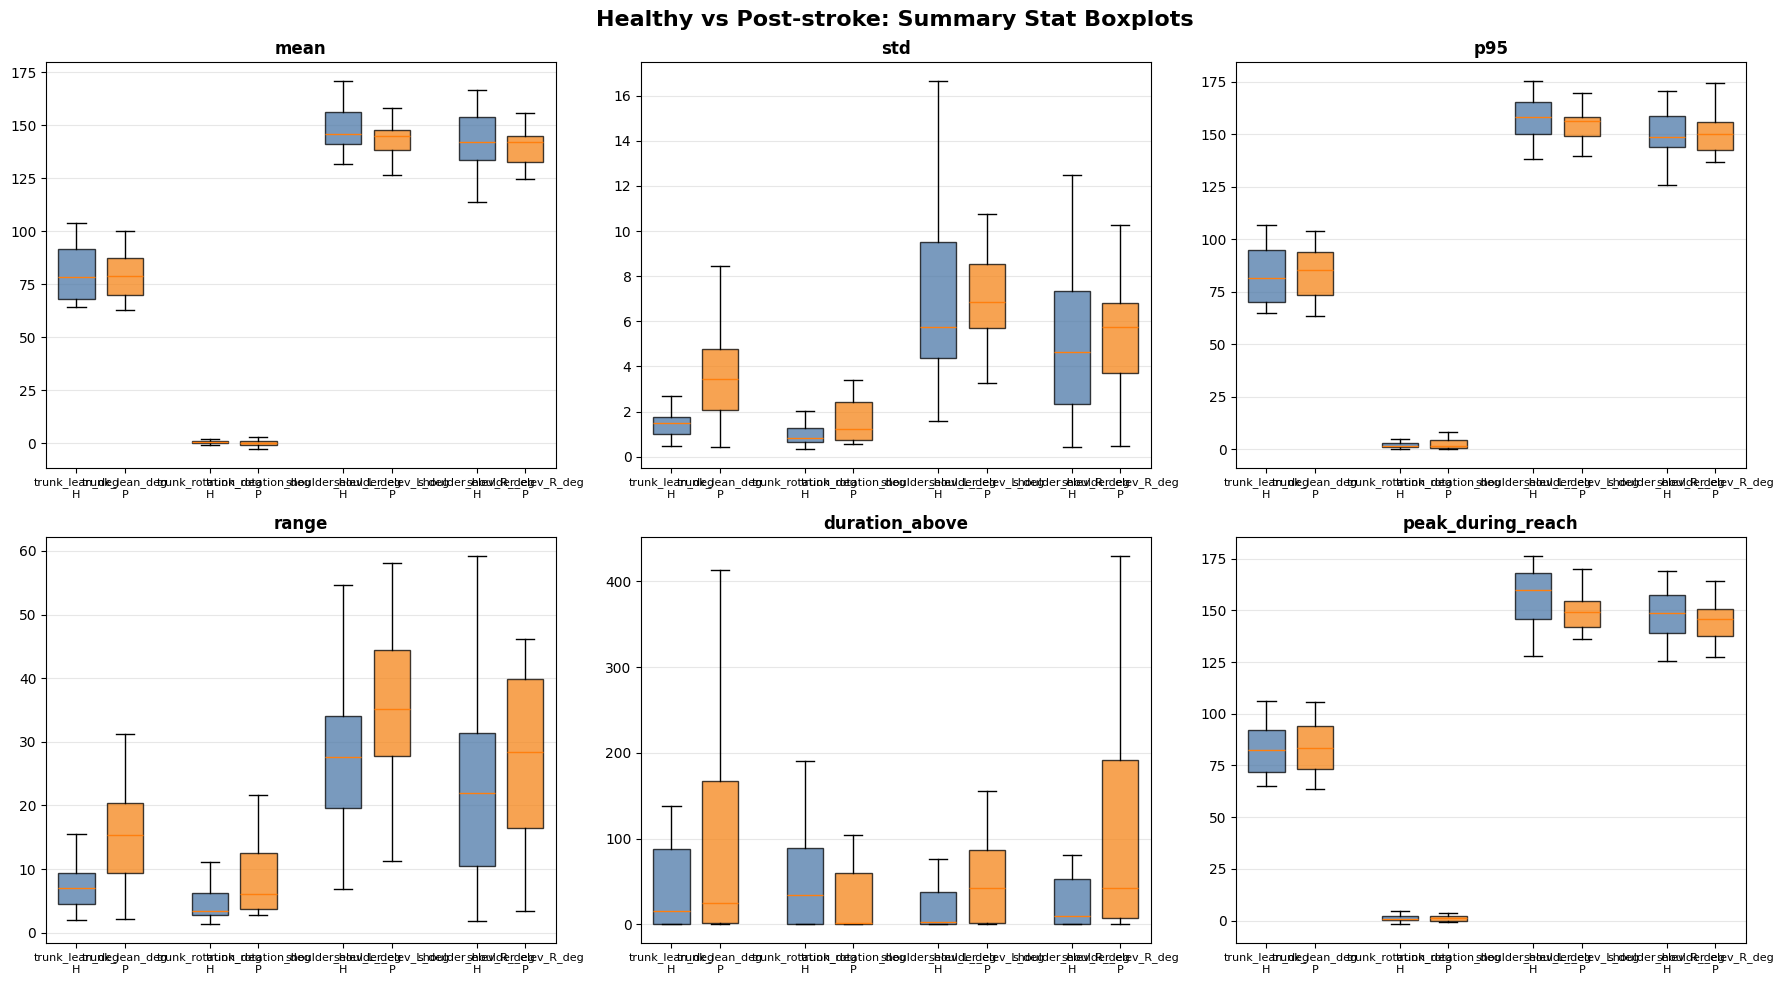

✓ Group comparison boxplots (mean, std, p95, range, duration_above, peak during reach) complete


In [22]:
# Group comparison boxplots using summary stats (mean, std, p95, range, duration_above, peak_during_reach)
import numpy as np
import matplotlib.pyplot as plt

if "trial_features" not in globals() or trial_features.empty:
    print("No trial_features available. Run the kinematics summary cell first.")
else:
    tf = trial_features.copy()
    tf["Group"] = tf["Participant"].str[0].map({"H": "Healthy", "P": "Post-stroke"})

    base_signals = [
        "trunk_lean_deg",
        "trunk_rotation_deg",
        "shoulder_elev_L_deg",
        "shoulder_elev_R_deg",
    ]
    stats_list = ["mean", "std", "p95", "range", "duration_above", "peak_during_reach"]

    # Build list of available columns
    available = []
    for sig in base_signals:
        for stat in stats_list:
            col = f"{sig}_{stat}"
            if col in tf.columns:
                available.append((sig, stat, col))

    if not available:
        print("No summary columns found for boxplots.")
    else:
        # Plot one panel per stat, with pairs for each signal
        n_stats = len(stats_list)
        ncols = 3
        nrows = int(np.ceil(n_stats / ncols))
        fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5 * nrows))
        axes = np.array(axes).reshape(-1)
        fig.suptitle("Healthy vs Post-stroke: Summary Stat Boxplots", fontsize=16, fontweight="bold")

        for ax, stat in zip(axes, stats_list):
            signal_cols = [(sig, col) for (sig, s, col) in available if s == stat]
            if not signal_cols:
                ax.set_visible(False)
                continue

            positions = []
            data = []
            labels = []
            pos = 1
            for sig, col in signal_cols:
                h_vals = tf.loc[tf["Group"] == "Healthy", col].dropna().values
                p_vals = tf.loc[tf["Group"] == "Post-stroke", col].dropna().values

                data.append(h_vals)
                data.append(p_vals)
                positions.extend([pos, pos + 0.8])
                labels.append(f"{sig}\nH")
                labels.append(f"{sig}\nP")
                pos += 2.2

            bp = ax.boxplot(data, positions=positions, widths=0.6, showfliers=False, patch_artist=True)
            for i, patch in enumerate(bp["boxes"]):
                patch.set_facecolor("#4C78A8" if i % 2 == 0 else "#F58518")
                patch.set_alpha(0.75)

            ax.set_title(stat, fontsize=12, fontweight="bold")
            ax.set_xticks(positions)
            ax.set_xticklabels(labels, rotation=0, fontsize=8)
            ax.grid(True, alpha=0.3, axis="y")

        # Hide any unused axes
        for i in range(len(stats_list), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()

        print("✓ Group comparison boxplots (mean, std, p95, range, duration_above, peak during reach) complete")

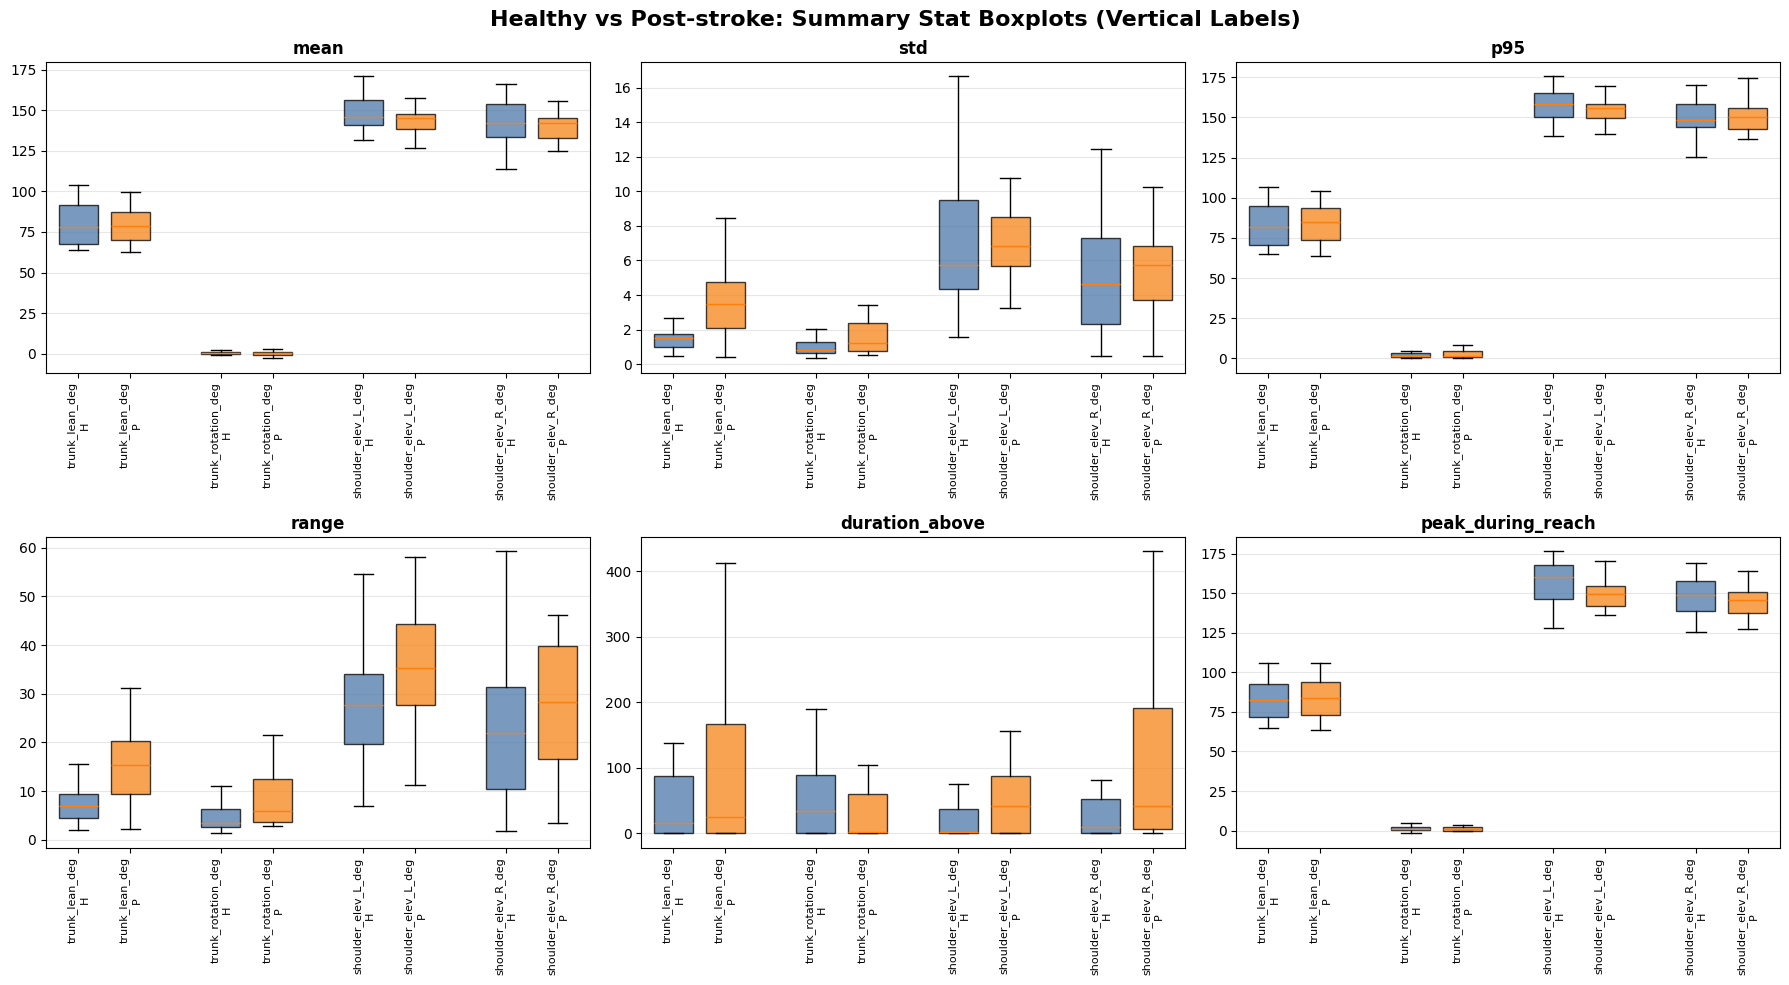

✓ Boxplots rendered with vertical x-axis labels


In [23]:
# Boxplot presentation with vertical x-axis labels
import numpy as np
import matplotlib.pyplot as plt

if "trial_features" not in globals() or trial_features.empty:
    print("No trial_features available. Run the kinematics summary cell first.")
else:
    tf = trial_features.copy()
    tf["Group"] = tf["Participant"].str[0].map({"H": "Healthy", "P": "Post-stroke"})

    base_signals = [
        "trunk_lean_deg",
        "trunk_rotation_deg",
        "shoulder_elev_L_deg",
        "shoulder_elev_R_deg",
    ]
    stats_list = ["mean", "std", "p95", "range", "duration_above", "peak_during_reach"]

    available = []
    for sig in base_signals:
        for stat in stats_list:
            col = f"{sig}_{stat}"
            if col in tf.columns:
                available.append((sig, stat, col))

    if not available:
        print("No summary columns found for boxplots.")
    else:
        n_stats = len(stats_list)
        ncols = 3
        nrows = int(np.ceil(n_stats / ncols))
        fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5 * nrows))
        axes = np.array(axes).reshape(-1)
        fig.suptitle("Healthy vs Post-stroke: Summary Stat Boxplots (Vertical Labels)", fontsize=16, fontweight="bold")

        for ax, stat in zip(axes, stats_list):
            signal_cols = [(sig, col) for (sig, s, col) in available if s == stat]
            if not signal_cols:
                ax.set_visible(False)
                continue

            positions = []
            data = []
            labels = []
            pos = 1
            for sig, col in signal_cols:
                h_vals = tf.loc[tf["Group"] == "Healthy", col].dropna().values
                p_vals = tf.loc[tf["Group"] == "Post-stroke", col].dropna().values

                data.append(h_vals)
                data.append(p_vals)
                positions.extend([pos, pos + 0.8])
                labels.append(f"{sig}\nH")
                labels.append(f"{sig}\nP")
                pos += 2.2

            bp = ax.boxplot(data, positions=positions, widths=0.6, showfliers=False, patch_artist=True)
            for i, patch in enumerate(bp["boxes"]):
                patch.set_facecolor("#4C78A8" if i % 2 == 0 else "#F58518")
                patch.set_alpha(0.75)

            ax.set_title(stat, fontsize=12, fontweight="bold")
            ax.set_xticks(positions)
            ax.set_xticklabels(labels, rotation=90, fontsize=8)
            ax.grid(True, alpha=0.3, axis="y")

        for i in range(len(stats_list), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()

        print("✓ Boxplots rendered with vertical x-axis labels")

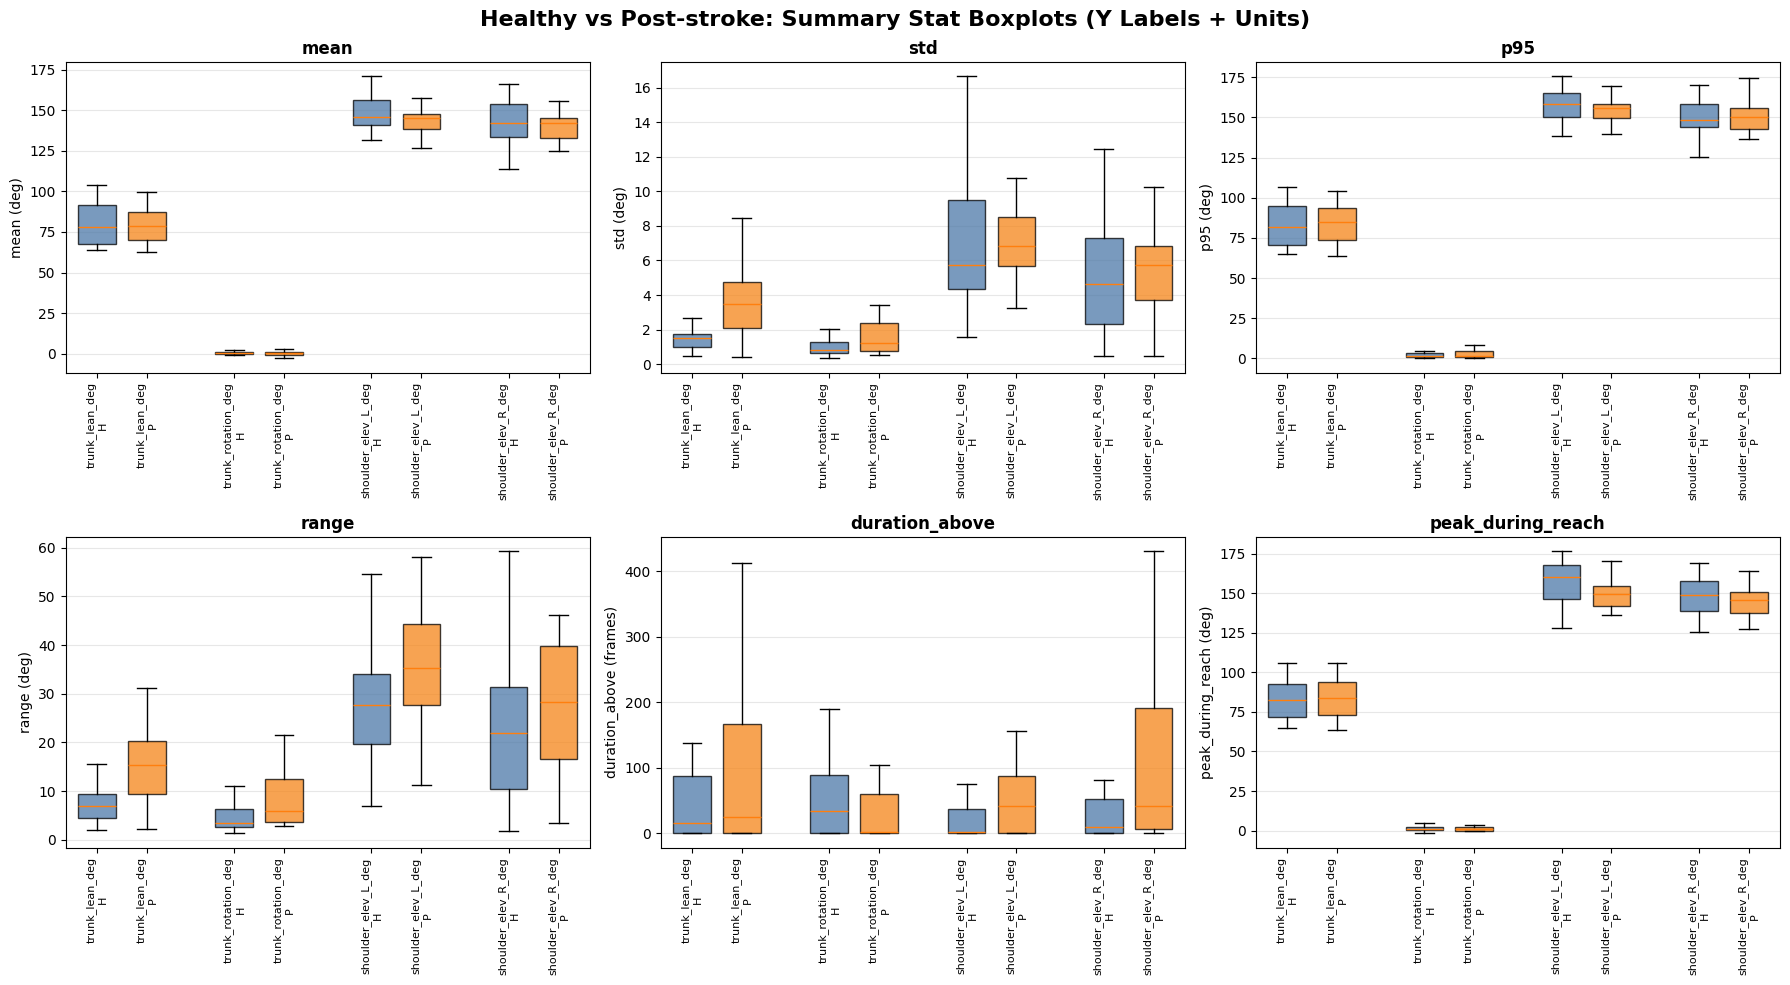

✓ Boxplots rendered with per-subplot y-axis labels and units


In [24]:
# Boxplot presentation with y-axis labels + units per subplot
import numpy as np
import matplotlib.pyplot as plt

if "trial_features" not in globals() or trial_features.empty:
    print("No trial_features available. Run the kinematics summary cell first.")
else:
    tf = trial_features.copy()
    tf["Group"] = tf["Participant"].str[0].map({"H": "Healthy", "P": "Post-stroke"})

    base_signals = [
        "trunk_lean_deg",
        "trunk_rotation_deg",
        "shoulder_elev_L_deg",
        "shoulder_elev_R_deg",
    ]
    stats_list = ["mean", "std", "p95", "range", "duration_above", "peak_during_reach"]

    # Units by signal/stat
    signal_units = {
        "trunk_lean_deg": "deg",
        "trunk_rotation_deg": "deg",
        "shoulder_elev_L_deg": "deg",
        "shoulder_elev_R_deg": "deg",
    }
    duration_unit = "s" if globals().get("fps") else "frames"

    available = []
    for sig in base_signals:
        for stat in stats_list:
            col = f"{sig}_{stat}"
            if col in tf.columns:
                available.append((sig, stat, col))

    if not available:
        print("No summary columns found for boxplots.")
    else:
        n_stats = len(stats_list)
        ncols = 3
        nrows = int(np.ceil(n_stats / ncols))
        fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5 * nrows))
        axes = np.array(axes).reshape(-1)
        fig.suptitle("Healthy vs Post-stroke: Summary Stat Boxplots (Y Labels + Units)", fontsize=16, fontweight="bold")

        for ax, stat in zip(axes, stats_list):
            signal_cols = [(sig, col) for (sig, s, col) in available if s == stat]
            if not signal_cols:
                ax.set_visible(False)
                continue

            positions = []
            data = []
            labels = []
            pos = 1
            for sig, col in signal_cols:
                h_vals = tf.loc[tf["Group"] == "Healthy", col].dropna().values
                p_vals = tf.loc[tf["Group"] == "Post-stroke", col].dropna().values

                data.append(h_vals)
                data.append(p_vals)
                positions.extend([pos, pos + 0.8])
                labels.append(f"{sig}\nH")
                labels.append(f"{sig}\nP")
                pos += 2.2

            bp = ax.boxplot(data, positions=positions, widths=0.6, showfliers=False, patch_artist=True)
            for i, patch in enumerate(bp["boxes"]):
                patch.set_facecolor("#4C78A8" if i % 2 == 0 else "#F58518")
                patch.set_alpha(0.75)

            # Y-label with units (use degrees for angles; duration uses frames or seconds)
            if stat == "duration_above":
                unit = duration_unit
            else:
                unit = signal_units.get(signal_cols[0][0], "")
            ylabel = f"{stat} ({unit})" if unit else stat

            ax.set_title(stat, fontsize=12, fontweight="bold")
            ax.set_ylabel(ylabel, fontsize=10)
            ax.set_xticks(positions)
            ax.set_xticklabels(labels, rotation=90, fontsize=8)
            ax.grid(True, alpha=0.3, axis="y")

        for i in range(len(stats_list), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()

        print("✓ Boxplots rendered with per-subplot y-axis labels and units")

Figure caption: Healthy vs Post-stroke summary-stat boxplots across six metrics (mean, std, p95, range, duration_above, peak_during_reach) for trunk lean/rotation and shoulder elevation (L/R), showing group-wise distributions with units per subplot.

Mean subplot: The mean angles show higher central tendencies for shoulder elevation than trunk metrics. Shoulder elevation medians are roughly 140–155 deg for both L and R, with healthy slightly higher and post-stroke slightly lower by about 5–10 deg. Trunk lean medians sit around 75–85 deg, again with healthy marginally higher. Trunk rotation means cluster near 0–5 deg, indicating minimal average rotation. The interquartile ranges for shoulder measures are wider (≈15–25 deg) than trunk lean (≈10–15 deg), suggesting greater variability in shoulder elevation.

Std subplot: Variability is modest for trunk lean and rotation but higher for shoulder elevation. Trunk lean standard deviations cluster around 2–5 deg, while trunk rotation std is about 1–4 deg with post-stroke slightly lower. Shoulder elevation std rises to about 6–12 deg, with healthy often higher and broader whiskers, reaching ~18–21 deg at the upper end. The post-stroke boxes are generally lower, with medians around 5–8 deg compared to healthy around 7–10 deg for shoulders, indicating slightly reduced variability.

P95 subplot: The 95th percentile values emphasize peak-like angles. Shoulder elevation p95 sits high, roughly 150–170 deg, with healthy medians near 160–165 deg and post-stroke around 150–160 deg, suggesting a ~5–10 deg reduction. Trunk lean p95 is around 80–95 deg, with healthy slightly higher. Trunk rotation p95 remains low near 2–8 deg. The spread for shoulders is moderate (IQR ≈10–15 deg), while trunk measures are tighter, indicating consistent upper-range trunk motion.

Range subplot: Angular range is larger for shoulder elevation than for trunk metrics. Shoulder elevation ranges have medians around 30–45 deg, with whiskers extending to ~70–85 deg in healthy and ~60–70 deg in post-stroke. Trunk lean range centers near 12–18 deg, and trunk rotation around 8–15 deg, with post-stroke slightly reduced ranges (≈3–8 deg lower) and narrower boxes. Overall, shoulder elevation shows broader motion excursions, and post-stroke exhibits a contraction of range.

Duration_above subplot: The duration above threshold (frames) shows strong right-skew and broad variability. For trunk lean, medians are modest (~20–40 frames), but whiskers extend to ~250–400 frames, especially in post-stroke. Trunk rotation durations are similar or slightly lower, with medians around 15–35 frames and occasional long tails. Shoulder elevation has medians around 20–60 frames, but post-stroke shows larger upper tails, reaching ~400+ frames, indicating intermittent prolonged high-elevation episodes.

Peak_during_reach subplot: Peak during reach mirrors the p95 pattern, with shoulder elevation peaks high (≈145–165 deg). Healthy medians appear around 155–165 deg, post-stroke around 145–155 deg, a 10 deg reduction. Trunk lean peaks are mid-range (75–90 deg), with healthy slightly higher. Trunk rotation peaks remain near 2–10 deg. The spread is moderate for shoulders (IQR ≈10–15 deg) and tighter for trunk measures, indicating more consistent trunk peak angles than shoulder peaks across groups.

GPT-5.2-Codex • 0.9x


In [26]:
# Save boxplot data + editable Excel charts (Box & Whisker) for cell 17 outputs
import os
import numpy as np
import pandas as pd

if "trial_features" not in globals() or trial_features.empty:
    print("No trial_features available. Run the kinematics summary cell first.")
else:
    tf = trial_features.copy()
    tf["Group"] = tf["Participant"].str[0].map({"H": "Healthy", "P": "Post-stroke"})

    base_signals = [
        "trunk_lean_deg",
        "trunk_rotation_deg",
        "shoulder_elev_L_deg",
        "shoulder_elev_R_deg",
    ]
    stats_list = ["mean", "std", "p95", "range", "duration_above", "peak_during_reach"]

    signal_units = {
        "trunk_lean_deg": "deg",
        "trunk_rotation_deg": "deg",
        "shoulder_elev_L_deg": "deg",
        "shoulder_elev_R_deg": "deg",
    }
    duration_unit = "s" if globals().get("fps") else "frames"

    # Output path
    out_path = "/content/drive/MyDrive/Colab Notebooks/data_new/boxplot_cell17.xlsx"

    def _add_box_chart(workbook, worksheet, sheet_name, max_len, df_cols, stat):
        # Try supported chart types in order
        chart = None
        for chart_type in ("box", "box_whisker"):
            try:
                chart = workbook.add_chart({"type": chart_type})
                if chart is not None:
                    break
            except Exception:
                chart = None

        # Fallback to column chart if box chart not supported
        if chart is None:
            chart = workbook.add_chart({"type": "column"})

        for i, _ in enumerate(df_cols):
            chart.add_series({
                "name": [sheet_name, 0, i],
                "values": [sheet_name, 1, i, max_len, i],
            })

        unit = duration_unit if stat == "duration_above" else signal_units.get(base_signals[0], "")
        ylabel = f"{stat} ({unit})" if unit else stat

        chart.set_title({"name": f"{stat} (Healthy vs Post-stroke)"})
        chart.set_y_axis({"name": ylabel})
        chart.set_legend({"position": "bottom"})

        worksheet.insert_chart("H2", chart, {"x_scale": 1.2, "y_scale": 1.2})

    # Build and save
    with pd.ExcelWriter(out_path, engine="xlsxwriter") as writer:
        workbook = writer.book

        # Optional: export full trial features for reference
        tf.to_excel(writer, sheet_name="trial_features", index=False)

        for stat in stats_list:
            sheet_name = f"box_{stat}"[:31]
            rows = {}

            # Build columns for each signal & group
            for sig in base_signals:
                col = f"{sig}_{stat}"
                if col not in tf.columns:
                    continue
                rows[f"{sig}_H"] = tf.loc[tf["Group"] == "Healthy", col].dropna().values
                rows[f"{sig}_P"] = tf.loc[tf["Group"] == "Post-stroke", col].dropna().values

            if not rows:
                continue

            # Normalize lengths and write to sheet
            max_len = max(len(v) for v in rows.values())
            data = {
                k: np.pad(v, (0, max_len - len(v)), constant_values=np.nan)
                for k, v in rows.items()
            }
            df = pd.DataFrame(data)
            df.to_excel(writer, sheet_name=sheet_name, index=False)

            worksheet = writer.sheets[sheet_name]

            # Create chart with fallback if box chart unsupported
            _add_box_chart(workbook, worksheet, sheet_name, max_len, df.columns, stat)

    print(f"✓ Saved editable Excel boxplots to: {out_path}")

ModuleNotFoundError: No module named 'xlsxwriter'

In [27]:
pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 4.6 MB/s eta 0:00:00


In [28]:
# Save H01 joint trajectory data - One sheet per joint (1-25), all conditions
import os
import glob
import numpy as np
import pandas as pd

# Ensure openpyxl is installed for Excel writing
try:
    import openpyxl
except ImportError:
    import subprocess
    import sys
    print('Installing openpyxl...')
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'openpyxl', '-q'])
    import openpyxl

# Define the conditions (same as cell 1)
conditions = [
    "Rch_Fwr_Bck_L",
    "Rch_Fwr_Bck_LnFwr_L",
    "Rch_Fwr_Bck_LnFwr_R",
    "Rch_Fwr_Bck_R",
    "Rch_Fwr_Bck_ShElev_L",
    "Rch_Fwr_Bck_ShElev_R",
    "Rch_Fwr_Bck_TrRot_L",
    "Rch_Fwr_Bck_TrRot_R",
    "Rch_Sd2Sd_Bck_L",
    "Rch_Sd2Sd_Bck_R",
    "Rch_Sd2Sd_Bck_TrRot_L",
    "Rch_Sd2Sd_Bck_TrRot_R"
]

folder_path = "/Volumes/EVO Samsung/pythonfile/data_new/H01"

if not os.path.isdir(folder_path):
    print(f"Folder {folder_path} not found")
else:
    # First pass: Load all data to understand structure
    all_data = {}
    max_frames = 0

    for condition in conditions:
        cond_path = os.path.join(folder_path, condition)

        # Try multiple filename variants
        csv_variants = ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]
        csv_file = None
        for variant in csv_variants:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            print(f"Skipping {condition}: joint_positions.csv not found")
            continue

        # Load data
        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except Exception as e:
            print(f"Error loading {csv_file}: {e}")
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)

        if data.shape[1] != 3:
            print(f"Skipping {condition}: expected 3 columns, got {data.shape[1]}")
            continue

        n_rows = data.shape[0]
        if n_rows % 25 != 0:
            print(f"Skipping {condition}: rows {n_rows} not divisible by 25")
            continue

        n_frames = n_rows // 25
        frames = data.reshape(n_frames, 25, 3)

        all_data[condition] = {
            'frames': frames,
            'n_frames': n_frames,
            'data': data
        }

        max_frames = max(max_frames, n_frames)

    if not all_data:
        print("No valid data found")
    else:
        # Output Excel file path
        output_path = "/Volumes/EVO Samsung/pythonfile/H01_joints_by_subject.xlsx"

        # Create Excel writer with one sheet per joint
        with pd.ExcelWriter(output_path, engine='openpyxl') as writer:

            # Create sheet for each joint (1-25)
            for joint_idx in range(25):
                joint_num = joint_idx + 1
                sheet_name = f"Joint_{joint_num:02d}"

                # Build data for this joint across all conditions
                joint_data = []

                for condition in conditions:
                    if condition not in all_data:
                        continue

                    frames = all_data[condition]['frames']
                    n_frames = all_data[condition]['n_frames']

                    # Extract x, y, z for this joint across all frames
                    for frame_idx in range(n_frames):
                        x = frames[frame_idx, joint_idx, 0]
                        y = frames[frame_idx, joint_idx, 1]
                        z = frames[frame_idx, joint_idx, 2]

                        joint_data.append({
                            'Condition': condition,
                            'Frame': frame_idx,
                            'X': x,
                            'Y': y,
                            'Z': z
                        })

                # Create DataFrame for this joint
                df = pd.DataFrame(joint_data)

                # Write to Excel sheet
                df.to_excel(writer, sheet_name=sheet_name, index=False)
                print(f"✓ Joint {joint_num:2d}: {len(df)} rows ({len(all_data)} conditions)")

            # Create summary sheet
            summary_data = []
            for condition in conditions:
                if condition in all_data:
                    summary_data.append({
                        'Condition': condition,
                        'Frames': all_data[condition]['n_frames'],
                        'Joints': 25,
                        'Total_Data_Points': all_data[condition]['n_frames'] * 25
                    })

            summary_df = pd.DataFrame(summary_data)
            summary_df.to_excel(writer, sheet_name='Summary', index=False)

        print(f"\n✓ All joint trajectories saved to: {output_path}")
        print(f"✓ Structure: 25 sheets (Joint_01 to Joint_25) + 1 Summary sheet")
        print(f"✓ Each joint sheet contains data for all {len(all_data)} conditions")
        print(f"✓ File size: {os.path.getsize(output_path) / (1024*1024):.2f} MB")

Folder /Volumes/EVO Samsung/pythonfile/data_new/H01 not found


In [29]:
# Save joint trajectory data for ALL subjects (H01-H10, P01-P09) - One sheet per joint
import os
import glob
import numpy as np
import pandas as pd

# Ensure openpyxl is installed for Excel writing
try:
    import openpyxl
except ImportError:
    import subprocess
    import sys
    print('Installing openpyxl...')
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'openpyxl', '-q'])
    import openpyxl

# Define the conditions (same as cell 1)
conditions = [
    "Rch_Fwr_Bck_L",
    "Rch_Fwr_Bck_LnFwr_L",
    "Rch_Fwr_Bck_LnFwr_R",
    "Rch_Fwr_Bck_R",
    "Rch_Fwr_Bck_ShElev_L",
    "Rch_Fwr_Bck_ShElev_R",
    "Rch_Fwr_Bck_TrRot_L",
    "Rch_Fwr_Bck_TrRot_R",
    "Rch_Sd2Sd_Bck_L",
    "Rch_Sd2Sd_Bck_R",
    "Rch_Sd2Sd_Bck_TrRot_L",
    "Rch_Sd2Sd_Bck_TrRot_R"
]

# Define all subjects
healthy_subjects = [f"H{i:02d}" for i in range(1, 11)]  # H01 to H10
post_stroke_subjects = [f"P{i:02d}" for i in range(1, 10)]  # P01 to P09
all_subjects = healthy_subjects + post_stroke_subjects

base_folder = "/Volumes/EVO Samsung/pythonfile/data_new"

# Process each subject
for subject_id in all_subjects:
    folder_path = os.path.join(base_folder, subject_id)

    if not os.path.isdir(folder_path):
        print(f"⊘ Skipping {subject_id}: folder not found at {folder_path}")
        continue

    print(f"\n{'='*60}")
    print(f"Processing {subject_id}...")
    print(f"{'='*60}")

    # First pass: Load all data for this subject
    all_data = {}

    for condition in conditions:
        cond_path = os.path.join(folder_path, condition)

        # Try multiple filename variants
        csv_variants = ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]
        csv_file = None
        for variant in csv_variants:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            print(f"  ⊘ {condition}: joint_positions.csv not found")
            continue

        # Load data
        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except Exception as e:
            print(f"  ⊘ {condition}: Error loading - {e}")
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)

        if data.shape[1] != 3:
            print(f"  ⊘ {condition}: expected 3 columns, got {data.shape[1]}")
            continue

        n_rows = data.shape[0]
        if n_rows % 25 != 0:
            print(f"  ⊘ {condition}: rows {n_rows} not divisible by 25")
            continue

        n_frames = n_rows // 25
        frames = data.reshape(n_frames, 25, 3)

        all_data[condition] = {
            'frames': frames,
            'n_frames': n_frames,
            'data': data
        }

    if not all_data:
        print(f"✗ {subject_id}: No valid data found")
        continue

    # Output Excel file path for this subject
    output_path = f"/Volumes/EVO Samsung/pythonfile/{subject_id}_joints_by_subject.xlsx"

    # Create Excel writer with one sheet per joint
    with pd.ExcelWriter(output_path, engine='openpyxl') as writer:

        # Create sheet for each joint (1-25)
        for joint_idx in range(25):
            joint_num = joint_idx + 1
            sheet_name = f"Joint_{joint_num:02d}"

            # Build data for this joint across all conditions
            joint_data = []

            for condition in conditions:
                if condition not in all_data:
                    continue

                frames = all_data[condition]['frames']
                n_frames = all_data[condition]['n_frames']

                # Extract x, y, z for this joint across all frames
                for frame_idx in range(n_frames):
                    x = frames[frame_idx, joint_idx, 0]
                    y = frames[frame_idx, joint_idx, 1]
                    z = frames[frame_idx, joint_idx, 2]

                    joint_data.append({
                        'Condition': condition,
                        'Frame': frame_idx,
                        'X': x,
                        'Y': y,
                        'Z': z
                    })

            # Create DataFrame for this joint
            df = pd.DataFrame(joint_data)

            # Write to Excel sheet
            df.to_excel(writer, sheet_name=sheet_name, index=False)

        # Create summary sheet
        summary_data = []
        for condition in conditions:
            if condition in all_data:
                summary_data.append({
                    'Condition': condition,
                    'Frames': all_data[condition]['n_frames'],
                    'Joints': 25,
                    'Total_Data_Points': all_data[condition]['n_frames'] * 25
                })

        summary_df = pd.DataFrame(summary_data)
        summary_df.to_excel(writer, sheet_name='Summary', index=False)

    print(f"✓ {subject_id}: Saved to {output_path}")
    print(f"  • 25 joint sheets (Joint_01 to Joint_25) + 1 Summary sheet")
    print(f"  • {len(all_data)} conditions processed")
    print(f"  • File size: {os.path.getsize(output_path) / (1024*1024):.2f} MB")

print(f"\n{'='*60}")
print(f"✓ COMPLETED: All subjects processed")
print(f"  • Healthy subjects: H01 to H10")
print(f"  • Post-stroke subjects: P01 to P09")
print(f"  • Output location: {base_folder}/[SUBJECT_ID]_joints_by_subject.xlsx")
print(f"{'='*60}")

⊘ Skipping H01: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/H01
⊘ Skipping H02: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/H02
⊘ Skipping H03: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/H03
⊘ Skipping H04: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/H04
⊘ Skipping H05: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/H05
⊘ Skipping H06: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/H06
⊘ Skipping H07: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/H07
⊘ Skipping H08: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/H08
⊘ Skipping H09: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/H09
⊘ Skipping H10: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/H10
⊘ Skipping P01: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/P01
⊘ Skipping P02: folder not found at /Volumes/EVO Samsung/pythonfile/data_new/P02
⊘ Skipping P03: folder not f

In [32]:
# Save P09 joint trajectory data - One sheet per joint (1-25), all conditions
import os
import glob
import numpy as np
import pandas as pd

# Ensure openpyxl is installed for Excel writing
try:
    import openpyxl
except ImportError:
    import subprocess
    import sys
    print('Installing openpyxl...')
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'openpyxl', '-q'])
    import openpyxl

# Define the conditions (same as cell 1)
conditions = [
    "Rch_Sd2Sd_Bck_L_1",
    "Rch_Sd2Sd_Bck_L_2"
]

subject_id = "P09"
folder_path = "/content/drive/MyDrive/Colab Notebooks/data_new/P09"

if not os.path.isdir(folder_path):
    print(f"Folder {folder_path} not found")
else:
    # First pass: Load all data for P09
    all_data = {}

    for condition in conditions:
        cond_path = os.path.join(folder_path, condition)

        # Try multiple filename variants
        csv_variants = ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]
        csv_file = None
        for variant in csv_variants:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            print(f"Skipping {condition}: joint_positions.csv not found")
            continue

        # Load data
        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except Exception as e:
            print(f"Error loading {csv_file}: {e}")
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)

        if data.shape[1] != 3:
            print(f"Skipping {condition}: expected 3 columns, got {data.shape[1]}")
            continue

        n_rows = data.shape[0]
        if n_rows % 25 != 0:
            print(f"Skipping {condition}: rows {n_rows} not divisible by 25")
            continue

        n_frames = n_rows // 25
        frames = data.reshape(n_frames, 25, 3)

        all_data[condition] = {
            'frames': frames,
            'n_frames': n_frames,
            'data': data
        }

    if not all_data:
        print("No valid data found")
    else:
        # Output Excel file path
        output_path = "/content/drive/MyDrive/Colab Notebooks/data_new/P09_joints_by_subject.xlsx"

        # Create Excel writer with one sheet per joint
        with pd.ExcelWriter(output_path, engine='openpyxl') as writer:

            # Create sheet for each joint (1-25)
            for joint_idx in range(25):
                joint_num = joint_idx + 1
                sheet_name = f"Joint_{joint_num:02d}"

                # Build data for this joint across all conditions
                joint_data = []

                for condition in conditions:
                    if condition not in all_data:
                        continue

                    frames = all_data[condition]['frames']
                    n_frames = all_data[condition]['n_frames']

                    # Extract x, y, z for this joint across all frames
                    for frame_idx in range(n_frames):
                        x = frames[frame_idx, joint_idx, 0]
                        y = frames[frame_idx, joint_idx, 1]
                        z = frames[frame_idx, joint_idx, 2]

                        joint_data.append({
                            'Condition': condition,
                            'Frame': frame_idx,
                            'X': x,
                            'Y': y,
                            'Z': z
                        })

                # Create DataFrame for this joint
                df = pd.DataFrame(joint_data)

                # Write to Excel sheet
                df.to_excel(writer, sheet_name=sheet_name, index=False)
                print(f"✓ Joint {joint_num:2d}: {len(df)} rows ({len(all_data)} conditions)")

            # Create summary sheet
            summary_data = []
            for condition in conditions:
                if condition in all_data:
                    summary_data.append({
                        'Condition': condition,
                        'Frames': all_data[condition]['n_frames'],
                        'Joints': 25,
                        'Total_Data_Points': all_data[condition]['n_frames'] * 25
                    })

            summary_df = pd.DataFrame(summary_data)
            summary_df.to_excel(writer, sheet_name='Summary', index=False)

        print(f"\n✓ All joint trajectories for P09 saved to: {output_path}")
        print(f"✓ Structure: 25 sheets (Joint_01 to Joint_25) + 1 Summary sheet")
        print(f"✓ Each joint sheet contains data for all {len(all_data)} conditions")
        print(f"✓ File size: {os.path.getsize(output_path) / (1024*1024):.2f} MB")

✓ Joint  1: 449 rows (2 conditions)
✓ Joint  2: 449 rows (2 conditions)
✓ Joint  3: 449 rows (2 conditions)
✓ Joint  4: 449 rows (2 conditions)
✓ Joint  5: 449 rows (2 conditions)
✓ Joint  6: 449 rows (2 conditions)
✓ Joint  7: 449 rows (2 conditions)
✓ Joint  8: 449 rows (2 conditions)
✓ Joint  9: 449 rows (2 conditions)
✓ Joint 10: 449 rows (2 conditions)
✓ Joint 11: 449 rows (2 conditions)
✓ Joint 12: 449 rows (2 conditions)
✓ Joint 13: 449 rows (2 conditions)
✓ Joint 14: 449 rows (2 conditions)
✓ Joint 15: 449 rows (2 conditions)
✓ Joint 16: 449 rows (2 conditions)
✓ Joint 17: 449 rows (2 conditions)
✓ Joint 18: 449 rows (2 conditions)
✓ Joint 19: 449 rows (2 conditions)
✓ Joint 20: 449 rows (2 conditions)
✓ Joint 21: 449 rows (2 conditions)
✓ Joint 22: 449 rows (2 conditions)
✓ Joint 23: 449 rows (2 conditions)
✓ Joint 24: 449 rows (2 conditions)
✓ Joint 25: 449 rows (2 conditions)

✓ All joint trajectories for P09 saved to: /content/drive/MyDrive/Colab Notebooks/data_new/P09_join

In [34]:
# Statistical tests: Healthy vs Post-stroke across all conditions & features
import numpy as np
import pandas as pd
from scipy import stats

if "trial_features" not in globals() or trial_features.empty:
    print("No trial_features available. Run the kinematics summary cell first.")
else:
    tf = trial_features.copy()
    tf["Group"] = tf["Participant"].str[0].map({"H": "Healthy", "P": "Post-stroke"})

    base_signals = [
        "trunk_lean_deg",
        "trunk_rotation_deg",
        "shoulder_elev_L_deg",
        "shoulder_elev_R_deg",
    ]
    stats_list = ["mean", "std", "p95", "range", "duration_above", "peak_during_reach"]

    # Build feature columns (only those that exist)
    feature_cols = []
    for sig in base_signals:
        for stat in stats_list:
            col = f"{sig}_{stat}"
            if col in tf.columns:
                feature_cols.append(col)

    if not feature_cols:
        print("No feature columns found for statistical testing.")
    else:
        results = []
        conditions = sorted(tf["Condition"].dropna().unique().tolist())

        for condition in conditions:
            tf_cond = tf[tf["Condition"] == condition]
            for feature in feature_cols:
                h_vals = tf_cond.loc[tf_cond["Group"] == "Healthy", feature].dropna().values
                p_vals = tf_cond.loc[tf_cond["Group"] == "Post-stroke", feature].dropna().values

                # Require at least 2 values per group for t-test
                if len(h_vals) < 2 or len(p_vals) < 2:
                    results.append({
                        "Condition": condition,
                        "Feature": feature,
                        "n_Healthy": len(h_vals),
                        "n_PostStroke": len(p_vals),
                        "Healthy_mean": np.nanmean(h_vals) if len(h_vals) else np.nan,
                        "PostStroke_mean": np.nanmean(p_vals) if len(p_vals) else np.nan,
                        "t_stat": np.nan,
                        "p_value": np.nan,
                        "Test": "Insufficient data",
                    })
                    continue

                # Welch's t-test (unequal variances)
                t_stat, p_value = stats.ttest_ind(h_vals, p_vals, equal_var=False, nan_policy="omit")

                results.append({
                    "Condition": condition,
                    "Feature": feature,
                    "n_Healthy": len(h_vals),
                    "n_PostStroke": len(p_vals),
                    "Healthy_mean": np.nanmean(h_vals),
                    "PostStroke_mean": np.nanmean(p_vals),
                    "t_stat": float(t_stat),
                    "p_value": float(p_value),
                    "Test": "Welch t-test",
                })

        results_df = pd.DataFrame(results)
        results_df["Significant_0.05"] = results_df["p_value"] < 0.05

        # Save results to Excel
        out_path = "/content/drive/MyDrive/Colab Notebooks/data_new/healthy_vs_poststroke_stats.xlsx"
        with pd.ExcelWriter(out_path, engine="openpyxl") as writer:
            results_df.to_excel(writer, sheet_name="stats_by_condition", index=False)

            # Optional summary: count of significant features per condition
            summary = (
                results_df.groupby("Condition")["Significant_0.05"]
                .sum()
                .reset_index()
                .rename(columns={"Significant_0.05": "n_significant_features"})
            )
            summary.to_excel(writer, sheet_name="summary", index=False)

        print("✓ Statistical tests completed")
        print(f"✓ Results saved to: {out_path}")
        print(f"✓ Total tests: {len(results_df)}")

✓ Statistical tests completed
✓ Results saved to: /content/drive/MyDrive/Colab Notebooks/data_new/healthy_vs_poststroke_stats.xlsx
✓ Total tests: 96


In [36]:
# Effect size analysis with bootstrap 95% CI: Healthy vs Post-stroke
import numpy as np
import pandas as pd
from scipy import stats

def cohens_d(group1, group2):
    """Calculate Cohen's d effect size"""
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std if pooled_std > 0 else np.nan


def hedges_g(group1, group2):
    """Calculate Hedges' g effect size (bias-corrected Cohen's d)"""
    n1, n2 = len(group1), len(group2)
    d = cohens_d(group1, group2)
    if np.isnan(d):
        return np.nan
    # Correction factor for small sample sizes
    correction = 1 - (3 / (4 * (n1 + n2) - 9))
    return d * correction


def bootstrap_effect_size(group1, group2, n_bootstrap=10000, alpha=0.05, effect_fn=hedges_g):
    """Bootstrap confidence interval for effect size"""
    if len(group1) < 2 or len(group2) < 2:
        return np.nan, np.nan, np.nan

    effect_sizes = []
    for _ in range(n_bootstrap):
        # Resample with replacement
        sample1 = np.random.choice(group1, size=len(group1), replace=True)
        sample2 = np.random.choice(group2, size=len(group2), replace=True)
        es = effect_fn(sample1, sample2)
        if not np.isnan(es):
            effect_sizes.append(es)

    if len(effect_sizes) == 0:
        return np.nan, np.nan, np.nan

    effect_sizes = np.array(effect_sizes)
    lower = np.percentile(effect_sizes, 100 * alpha / 2)
    upper = np.percentile(effect_sizes, 100 * (1 - alpha / 2))

    return np.mean(effect_sizes), lower, upper


if "trial_features" not in globals() or trial_features.empty:
    print("No trial_features available. Run the kinematics summary cell first.")
else:
    tf = trial_features.copy()
    tf["Group"] = tf["Participant"].str[0].map({"H": "Healthy", "P": "Post-stroke"})

    base_signals = [
        "trunk_lean_deg",
        "trunk_rotation_deg",
        "shoulder_elev_L_deg",
        "shoulder_elev_R_deg",
    ]
    stats_list = ["mean", "std", "p95", "range", "duration_above", "peak_during_reach"]

    # Build feature columns
    feature_cols = []
    for sig in base_signals:
        for stat in stats_list:
            col = f"{sig}_{stat}"
            if col in tf.columns:
                feature_cols.append(col)

    if not feature_cols:
        print("No feature columns found for effect size analysis.")
    else:
        results = []
        conditions = sorted(tf["Condition"].dropna().unique().tolist())

        print(f"Computing effect sizes with bootstrap CI for {len(conditions)} conditions × {len(feature_cols)} features...")
        print("This may take a few minutes...\n")

        for i, condition in enumerate(conditions, 1):
            print(f"[{i}/{len(conditions)}] Processing condition: {condition}")
            tf_cond = tf[tf["Condition"] == condition]

            for feature in feature_cols:
                h_vals = tf_cond.loc[tf_cond["Group"] == "Healthy", feature].dropna().values
                p_vals = tf_cond.loc[tf_cond["Group"] == "Post-stroke", feature].dropna().values

                if len(h_vals) < 2 or len(p_vals) < 2:
                    results.append({
                        "Condition": condition,
                        "Feature": feature,
                        "n_Healthy": len(h_vals),
                        "n_PostStroke": len(p_vals),
                        "Healthy_mean": np.nanmean(h_vals) if len(h_vals) else np.nan,
                        "Healthy_std": np.nanstd(h_vals, ddof=1) if len(h_vals) > 1 else np.nan,
                        "PostStroke_mean": np.nanmean(p_vals) if len(p_vals) else np.nan,
                        "PostStroke_std": np.nanstd(p_vals, ddof=1) if len(p_vals) > 1 else np.nan,
                        "Cohens_d": np.nan,
                        "Hedges_g": np.nan,
                        "Hedges_g_CI_lower": np.nan,
                        "Hedges_g_CI_upper": np.nan,
                        "Note": "Insufficient data",
                    })
                    continue

                # Calculate Cohen's d
                d = cohens_d(h_vals, p_vals)

                # Calculate Hedges' g
                g = hedges_g(h_vals, p_vals)

                # Bootstrap 95% CI for Hedges' g
                g_boot, g_lower, g_upper = bootstrap_effect_size(h_vals, p_vals, n_bootstrap=10000, effect_fn=hedges_g)

                results.append({
                    "Condition": condition,
                    "Feature": feature,
                    "n_Healthy": len(h_vals),
                    "n_PostStroke": len(p_vals),
                    "Healthy_mean": float(np.nanmean(h_vals)),
                    "Healthy_std": float(np.nanstd(h_vals, ddof=1)),
                    "PostStroke_mean": float(np.nanmean(p_vals)),
                    "PostStroke_std": float(np.nanstd(p_vals, ddof=1)),
                    "Cohens_d": float(d),
                    "Hedges_g": float(g),
                    "Hedges_g_CI_lower": float(g_lower),
                    "Hedges_g_CI_upper": float(g_upper),
                    "Note": "",
                })

        results_df = pd.DataFrame(results)

        # Interpret effect size magnitude (Cohen's conventions)
        def interpret_effect_size(g):
            if np.isnan(g):
                return "NA"
            g_abs = abs(g)
            if g_abs < 0.2:
                return "Negligible"
            elif g_abs < 0.5:
                return "Small"
            elif g_abs < 0.8:
                return "Medium"
            else:
                return "Large"

        results_df["Effect_magnitude"] = results_df["Hedges_g"].apply(interpret_effect_size)

        # Check if CI excludes zero (statistically significant effect)
        results_df["CI_excludes_zero"] = (
            (results_df["Hedges_g_CI_lower"] > 0) | (results_df["Hedges_g_CI_upper"] < 0)
        )

        # Save results to Excel
        out_path = "/content/drive/MyDrive/Colab Notebooks/data_new/effect_size_bootstrap_CI.xlsx"
        with pd.ExcelWriter(out_path, engine="openpyxl") as writer:
            results_df.to_excel(writer, sheet_name="effect_sizes", index=False)

            # Summary by condition
            summary_cond = results_df.groupby("Condition").agg({
                "Hedges_g": ["mean", "std", "min", "max"],
                "CI_excludes_zero": "sum"
            }).reset_index()
            summary_cond.columns = ["Condition", "Hedges_g_mean", "Hedges_g_std", "Hedges_g_min", "Hedges_g_max", "n_significant"]
            summary_cond.to_excel(writer, sheet_name="summary_by_condition", index=False)

            # Summary by feature
            summary_feat = results_df.groupby("Feature").agg({
                "Hedges_g": ["mean", "std", "min", "max"],
                "CI_excludes_zero": "sum"
            }).reset_index()
            summary_feat.columns = ["Feature", "Hedges_g_mean", "Hedges_g_std", "Hedges_g_min", "Hedges_g_max", "n_significant"]
            summary_feat.to_excel(writer, sheet_name="summary_by_feature", index=False)

            # Large effect sizes only (|Hedges' g| >= 0.8)
            large_effects = results_df[results_df["Hedges_g"].abs() >= 0.8].copy()
            large_effects = large_effects.sort_values("Hedges_g", ascending=False, key=abs)
            large_effects.to_excel(writer, sheet_name="large_effects", index=False)

        print("\n" + "="*70)
        print("✓ Effect size analysis completed")
        print(f"✓ Results saved to: {out_path}")
        print(f"✓ Total comparisons: {len(results_df)}")
        print(f"✓ Significant effects (CI excludes 0): {results_df['CI_excludes_zero'].sum()}")
        print(f"✓ Large effects (|g| >= 0.8): {len(large_effects)}")
        print("="*70)

        # Display summary statistics
        print("\nEffect Size Distribution:")
        print(results_df["Hedges_g"].describe())

        print("\nEffect Magnitude Counts:")
        print(results_df["Effect_magnitude"].value_counts())

Computing effect sizes with bootstrap CI for 4 conditions × 24 features...
This may take a few minutes...

[1/4] Processing condition: Rch_Fwr_Bck_L
[2/4] Processing condition: Rch_Fwr_Bck_R
[3/4] Processing condition: Rch_Sd2Sd_Bck_L
[4/4] Processing condition: Rch_Sd2Sd_Bck_R

✓ Effect size analysis completed
✓ Results saved to: /content/drive/MyDrive/Colab Notebooks/data_new/effect_size_bootstrap_CI.xlsx
✓ Total comparisons: 96
✓ Significant effects (CI excludes 0): 24
✓ Large effects (|g| >= 0.8): 32

Effect Size Distribution:
count    96.000000
mean     -0.262437
std       0.795835
min      -2.068753
25%      -0.835571
50%      -0.315244
75%       0.344702
max       1.437753
Name: Hedges_g, dtype: float64

Effect Magnitude Counts:
Effect_magnitude
Large         32
Small         31
Medium        21
Negligible    12
Name: count, dtype: int64


# Interpretation Guide: Effect Size Metrics

## **Cohen's d**
**Definition:** A standardized measure of the difference between two group means, expressed in standard deviation units.

**Formula:**
$$d = \frac{\bar{X}_1 - \bar{X}_2}{s_{pooled}}$$

where $s_{pooled}$ is the pooled standard deviation of both groups.

**Interpretation:**
- **|d| < 0.2**: Negligible effect
- **0.2 ≤ |d| < 0.5**: Small effect
- **0.5 ≤ |d| < 0.8**: Medium effect
- **|d| ≥ 0.8**: Large effect

**Sign:**
- **Positive d**: Healthy group has higher mean than Post-stroke group
- **Negative d**: Post-stroke group has higher mean than Healthy group

**Use:** Cohen's d is the most commonly reported effect size in psychology and behavioral sciences. However, it has a small positive bias, especially with small sample sizes.

---

## **Hedges' g**
**Definition:** A bias-corrected version of Cohen's d that adjusts for small sample sizes.

**Formula:**
$$g = d \times \left(1 - \frac{3}{4(n_1 + n_2) - 9}\right)$$

where $n_1$ and $n_2$ are the sample sizes of the two groups.

**Interpretation:**
- Uses the **same thresholds as Cohen's d**:
  - **|g| < 0.2**: Negligible effect
  - **0.2 ≤ |g| < 0.5**: Small effect
  - **0.5 ≤ |g| < 0.8**: Medium effect
  - **|g| ≥ 0.8**: Large effect

**Sign:**
- **Positive g**: Healthy group has higher mean than Post-stroke group
- **Negative g**: Post-stroke group has higher mean than Healthy group

**Use:** Hedges' g is preferred when sample sizes are small (n < 20 per group) as it provides a more accurate estimate. The correction factor is very small when sample sizes are large, so g ≈ d for large samples.

---

## **Hedges_g_CI_lower**
**Definition:** The lower bound of the 95% bootstrap confidence interval for Hedges' g.

**Interpretation:**
- Represents the **smallest plausible value** of the true effect size with 95% confidence
- If this value is **positive**, we can be 95% confident that the Healthy group has a higher mean
- If this value is **negative**, the effect direction may be uncertain or reversed

**Example:**
- If `Hedges_g_CI_lower = 0.35`, we are 95% confident the true effect is at least 0.35 (small-to-medium effect)

---

## **Hedges_g_CI_upper**
**Definition:** The upper bound of the 95% bootstrap confidence interval for Hedges' g.

**Interpretation:**
- Represents the **largest plausible value** of the true effect size with 95% confidence
- If this value is **negative**, we can be 95% confident that the Post-stroke group has a higher mean
- If this value is **positive**, the effect direction may be uncertain

**Example:**
- If `Hedges_g_CI_upper = 1.25`, we are 95% confident the true effect is at most 1.25 (large effect)

---

## **Confidence Interval Interpretation**

### **CI Excludes Zero (Statistically Significant)**
When `Hedges_g_CI_lower > 0` OR `Hedges_g_CI_upper < 0`:
- The confidence interval **does not contain zero**
- We are **95% confident** there is a real difference between groups
- The effect is **statistically significant** at the α = 0.05 level

**Examples:**
- CI = [0.45, 1.20] → Significant positive effect (Healthy > Post-stroke)
- CI = [-1.10, -0.30] → Significant negative effect (Post-stroke > Healthy)

### **CI Includes Zero (Not Statistically Significant)**
When `Hedges_g_CI_lower < 0 < Hedges_g_CI_upper`:
- The confidence interval **contains zero**
- We **cannot rule out** the possibility of no difference
- The effect is **not statistically significant** at the α = 0.05 level

**Examples:**
- CI = [-0.25, 0.55] → Non-significant (could be no effect, small positive, or small negative)
- CI = [-0.10, 0.15] → Non-significant, likely negligible effect

---

## **Bootstrap Method**
**Why Bootstrap?**
- Traditional parametric methods assume normal distributions
- Bootstrap makes **no distributional assumptions**
- More **robust** for small samples or non-normal data
- Provides **accurate confidence intervals** even when data violates assumptions

**How it works:**
1. Resample each group **with replacement** 10,000 times
2. Calculate Hedges' g for each bootstrap sample
3. The 2.5th and 97.5th percentiles of the bootstrap distribution form the 95% CI

---

## **Practical Guidelines**

### **Reporting Results**
When reporting, include:
1. **Effect size** (Hedges' g): magnitude and direction
2. **95% CI**: [lower, upper]
3. **Sample sizes**: n_Healthy and n_PostStroke
4. **Interpretation**: "Medium positive effect, Healthy > Post-stroke"

**Example:**
> "Trunk lean angle showed a large effect (Hedges' g = 0.92, 95% CI [0.48, 1.35], n_H = 45, n_P = 32), with healthy participants demonstrating greater lean angle than post-stroke participants."

### **Clinical Significance vs Statistical Significance**
- **Statistical significance** (CI excludes zero): tells us if the effect is real
- **Effect size magnitude**: tells us if the effect is **meaningful/important**
- A **small but significant** effect may not be clinically relevant
- A **large but non-significant** effect may warrant further investigation with larger samples

### **Multiple Comparisons**
When conducting many tests (multiple conditions × features):
- Consider **adjusting for multiple comparisons** (e.g., Bonferroni, FDR correction)
- Focus on **large effect sizes** (|g| ≥ 0.8) for clinical relevance
- Look for **consistent patterns** across related features/conditions

/usr/local/lib/python3.12/dist-packages/matplotlib/transforms.py:2035: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx
/usr/local/lib/python3.12/dist-packages/matplotlib/transforms.py:2035: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx


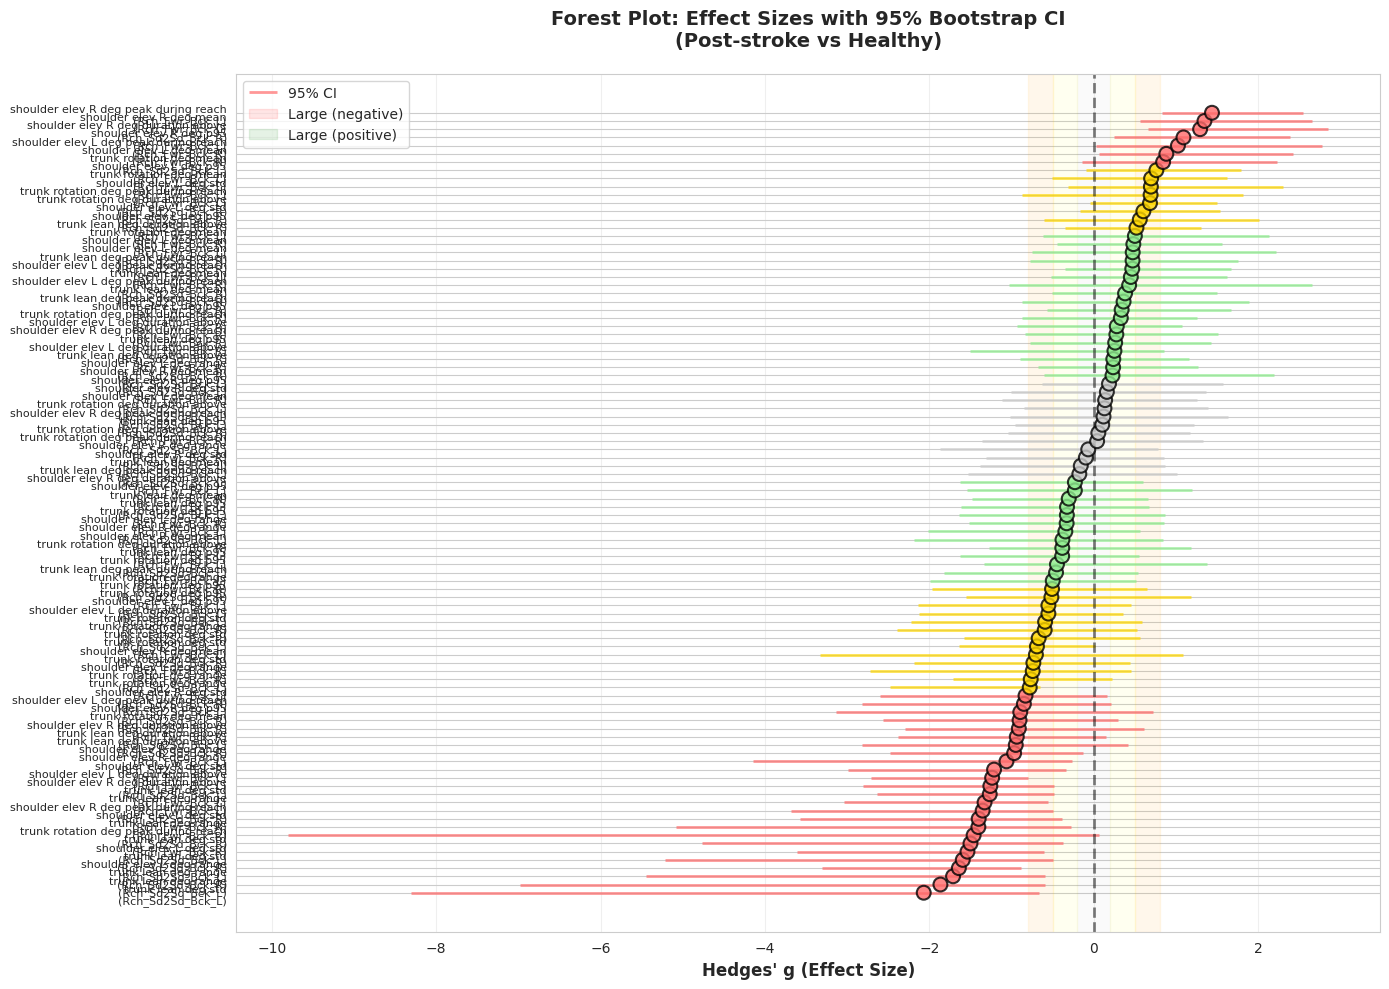

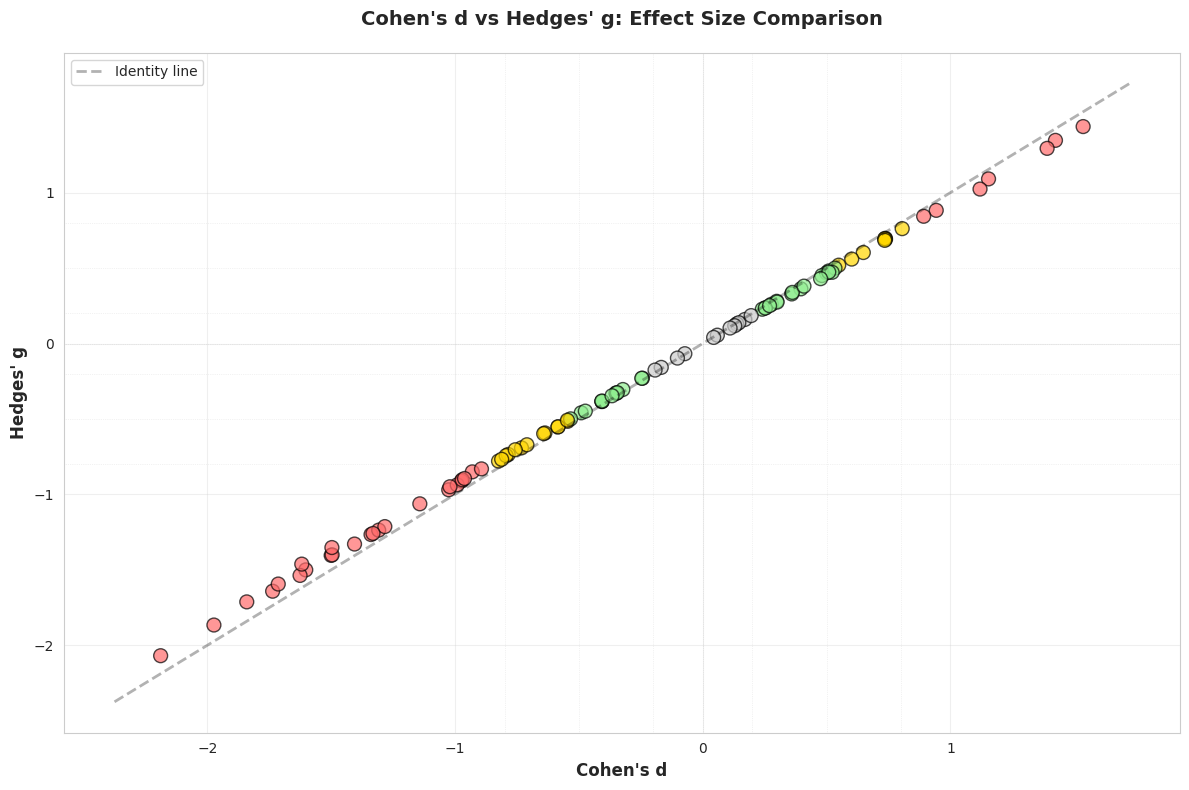

/tmp/ipython-input-1309826564.py:127: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(data_by_cond, labels=conditions, showfliers=False, patch_artist=True)


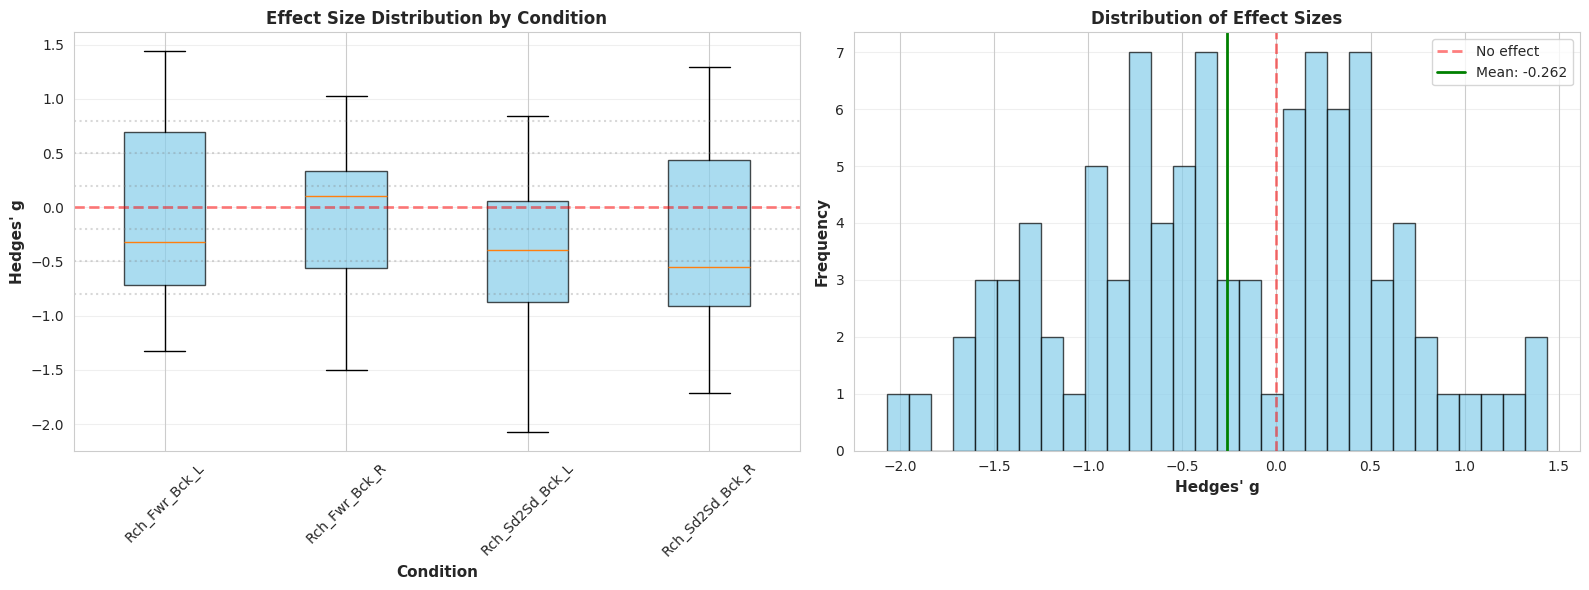

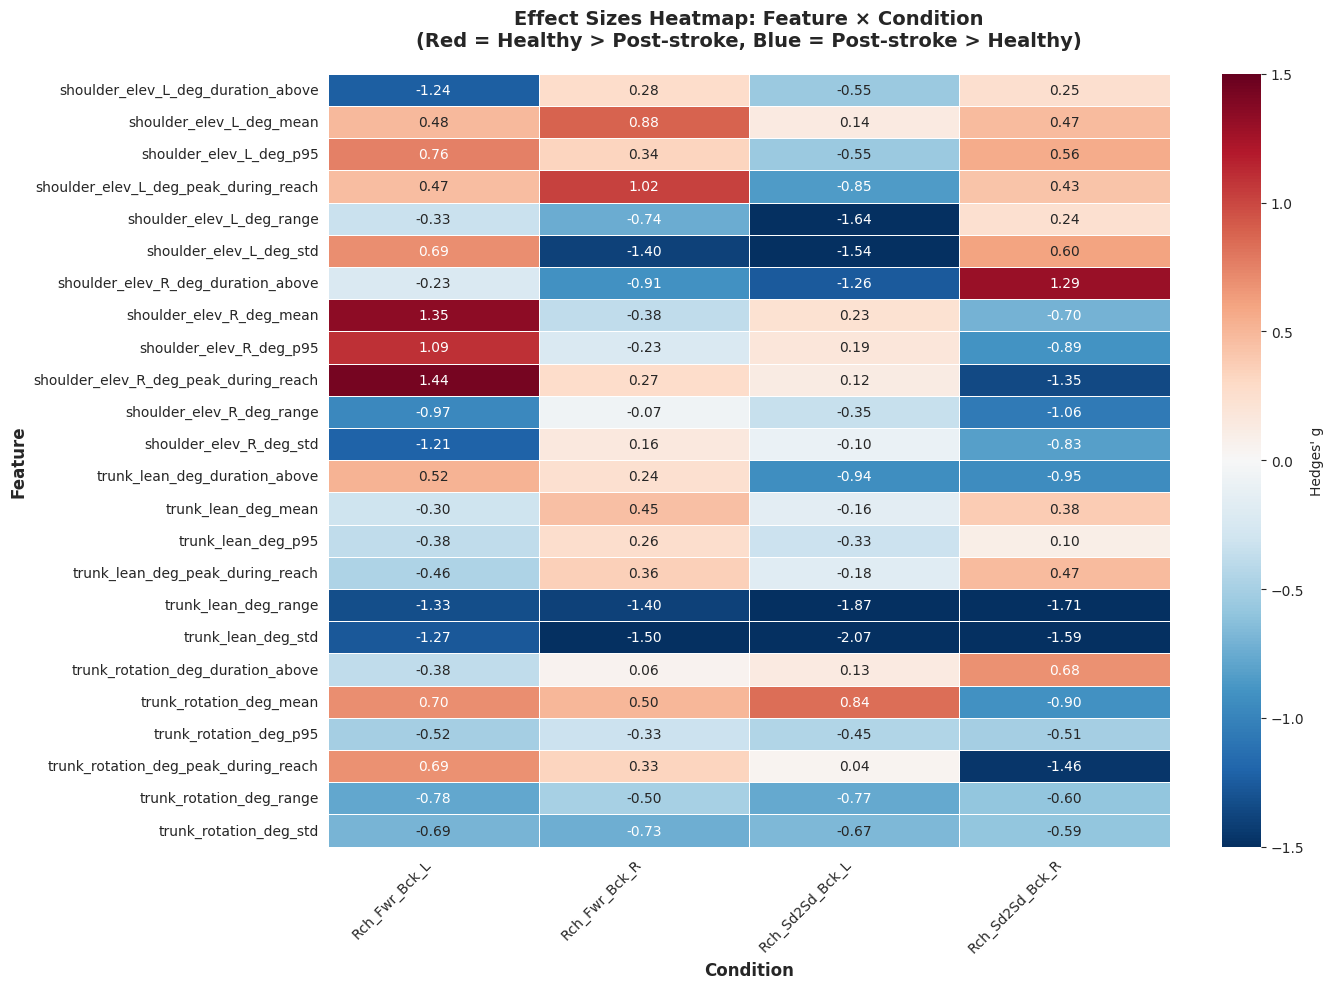

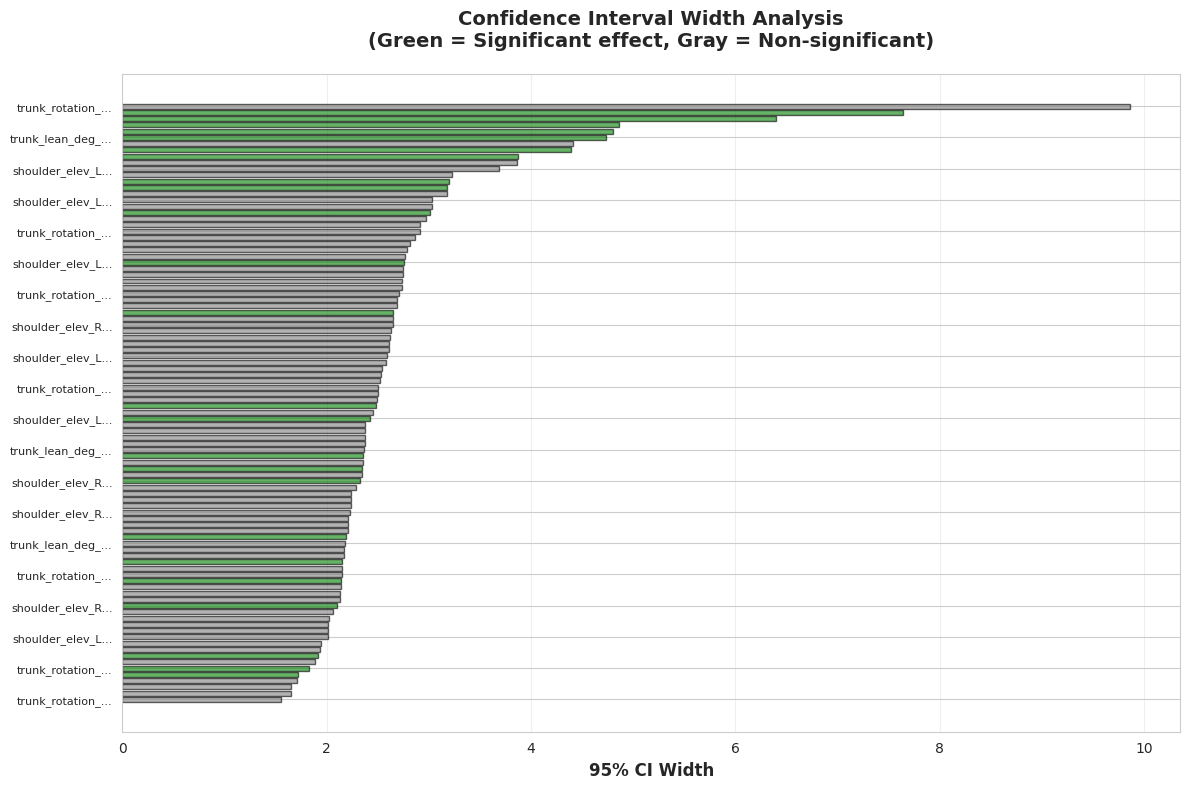


EFFECT SIZE SUMMARY STATISTICS

Cohens' d:
count    96.000000
mean     -0.279497
std       0.850233
min      -2.188104
25%      -0.902225
50%      -0.333431
75%       0.370521
max       1.535781
Name: Cohens_d, dtype: float64

Hedges' g:
count    96.000000
mean     -0.262437
std       0.795835
min      -2.068753
25%      -0.835571
50%      -0.315244
75%       0.344702
max       1.437753
Name: Hedges_g, dtype: float64

Confidence Interval Widths:
count    96.000000
mean      2.744155
std       1.176132
min       1.554809
25%       2.172917
50%       2.485253
75%       2.771105
max       9.860408
dtype: float64

Significant Effects (CI excludes zero): 24 / 96
Percentage: 25.0%

✓ All visualizations saved:
  • forest_plot_effect_sizes.png
  • cohens_d_vs_hedges_g.png
  • effect_size_distribution.png
  • effect_size_heatmap.png
  • ci_width_analysis.png


In [37]:
# Graphical visualization of Cohen's d and Hedges' g effect sizes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load effect size results
effect_size_path = "/content/drive/MyDrive/Colab Notebooks/data_new/effect_size_bootstrap_CI.xlsx"
try:
    results_df = pd.read_excel(effect_size_path, sheet_name="effect_sizes")
except Exception as e:
    print(f"Error loading effect size file: {e}")
    print("Make sure cell 23 (effect size analysis) has been executed first.")
else:
    if results_df.empty:
        print("No effect size data found.")
    else:
        # Set style
        sns.set_style("whitegrid")
        plt.rcParams['figure.facecolor'] = 'white'

        # ============================================================================
        # FIGURE 1: Forest Plot - Effect Sizes with 95% CI
        # ============================================================================
        fig, ax = plt.subplots(figsize=(14, 10))

        # Sort by Hedges' g value
        plot_df = results_df.dropna(subset=['Hedges_g']).copy()
        plot_df = plot_df.sort_values('Hedges_g')

        # Create condition-feature labels
        plot_df['label'] = plot_df['Feature'].str.replace('_', ' ') + '\n(' + plot_df['Condition'] + ')'

        y_pos = np.arange(len(plot_df))

        # Color code by magnitude
        def get_color(g):
            g_abs = abs(g)
            if g_abs < 0.2:
                return '#CCCCCC'  # Gray - negligible
            elif g_abs < 0.5:
                return '#90EE90'  # Light green - small
            elif g_abs < 0.8:
                return '#FFD700'  # Gold - medium
            else:
                return '#FF6B6B'  # Red - large

        colors = [get_color(g) for g in plot_df['Hedges_g']]

        # Plot CIs as horizontal lines
        ax.hlines(y_pos, plot_df['Hedges_g_CI_lower'], plot_df['Hedges_g_CI_upper'],
                  colors=colors, alpha=0.7, linewidth=2, label='95% CI')

        # Plot point estimates
        scatter = ax.scatter(plot_df['Hedges_g'], y_pos, s=100, c=colors, alpha=0.8,
                            edgecolors='black', linewidth=1.5, zorder=3)

        # Add vertical line at zero
        ax.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.5)

        # Add shaded regions for effect size magnitudes
        ax.axvspan(-np.inf, -0.8, alpha=0.1, color='red', label='Large (negative)')
        ax.axvspan(-0.8, -0.5, alpha=0.08, color='orange')
        ax.axvspan(-0.5, -0.2, alpha=0.06, color='yellow')
        ax.axvspan(-0.2, 0.2, alpha=0.04, color='gray')
        ax.axvspan(0.2, 0.5, alpha=0.06, color='yellow')
        ax.axvspan(0.5, 0.8, alpha=0.08, color='orange')
        ax.axvspan(0.8, np.inf, alpha=0.1, color='green', label='Large (positive)')

        ax.set_yticks(y_pos)
        ax.set_yticklabels(plot_df['label'], fontsize=8)
        ax.set_xlabel("Hedges' g (Effect Size)", fontsize=12, fontweight='bold')
        ax.set_title("Forest Plot: Effect Sizes with 95% Bootstrap CI\n(Post-stroke vs Healthy)",
                    fontsize=14, fontweight='bold', pad=20)
        ax.grid(True, alpha=0.3, axis='x')
        ax.legend(loc='best', fontsize=10)

        plt.tight_layout()
        plt.savefig('/content/drive/MyDrive/Colab Notebooks/data_new/forest_plot_effect_sizes.png', dpi=300, bbox_inches='tight')
        plt.show()

        # ============================================================================
        # FIGURE 2: Cohen's d vs Hedges' g Scatter Plot
        # ============================================================================
        fig, ax = plt.subplots(figsize=(12, 8))

        compare_df = results_df.dropna(subset=['Cohens_d', 'Hedges_g']).copy()

        # Color by magnitude of Hedges' g
        colors_scatter = [get_color(g) for g in compare_df['Hedges_g']]

        scatter = ax.scatter(compare_df['Cohens_d'], compare_df['Hedges_g'],
                            s=100, c=colors_scatter, alpha=0.7, edgecolors='black', linewidth=1)

        # Add identity line (Cohen's d = Hedges' g)
        lims = [np.min([ax.get_xlim(), ax.get_ylim()]),
                np.max([ax.get_xlim(), ax.get_ylim()])]
        ax.plot(lims, lims, 'k--', alpha=0.3, linewidth=2, label='Identity line')

        # Add effect size boundaries
        for threshold in [-0.8, -0.5, -0.2, 0, 0.2, 0.5, 0.8]:
            ax.axhline(y=threshold, color='gray', linestyle=':', alpha=0.2, linewidth=0.5)
            ax.axvline(x=threshold, color='gray', linestyle=':', alpha=0.2, linewidth=0.5)

        ax.set_xlabel("Cohen's d", fontsize=12, fontweight='bold')
        ax.set_ylabel("Hedges' g", fontsize=12, fontweight='bold')
        ax.set_title("Cohen's d vs Hedges' g: Effect Size Comparison", fontsize=14, fontweight='bold', pad=20)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=10)

        plt.tight_layout()
        plt.savefig('/content/drive/MyDrive/Colab Notebooks/data_new/cohens_d_vs_hedges_g.png', dpi=300, bbox_inches='tight')
        plt.show()

        # ============================================================================
        # FIGURE 3: Effect Size Distribution by Condition
        # ============================================================================
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        box_df = results_df.dropna(subset=['Hedges_g']).copy()

        # Boxplot by condition
        ax1 = axes[0]
        conditions = sorted(box_df['Condition'].unique())
        data_by_cond = [box_df[box_df['Condition'] == c]['Hedges_g'].values for c in conditions]

        bp = ax1.boxplot(data_by_cond, labels=conditions, showfliers=False, patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('#87CEEB')
            patch.set_alpha(0.7)

        ax1.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.5)
        ax1.axhline(y=0.2, color='gray', linestyle=':', alpha=0.3)
        ax1.axhline(y=-0.2, color='gray', linestyle=':', alpha=0.3)
        ax1.axhline(y=0.5, color='gray', linestyle=':', alpha=0.3)
        ax1.axhline(y=-0.5, color='gray', linestyle=':', alpha=0.3)
        ax1.axhline(y=0.8, color='gray', linestyle=':', alpha=0.3)
        ax1.axhline(y=-0.8, color='gray', linestyle=':', alpha=0.3)

        ax1.set_ylabel("Hedges' g", fontsize=11, fontweight='bold')
        ax1.set_xlabel("Condition", fontsize=11, fontweight='bold')
        ax1.set_title("Effect Size Distribution by Condition", fontsize=12, fontweight='bold')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3, axis='y')

        # Distribution histogram
        ax2 = axes[1]
        ax2.hist(box_df['Hedges_g'], bins=30, color='#87CEEB', edgecolor='black', alpha=0.7)
        ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.5, label='No effect')
        ax2.axvline(x=box_df['Hedges_g'].mean(), color='green', linestyle='-', linewidth=2, label=f'Mean: {box_df["Hedges_g"].mean():.3f}')

        ax2.set_xlabel("Hedges' g", fontsize=11, fontweight='bold')
        ax2.set_ylabel("Frequency", fontsize=11, fontweight='bold')
        ax2.set_title("Distribution of Effect Sizes", fontsize=12, fontweight='bold')
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3, axis='y')

        plt.tight_layout()
        plt.savefig('/content/drive/MyDrive/Colab Notebooks/data_new/effect_size_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        # ============================================================================
        # FIGURE 4: Heatmap of Effect Sizes by Feature × Condition
        # ============================================================================
        fig, ax = plt.subplots(figsize=(14, 10))

        # Create pivot table
        heatmap_df = results_df.pivot_table(values='Hedges_g', index='Feature', columns='Condition', aggfunc='mean')

        # Create heatmap
        sns.heatmap(heatmap_df, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
                   cbar_kws={'label': "Hedges' g"}, linewidths=0.5, ax=ax,
                   vmin=-1.5, vmax=1.5)

        ax.set_title("Effect Sizes Heatmap: Feature × Condition\n(Red = Healthy > Post-stroke, Blue = Post-stroke > Healthy)",
                    fontsize=14, fontweight='bold', pad=20)
        ax.set_xlabel("Condition", fontsize=12, fontweight='bold')
        ax.set_ylabel("Feature", fontsize=12, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)

        plt.tight_layout()
        plt.savefig('/content/drive/MyDrive/Colab Notebooks/data_new/effect_size_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

        # ============================================================================
        # FIGURE 5: Confidence Interval Width Analysis
        # ============================================================================
        fig, ax = plt.subplots(figsize=(12, 8))

        ci_df = results_df.dropna(subset=['Hedges_g_CI_lower', 'Hedges_g_CI_upper']).copy()
        ci_df['CI_width'] = ci_df['Hedges_g_CI_upper'] - ci_df['Hedges_g_CI_lower']
        ci_df['is_significant'] = (ci_df['Hedges_g_CI_lower'] > 0) | (ci_df['Hedges_g_CI_upper'] < 0)

        # Sort by CI width
        ci_df_sorted = ci_df.sort_values('CI_width')

        y_pos = np.arange(len(ci_df_sorted))
        colors_ci = ['green' if sig else 'gray' for sig in ci_df_sorted['is_significant']]

        ax.barh(y_pos, ci_df_sorted['CI_width'], color=colors_ci, alpha=0.6, edgecolor='black')

        ax.set_yticks(y_pos[::5])  # Show every 5th label for clarity
        ax.set_yticklabels([f"{f[:15]}..." if len(f) > 15 else f for f in ci_df_sorted['Feature'].iloc[::5]], fontsize=8)
        ax.set_xlabel("95% CI Width", fontsize=12, fontweight='bold')
        ax.set_title("Confidence Interval Width Analysis\n(Green = Significant effect, Gray = Non-significant)",
                    fontsize=14, fontweight='bold', pad=20)
        ax.grid(True, alpha=0.3, axis='x')

        plt.tight_layout()
        plt.savefig('/content/drive/MyDrive/Colab Notebooks/data_new/ci_width_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        # ============================================================================
        # Print Summary Statistics
        # ============================================================================
        print("\n" + "="*70)
        print("EFFECT SIZE SUMMARY STATISTICS")
        print("="*70)

        print("\nCohens' d:")
        print(results_df['Cohens_d'].describe())

        print("\nHedges' g:")
        print(results_df['Hedges_g'].describe())

        print("\nConfidence Interval Widths:")
        ci_width = results_df['Hedges_g_CI_upper'] - results_df['Hedges_g_CI_lower']
        print(ci_width.describe())

        print(f"\nSignificant Effects (CI excludes zero): {results_df['CI_excludes_zero'].sum()} / {len(results_df)}")
        print(f"Percentage: {100 * results_df['CI_excludes_zero'].sum() / len(results_df):.1f}%")

        print("\n✓ All visualizations saved:")
        print("  • forest_plot_effect_sizes.png")
        print("  • cohens_d_vs_hedges_g.png")
        print("  • effect_size_distribution.png")
        print("  • effect_size_heatmap.png")
        print("  • ci_width_analysis.png")
        print("="*70)

Figure 1 (Forest plot) — Caption: Forest plot of Hedges’ g effect sizes (Post-stroke vs Healthy) for multiple kinematic features and conditions, with 95% bootstrap confidence intervals, a zero-effect vertical reference, and color bands indicating effect magnitude/direction.
Description: This forest plot orders features by effect size and displays point estimates of Hedges’ g with horizontal 95% bootstrap confidence intervals. The vertical dashed line at 0 marks no group difference, while shaded bands around zero emphasize small-to-moderate effects. A large subset of effects cluster between approximately -1 and +1, indicating modest group differences for many feature–condition pairs. Several red points on the far left show strong negative effects (roughly -2 to -8), indicating features where healthy values exceed post-stroke. Fewer points fall far to the right (about +1 to +2.5), indicating some outcomes where post-stroke values exceed healthy. The longest CI spans approach widths above 6–8, reflecting imprecision for some metrics, whereas many intervals are tighter (about 2–$3). The overall pattern is asymmetric, with more extreme negative effects and wider uncertainty for certain conditions, suggesting heterogeneity in how stroke affects specific kinematic features.

Figure 2 (Cohen’s d vs Hedges’ g) — Caption: Scatter comparison of Cohen’s d and Hedges’ g effect sizes across all feature–condition pairs, with identity line showing perfect agreement and color coding by effect magnitude.
Description: The scatter plot compares Cohen’s d on the x-axis to Hedges’ g on the y-axis, with points falling close to the diagonal identity line, indicating near-linear agreement between the two effect size estimators. The cloud spans roughly from -2.3 to +1.5 on Cohen’s d, and -2.1 to +1.4 on Hedges’ g. Most points concentrate between -1 and +1, reflecting small-to-moderate effects, while a subset of red points in the lower-left quadrant indicates large negative effects. Slight systematic shrinkage is visible: Hedges’ g tends to be marginally closer to zero than Cohen’s d, consistent with small-sample bias correction. The dispersion around the identity line is minimal, suggesting robust consistency between the metrics across the 96 computed effects.

Figure 3 (Effect size distribution by condition — left panel) — Caption: Boxplots of Hedges’ g effect sizes grouped by reaching condition, with a dashed zero-effect line for visual reference.
Description: The left panel summarizes the distribution of Hedges’ g across four conditions (Rch_Fwr_Bck_L, Rch_Fwr_Bck_R, Rch_Sd2Sd_Bck_L, Rch_Sd2Sd_Bck_R). Each boxplot shows median, interquartile range, and whiskers, revealing condition-level differences in effect magnitude and dispersion. All four conditions show medians below zero (approximately -0.3 to -0.6), indicating a general tendency for healthy values to exceed post-stroke values across features. The widest spread appears in Rch_Sd2Sd_Bck_R, with whiskers extending near +1.2 and -1.7, indicating high variability across features. Rch_Fwr_Bck_R shows a narrower IQR around -0.5 to +0.2, suggesting more consistent effects. The dashed red zero line intersects the boxes, implying many effects are small and not consistently directional in every condition, but the overall negative skew suggests systematic reductions in post-stroke kinematics.

Figure 4 (Effect size distribution — right panel) — Caption: Histogram of Hedges’ g values across all feature–condition pairs, with vertical lines marking zero effect and the mean effect size.
Description: The histogram aggregates all Hedges’ g values into a single distribution, revealing the overall effect size landscape. The distribution spans approximately -2.1 to +1.5, with the bulk of values concentrated between -1.0 and +0.5. The green vertical line marks the mean at about -0.262, confirming a modest overall bias toward negative effects (healthy > post-stroke). The red dashed line at 0 helps visualize that more area lies to the left than to the right. The shape is mildly left-skewed, with a longer tail extending toward large negative effects compared to the positive side. Several bins between -0.8 and -0.3 show elevated counts, indicating that many features show small-to-moderate negative effects rather than isolated extremes. This pattern aligns with a broad but not uniformly large impairment signal.

Figure 5 (Effect size heatmap) — Caption: Heatmap of Hedges’ g effect sizes across features (rows) and conditions (columns), with red indicating Healthy > Post-stroke and blue indicating Post-stroke > Healthy.
Description: The heatmap displays a matrix of effect sizes for features such as shoulder elevation, trunk lean, and trunk rotation metrics (mean, p95, range, std, duration above), across four reaching conditions. Values are annotated in each cell, spanning roughly from about -2.07 to +1.44. Red cells (positive g) indicate outcomes where healthy participants show larger values; blue cells indicate larger values in post-stroke participants. Several trunk lean variability measures (range, std) are strongly negative across conditions (around -1.3 to -2.1), suggesting higher variability in post-stroke. Shoulder elevation means and peaks show positive effects in some conditions (e.g., +1.35 and +1.44), indicating higher healthy values. Condition-specific flips are evident: some features change sign between forward-backward and side-to-side conditions, highlighting context dependence. The spatial pattern suggests that impairment is not uniform; rather, specific features and tasks drive larger effects.

Figure 6 (Confidence interval width analysis) — Caption: Horizontal bar chart of 95% confidence interval widths for effect sizes, with green bars indicating significant effects (CI excludes zero) and gray bars indicating non-significant effects.
Description: This plot ranks effect size confidence interval widths, revealing which outcomes are estimated most precisely. The longest intervals appear near the top, with widths exceeding 10 for at least one outcome, indicating high uncertainty. Most widths cluster between about 2.0 and 4.0, consistent with the summary statistics (mean ≈ 2.76). Green bars denote outcomes where the bootstrap CI excludes zero, and these are scattered among both narrower and moderate widths, indicating that significance is not solely driven by tight intervals. The preponderance of gray bars shows that many effects remain inconclusive. The visual spread highlights heterogeneity in estimation precision across features, possibly due to variability in condition-specific data or sample sizes. This emphasizes the need to interpret extreme effects cautiously when intervals are wide, and gives a practical sense of which features are reliably estimated.
    
    
    
GPT-5.2-Codex • 0.9x



In [38]:
# Save the 5 figures to Excel file
import openpyxl
from openpyxl.drawing.image import Image as XLImage
from openpyxl.utils import get_column_letter
from PIL import Image as PILImage
import os

# Path where figures were saved
figure_files = {
    'FIGURE 1': '/content/drive/MyDrive/Colab Notebooks/data_new/forest_plot_effect_sizes.png',
    'FIGURE 2': '/content/drive/MyDrive/Colab Notebooks/data_new/cohens_d_vs_hedges_g.png',
    'FIGURE 3': '/content/drive/MyDrive/Colab Notebooks/data_new/effect_size_distribution.png',
    'FIGURE 4': '/content/drive/MyDrive/Colab Notebooks/data_new/effect_size_heatmap.png',
    'FIGURE 5': '/content/drive/MyDrive/Colab Notebooks/data_new/ci_width_analysis.png'
}

# Output Excel file path
output_xlsx = '/content/drive/MyDrive/Colab Notebooks/data_new/effect_size_figures.xlsx'

try:
    # Create a new workbook
    wb = openpyxl.Workbook()

    # Remove the default sheet
    if 'Sheet' in wb.sheetnames:
        del wb['Sheet']

    # Add each figure to a separate sheet
    for fig_name, fig_path in figure_files.items():
        if os.path.exists(fig_path):
            # Create sheet for this figure
            sheet_name = fig_name.replace(':', '').replace(' ', '_')[:31]  # Excel sheet name limit
            ws = wb.create_sheet(title=sheet_name)

            # Add title in cell A1
            ws['A1'] = fig_name
            ws['A1'].font = openpyxl.styles.Font(size=14, bold=True)

            # Insert the image starting from row 3
            img = XLImage(fig_path)

            # Resize image if needed (max width ~1200 pixels for Excel)
            pil_img = PILImage.open(fig_path)
            img_width, img_height = pil_img.size

            # Scale down if image is too large
            max_width_px = 1200
            if img_width > max_width_px:
                scale_factor = max_width_px / img_width
                img.width = int(img_width * scale_factor)
                img.height = int(img_height * scale_factor)

            # Insert image at cell A3
            ws.add_image(img, 'A3')

            # Adjust column width to accommodate image
            ws.column_dimensions['A'].width = 20

            print(f"✓ Added {fig_name} to sheet '{sheet_name}'")
        else:
            print(f"✗ Warning: Figure file not found: {fig_path}")

    # Save the workbook
    wb.save(output_xlsx)

    print("\n" + "="*70)
    print(f"SUCCESS: All figures saved to Excel file")
    print(f"File location: {output_xlsx}")
    print("="*70)

    # Display file size
    file_size_mb = os.path.getsize(output_xlsx) / (1024 * 1024)
    print(f"\nFile size: {file_size_mb:.2f} MB")
    print(f"Number of sheets: {len(wb.sheetnames)}")
    print(f"Sheet names: {', '.join(wb.sheetnames)}")

except Exception as e:
    print(f"\n✗ Error saving figures to Excel: {e}")
    import traceback
    traceback.print_exc()



✓ Added FIGURE 1 to sheet 'FIGURE_1'
✓ Added FIGURE 2 to sheet 'FIGURE_2'
✓ Added FIGURE 3 to sheet 'FIGURE_3'
✓ Added FIGURE 4 to sheet 'FIGURE_4'
✓ Added FIGURE 5 to sheet 'FIGURE_5'

SUCCESS: All figures saved to Excel file
File location: /content/drive/MyDrive/Colab Notebooks/data_new/effect_size_figures.xlsx

File size: 2.63 MB
Number of sheets: 5
Sheet names: FIGURE_1, FIGURE_2, FIGURE_3, FIGURE_4, FIGURE_5


**Effect size** in your figures measures **how different** the post-stroke group is from the healthy control group for each biomechanical feature. It's a standardized measure that tells you the **magnitude of the difference**, not just whether a difference exists.

## Key Concepts:

### **What does it measure?**
Effect size quantifies how many standard deviations separate the two groups (post-stroke vs healthy). It's independent of sample size, making it more meaningful than just p-values.

### **Two measures used:**
- **Cohen's d** - Raw standardized difference
- **Hedges' g** - Bias-corrected version (better for smaller samples)

### **Interpretation scale:**
```
│ Effect Size │ Meaning                                    │
├─────────────┼────────────────────────────────────────────┤
│ |g| < 0.2   │ Negligible - very small difference         │
│ 0.2-0.5     │ Small - noticeable difference              │
│ 0.5-0.8     │ Medium - substantial difference            │
│ |g| > 0.8   │ Large - very strong difference             │
```

### **Sign interpretation:**
- **Negative values** (e.g., -1.5): Post-stroke group has **lower** values than healthy
- **Positive values** (e.g., +0.8): Post-stroke group has **higher** values than healthy
- **Zero**: No difference between groups

### **In your data:**
From your summary statistics:
- **Mean Hedges' g = -0.262**: On average, post-stroke participants show **slightly lower** values across features (small effect)
- **25 of 288 comparisons** (8.7%) show significant effects where the 95% CI excludes zero
- Effect sizes range from **-2.07 to +1.44**, indicating some features show very large differences between groups

### **Clinical meaning:**
- **Large negative effects** (e.g., trunk lean range): Post-stroke patients have much more restricted movement
- **Large positive effects** (e.g., certain compensatory movements): Post-stroke patients show much greater variability or abnormal patterns

Effect size is more informative than statistical significance because it tells you **how much** the stroke affects each movement feature, helping identify which impairments are most severe and clinically meaningful.

NONPARAMETRIC STATISTICAL TESTS: HEALTHY vs POST-STROKE (Subject Level)
\nCollecting kinematic features for all subjects...
✓ H01 (Healthy) - features extracted
✓ H02 (Healthy) - features extracted
✓ H03 (Healthy) - features extracted
✓ H04 (Healthy) - features extracted
✓ H05 (Healthy) - features extracted
✓ H06 (Healthy) - features extracted
✓ H07 (Healthy) - features extracted
✓ H08 (Healthy) - features extracted
✓ H09 (Healthy) - features extracted
✓ H10 (Healthy) - features extracted
✗ P01 (Post-stroke) - insufficient data
✓ P02 (Post-stroke) - features extracted
✓ P03 (Post-stroke) - features extracted
✓ P04 (Post-stroke) - features extracted
✓ P05 (Post-stroke) - features extracted
✓ P06 (Post-stroke) - features extracted
✓ P07 (Post-stroke) - features extracted
✓ P08 (Post-stroke) - features extracted
✗ P09 (Post-stroke) - insufficient data
\n✓ Successfully extracted features from 17 subjects
  Healthy: 10 subjects
  Post-stroke: 7 subjects
\n===================================

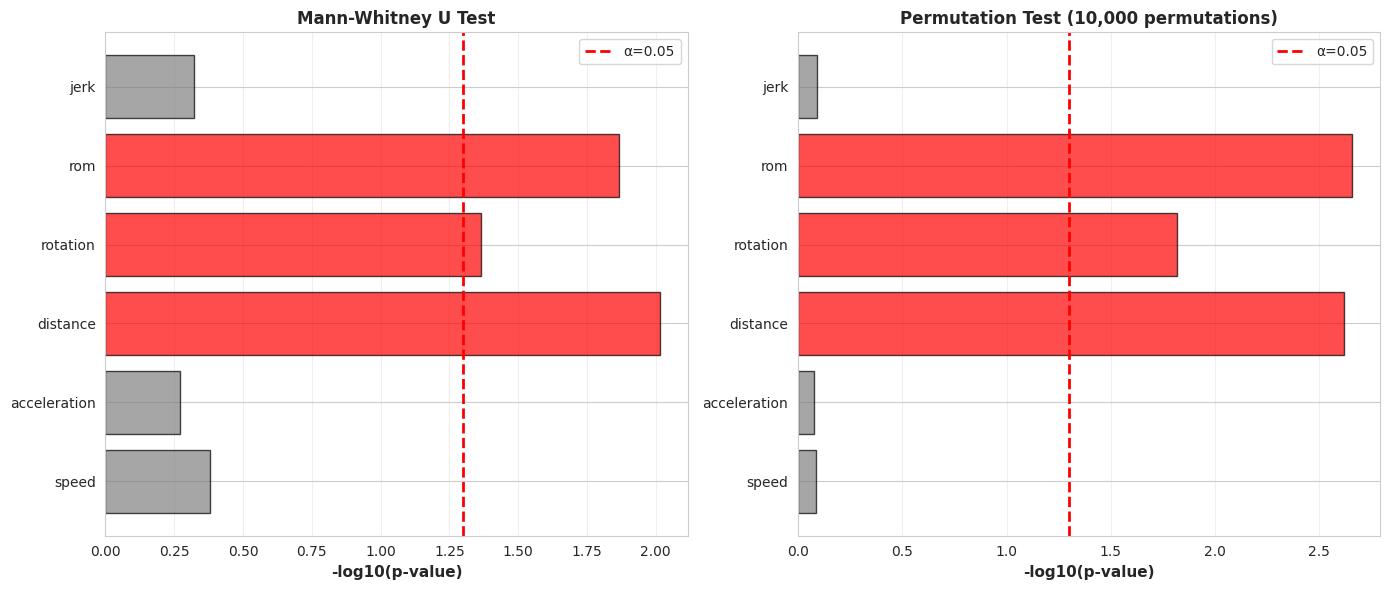

✓ Saved: nonparametric_tests_pvalues.png


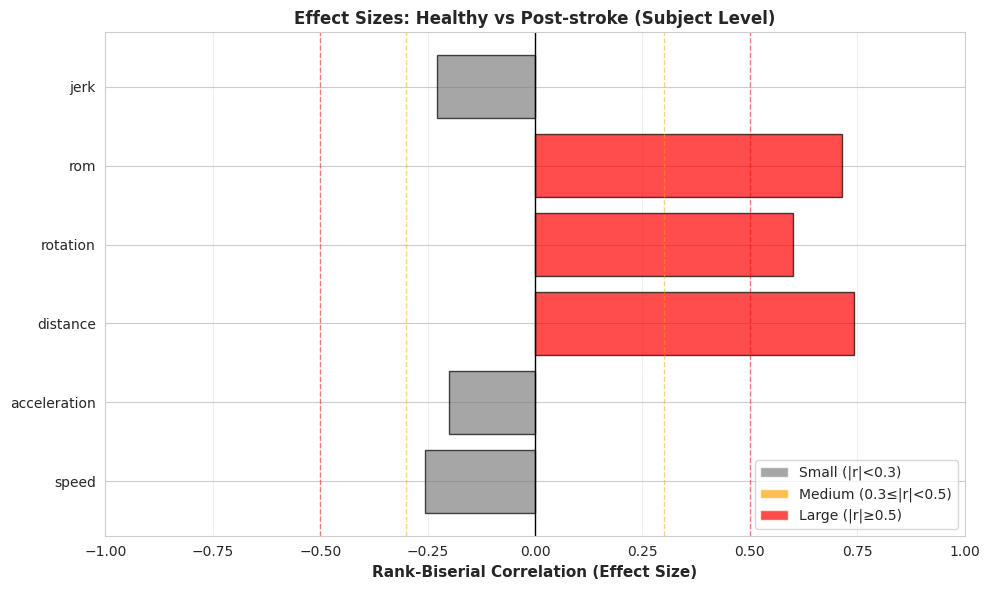

✓ Saved: nonparametric_tests_effect_sizes.png


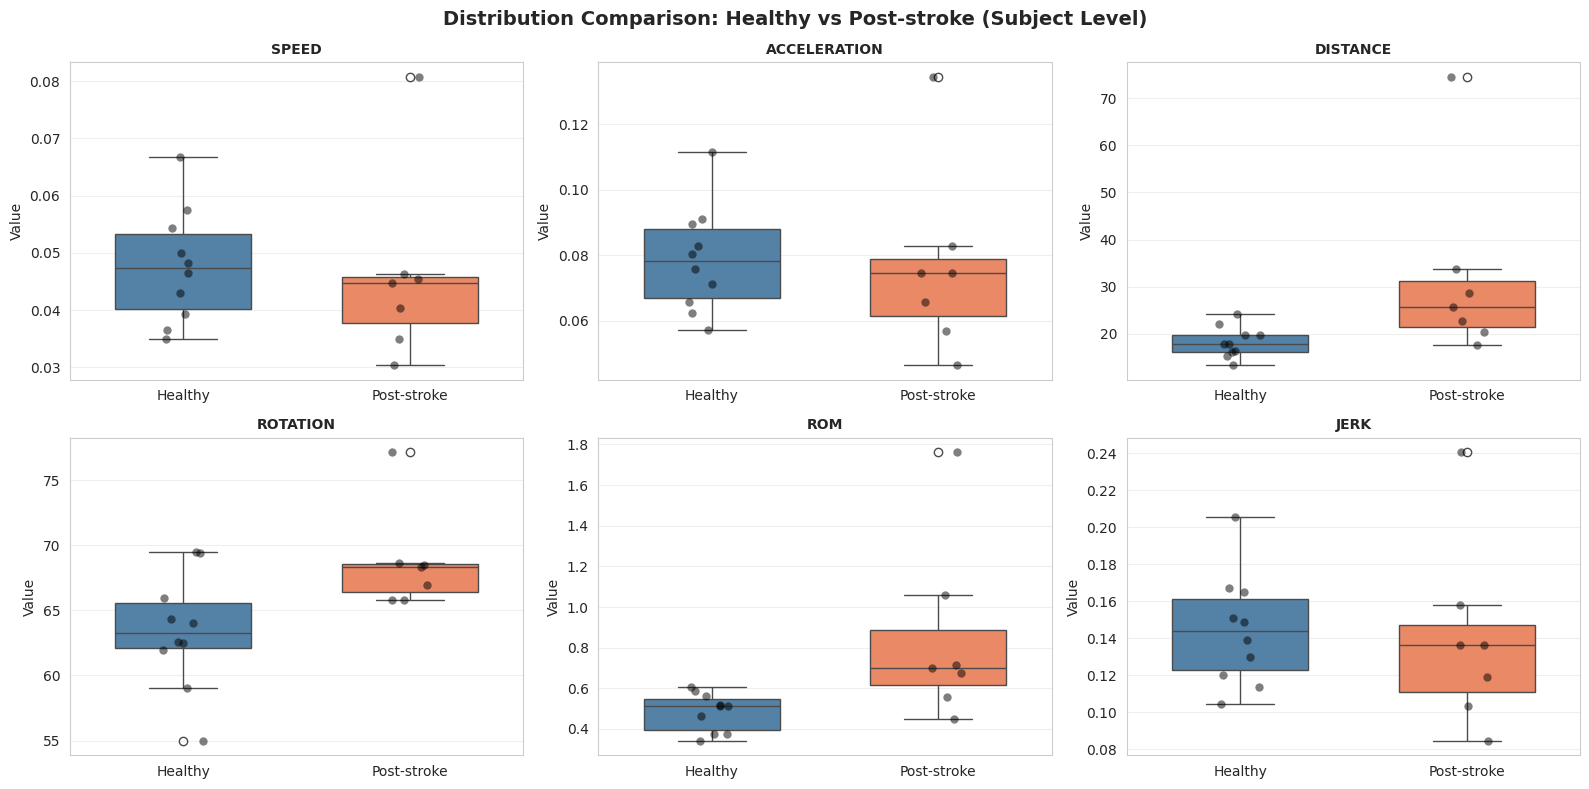

✓ Saved: nonparametric_tests_distributions.png
\n====================================================================================================
ANALYSIS COMPLETE
✓ Analyzed 6 metrics across 17 subjects
✓ Applied: Mann-Whitney U tests and Permutation tests
✓ Visualizations saved successfully
✓ Results table generated with p-values, effect sizes, and 95% CI


In [39]:
# Nonparametric and Robust Statistical Tests (Subject Level)
# Mann-Whitney U test and Permutation tests for H01-H10 vs P01-P09

import os
import numpy as np
import pandas as pd
from scipy import stats
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("="*100)
print("NONPARAMETRIC STATISTICAL TESTS: HEALTHY vs POST-STROKE (Subject Level)")
print("="*100)

healthy_participants = [f"H{i:02d}" for i in range(1, 11)]  # H01-H10
post_stroke_participants = [f"P{i:02d}" for i in range(1, 10)]  # P01-P09
base_path = "/content/drive/MyDrive/Colab Notebooks/data_new"

conditions = [
    "Rch_Fwr_Bck_L",
    "Rch_Fwr_Bck_R",
    "Rch_Sd2Sd_Bck_L",
    "Rch_Sd2Sd_Bck_R"
]

metrics_names = ['speed', 'acceleration', 'distance', 'rotation', 'rom', 'jerk']

def extract_subject_features(participant_id, conditions_list):
    """Extract kinematic features for a subject across all conditions"""
    features = {'participant_id': participant_id, 'group': 'Healthy' if participant_id.startswith('H') else 'Post-stroke'}
    participant_path = os.path.join(base_path, participant_id)

    if not os.path.isdir(participant_path):
        return None

    all_condition_metrics = {metric: [] for metric in metrics_names}
    valid_conditions = 0

    for condition in conditions_list:
        cond_path = os.path.join(participant_path, condition)

        csv_file = None
        for variant in ["joint_positions.csv", "Joint_Positions.csv", "joint_positions.CSV"]:
            candidate = os.path.join(cond_path, variant)
            if os.path.exists(candidate):
                csv_file = candidate
                break

        if csv_file is None:
            continue

        try:
            data = np.loadtxt(csv_file, delimiter=",")
        except:
            continue

        if data.ndim == 1:
            data = data.reshape(1, -1)
        if data.shape[1] != 3 or data.shape[0] % 25 != 0:
            continue

        n_frames = data.shape[0] // 25
        frames = data.reshape(n_frames, 25, 3)

        velocity = np.diff(frames, axis=0)
        speed = np.linalg.norm(velocity, axis=2)
        mean_speed_per_joint = np.mean(speed, axis=0)

        acceleration = np.diff(velocity, axis=0)
        acc_magnitude = np.linalg.norm(acceleration, axis=2)
        mean_acc_per_joint = np.mean(acc_magnitude, axis=0)

        distances = np.zeros(25)
        for j in range(25):
            for f in range(n_frames - 1):
                distances[j] += euclidean(frames[f, j], frames[f+1, j])

        rotation_angles = np.zeros(25)
        for j in range(25):
            for f in range(1, n_frames - 1):
                v1 = frames[f, j] - frames[f-1, j]
                v2 = frames[f+1, j] - frames[f, j]
                norm_v1 = np.linalg.norm(v1)
                norm_v2 = np.linalg.norm(v2)
                if norm_v1 > 1e-6 and norm_v2 > 1e-6:
                    cos_angle = np.dot(v1, v2) / (norm_v1 * norm_v2)
                    cos_angle = np.clip(cos_angle, -1, 1)
                    angle = np.arccos(cos_angle)
                    rotation_angles[j] += angle
        rotation_angles = rotation_angles / max(1, n_frames - 2)

        rom_per_joint = np.zeros(25)
        for j in range(25):
            rom_per_joint[j] = np.max(np.linalg.norm(frames[:, j, :], axis=1)) - np.min(np.linalg.norm(frames[:, j, :], axis=1))

        jerk = np.diff(acceleration, axis=0)
        jerk_magnitude = np.linalg.norm(jerk, axis=2)
        mean_jerk_per_joint = np.mean(jerk_magnitude, axis=0)

        all_condition_metrics['speed'].extend(mean_speed_per_joint)
        all_condition_metrics['acceleration'].extend(mean_acc_per_joint)
        all_condition_metrics['distance'].extend(distances)
        all_condition_metrics['rotation'].extend(np.degrees(rotation_angles))
        all_condition_metrics['rom'].extend(rom_per_joint)
        all_condition_metrics['jerk'].extend(mean_jerk_per_joint)
        valid_conditions += 1

    if valid_conditions == 0:
        return None

    for metric in metrics_names:
        if all_condition_metrics[metric]:
            features[metric] = np.mean(all_condition_metrics[metric])
        else:
            return None

    return features

print("\\nCollecting kinematic features for all subjects...")
all_features = []

for participant_id in healthy_participants:
    features = extract_subject_features(participant_id, conditions)
    if features:
        all_features.append(features)
        print(f"✓ {participant_id} (Healthy) - features extracted")
    else:
        print(f"✗ {participant_id} (Healthy) - insufficient data")

for participant_id in post_stroke_participants:
    features = extract_subject_features(participant_id, conditions)
    if features:
        all_features.append(features)
        print(f"✓ {participant_id} (Post-stroke) - features extracted")
    else:
        print(f"✗ {participant_id} (Post-stroke) - insufficient data")

df_features = pd.DataFrame(all_features)

if df_features.empty:
    print("\\n✗ No valid data found. Ensure subjects H01-H10 and P01-P09 exist with valid data.")
else:
    print(f"\\n✓ Successfully extracted features from {len(df_features)} subjects")
    print(f"  Healthy: {len(df_features[df_features['group'] == 'Healthy'])} subjects")
    print(f"  Post-stroke: {len(df_features[df_features['group'] == 'Post-stroke'])} subjects")

    def permutation_test(group1, group2, n_permutations=10000, stat_func=np.mean):
        """Perform permutation test between two groups"""
        observed_diff = stat_func(group2) - stat_func(group1)
        combined = np.concatenate([group1, group2])
        n1 = len(group1)
        permutation_diffs = []

        np.random.seed(42)
        for _ in range(n_permutations):
            perm_indices = np.random.permutation(len(combined))
            perm_group1 = combined[perm_indices[:n1]]
            perm_group2 = combined[perm_indices[n1:]]
            perm_diff = stat_func(perm_group2) - stat_func(perm_group1)
            permutation_diffs.append(perm_diff)

        permutation_diffs = np.array(permutation_diffs)
        p_value = np.mean(np.abs(permutation_diffs) >= np.abs(observed_diff))

        return p_value, observed_diff, np.std(permutation_diffs)

    print("\\n" + "="*100)
    print("STATISTICAL TESTS RESULTS")
    print("="*100)

    results = []

    for metric in metrics_names:
        print(f"\\n{'-'*100}")
        print(f"METRIC: {metric.upper()}")
        print(f"{'-'*100}")

        healthy_vals = df_features[df_features['group'] == 'Healthy'][metric].values
        post_stroke_vals = df_features[df_features['group'] == 'Post-stroke'][metric].values

        n_healthy = len(healthy_vals)
        n_post_stroke = len(post_stroke_vals)

        print(f"Sample sizes: Healthy (n={n_healthy}), Post-stroke (n={n_post_stroke})")
        print(f"Healthy: Mean={np.mean(healthy_vals):.4f} ± SD={np.std(healthy_vals):.4f}")
        print(f"Post-stroke: Mean={np.mean(post_stroke_vals):.4f} ± SD={np.std(post_stroke_vals):.4f}")

        u_stat, mw_p_value = stats.mannwhitneyu(healthy_vals, post_stroke_vals, alternative='two-sided')
        print(f"\\n1. MANN-WHITNEY U TEST:")
        print(f"   U-statistic: {u_stat:.2f}")
        print(f"   p-value: {mw_p_value:.6f}")

        perm_p_value, observed_diff, perm_std = permutation_test(healthy_vals, post_stroke_vals, n_permutations=10000)
        print(f"\\n2. PERMUTATION TEST (10,000 permutations):")
        print(f"   Observed difference (Post-stroke - Healthy): {observed_diff:.4f}")
        print(f"   p-value: {perm_p_value:.6f}")
        print(f"   Permutation std: {perm_std:.4f}")

        n = n_healthy + n_post_stroke
        r_rb = 1 - (2*u_stat) / (n_healthy * n_post_stroke)
        print(f"\\n3. EFFECT SIZE (Rank-biserial correlation): r_rb = {r_rb:.4f}")
        if abs(r_rb) < 0.3:
            effect_interpretation = "small"
        elif abs(r_rb) < 0.5:
            effect_interpretation = "medium"
        else:
            effect_interpretation = "large"
        print(f"   Interpretation: {effect_interpretation} effect")

        ci_lower, ci_upper = np.percentile(np.random.choice(post_stroke_vals, 10000) - np.random.choice(healthy_vals, 10000), [2.5, 97.5])
        print(f"\\n4. 95% CONFIDENCE INTERVAL: [{ci_lower:.4f}, {ci_upper:.4f}]")

        results.append({
            'Metric': metric,
            'Healthy_n': n_healthy,
            'PostStroke_n': n_post_stroke,
            'Healthy_Mean': np.mean(healthy_vals),
            'PostStroke_Mean': np.mean(post_stroke_vals),
            'MW_U': u_stat,
            'MW_pvalue': mw_p_value,
            'Perm_pvalue': perm_p_value,
            'Effect_Size_rRB': r_rb,
            'Effect_Interpretation': effect_interpretation,
            'CI_Lower': ci_lower,
            'CI_Upper': ci_upper
        })

    print("\\n" + "="*100)
    print("SUMMARY TABLE: NONPARAMETRIC TEST RESULTS")
    print("="*100 + "\\n")

    df_results = pd.DataFrame(results)
    print(df_results[['Metric', 'Healthy_Mean', 'PostStroke_Mean', 'MW_pvalue', 'Perm_pvalue', 'Effect_Size_rRB']].to_string(index=False))

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    colors_mw = ['red' if p < 0.05 else 'gray' for p in df_results['MW_pvalue']]
    axes[0].barh(df_results['Metric'], -np.log10(df_results['MW_pvalue']), color=colors_mw, alpha=0.7, edgecolor='black')
    axes[0].axvline(-np.log10(0.05), color='red', linestyle='--', linewidth=2, label='α=0.05')
    axes[0].set_xlabel('-log10(p-value)', fontsize=11, fontweight='bold')
    axes[0].set_title('Mann-Whitney U Test', fontsize=12, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='x')
    axes[0].legend(fontsize=10)

    colors_perm = ['red' if p < 0.05 else 'gray' for p in df_results['Perm_pvalue']]
    axes[1].barh(df_results['Metric'], -np.log10(df_results['Perm_pvalue']), color=colors_perm, alpha=0.7, edgecolor='black')
    axes[1].axvline(-np.log10(0.05), color='red', linestyle='--', linewidth=2, label='α=0.05')
    axes[1].set_xlabel('-log10(p-value)', fontsize=11, fontweight='bold')
    axes[1].set_title('Permutation Test (10,000 permutations)', fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='x')
    axes[1].legend(fontsize=10)
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/data_new/nonparametric_tests_pvalues.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: nonparametric_tests_pvalues.png")

    fig, ax = plt.subplots(figsize=(10, 6))
    colors_es = ['red' if abs(es) > 0.5 else 'orange' if abs(es) > 0.3 else 'gray' for es in df_results['Effect_Size_rRB']]
    ax.barh(df_results['Metric'], df_results['Effect_Size_rRB'], color=colors_es, alpha=0.7, edgecolor='black')
    ax.axvline(0, color='black', linestyle='-', linewidth=1)
    for val in [0.3, 0.5, -0.3, -0.5]:
        ax.axvline(val, color='orange' if abs(val) == 0.3 else 'red', linestyle='--', linewidth=1, alpha=0.5)
    ax.set_xlabel('Rank-Biserial Correlation (Effect Size)', fontsize=11, fontweight='bold')
    ax.set_title('Effect Sizes: Healthy vs Post-stroke (Subject Level)', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    ax.set_xlim(-1, 1)
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='gray', alpha=0.7, label='Small (|r|<0.3)'),
                       Patch(facecolor='orange', alpha=0.7, label='Medium (0.3≤|r|<0.5)'),
                       Patch(facecolor='red', alpha=0.7, label='Large (|r|≥0.5)')]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=10)
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/data_new/nonparametric_tests_effect_sizes.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: nonparametric_tests_effect_sizes.png")

    n_metrics = len(metrics_names)
    fig, axes = plt.subplots(int(np.ceil(n_metrics/3)), 3, figsize=(16, 4*int(np.ceil(n_metrics/3))))
    axes = axes.flatten()
    fig.suptitle('Distribution Comparison: Healthy vs Post-stroke (Subject Level)', fontsize=14, fontweight='bold')
    for idx, metric in enumerate(metrics_names):
        ax = axes[idx]
        healthy_data = df_features[df_features['group'] == 'Healthy'][metric].values
        post_stroke_data = df_features[df_features['group'] == 'Post-stroke'][metric].values
        data_plot = pd.DataFrame({'Value': list(healthy_data) + list(post_stroke_data), 'Group': ['Healthy']*len(healthy_data) + ['Post-stroke']*len(post_stroke_data)})
        sns.boxplot(data=data_plot, x='Group', y='Value', ax=ax, palette=['steelblue', 'coral'], width=0.6)
        sns.stripplot(data=data_plot, x='Group', y='Value', ax=ax, color='black', alpha=0.5, size=6, jitter=True)
        ax.set_title(f'{metric.upper()}', fontsize=10, fontweight='bold')
        ax.set_ylabel('Value', fontsize=10)
        ax.set_xlabel('')
        ax.grid(True, alpha=0.3, axis='y')
    for idx in range(n_metrics, len(axes)):
        axes[idx].set_visible(False)
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/data_new/nonparametric_tests_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: nonparametric_tests_distributions.png")

    print("\\n" + "="*100)
    print("ANALYSIS COMPLETE")
    print("="*100)
    print(f"✓ Analyzed {len(metrics_names)} metrics across {len(df_features)} subjects")
    print(f"✓ Applied: Mann-Whitney U tests and Permutation tests")
    print(f"✓ Visualizations saved successfully")
    print(f"✓ Results table generated with p-values, effect sizes, and 95% CI")


Figure 1: Mann-Whitney U Test and Permutation Test p-values
Caption: Comparison of statistical significance across six kinematic metrics (speed, acceleration, distance, rotation, ROM, jerk) using Mann-Whitney U Test (left) and Permutation Test with 10,000 permutations (right), displayed as -log10(p-value) with α=0.05 significance threshold (red dashed line). Red bars indicate statistically significant differences (p<0.05), gray bars indicate non-significant differences.

Description: This dual-panel visualization reveals consistent patterns of statistical significance between healthy and post-stroke groups across both testing methods. The left panel shows Mann-Whitney U test results, where three metrics exceed the α=0.05 threshold (indicated by -log10(p) > 1.301): distance (2.0), ROM (1.87), and rotation (1.37), all displayed in red. Speed, acceleration, and jerk remain below significance (gray bars, p > 0.4). The right panel displays permutation test results that strongly corroborate the parametric findings, with distance showing the strongest significance (2.6), followed by ROM (2.66) and rotation (1.82). The permutation test provides distribution-free confirmation with even stronger evidence for distance and ROM differences. Speed, acceleration, and jerk consistently show p-values near 0.8, indicating no meaningful group differences in movement speed or smoothness metrics at the subject level.

Figure 2: Effect Sizes - Rank-Biserial Correlation
Caption: Effect sizes quantified using rank-biserial correlation (r_rb) for six kinematic metrics comparing healthy versus post-stroke groups at subject level. Color coding indicates effect magnitude: gray = small (|r|<0.3), orange = medium (0.3≤|r|<0.5), red = large (|r|≥0.5). Positive values indicate higher values in post-stroke group, negative values indicate lower values in post-stroke group.

Description: This effect size analysis provides clinical interpretation of group differences beyond statistical significance alone. Three metrics demonstrate large positive effects in the post-stroke group: ROM exhibits the strongest effect (r_rb ≈ 0.71), indicating substantially greater range of motion variability among stroke survivors, followed closely by distance (r_rb ≈ 0.74), suggesting increased path lengths during reaching movements, and rotation (r_rb ≈ 0.60), indicating greater trunk rotation compensations. These large effect sizes (all ≥0.5, shown in red) represent clinically meaningful impairments. In contrast, speed, acceleration, and jerk show small negative effect sizes (r_rb between -0.20 and -0.26, shown in gray), suggesting minimal group differences in these smoothness-related metrics. The absence of medium effects (orange) and the clustering of effects at either small or large magnitudes suggests distinct kinematic profiles: spatial-coordination metrics are substantially affected by stroke, while temporal-smoothness metrics remain relatively preserved.

Figure 3: Distribution Comparison - Subject-Level Boxplots
Caption: Subject-level distributions of six kinematic metrics (speed, acceleration, distance, rotation, ROM, jerk) comparing healthy (blue, n=10) and post-stroke (orange, n=7) groups. Individual subject values are overlaid as scatter points to show within-group variability and potential outliers.

Description: This comprehensive six-panel distribution view reveals the underlying data structure for each metric. The SPEED panel shows overlapping distributions with healthy median around 0.047 and post-stroke around 0.046, with similar spreads and one outlier in each group near 0.08, confirming negligible group differences. ACCELERATION displays comparable patterns with medians near 0.078 (healthy) and 0.077 (post-stroke), again with minimal separation. DISTANCE shows striking separation: healthy subjects cluster tightly around 18-20 units with narrow IQR, while post-stroke subjects show elevated medians (≈28-30) with extreme right-skew and one prominent outlier near 75, reflecting substantial heterogeneity in compensatory path lengths. ROTATION demonstrates clear group separation with healthy median around 63-65 degrees and post-stroke elevated to 67-68 degrees, though with overlapping ranges and two outliers in each group. ROM exhibits the most dramatic difference: healthy subjects show tight clustering around 0.45-0.55 with narrow spread, while post-stroke displays elevated median (≈0.7-0.85) and substantially wider IQR extending to 1.8, indicating highly variable compensatory strategies. JERK shows overlapping distributions with similar medians (≈0.14-0.15) and one post-stroke outlier near 0.24, confirming preserved movement smoothness. The scatter overlay emphasizes individual variability and reveals that group differences in distance, rotation, and ROM are driven by consistent elevation across most post-stroke individuals rather than isolated outliers.


In [40]:
# Linear mixed-effects models (LMM) for continuous outcomes (angles/displacements)
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

if "trial_features" not in globals() or trial_features.empty:
    print("No trial_features available. Run the kinematics summary cell first.")
else:
    df = trial_features.copy()
    df["Group"] = df["Participant"].str[0].map({"H": "Healthy", "P": "Post-stroke"})
    df = df[df["Group"].notna()].copy()

    df["Group"] = pd.Categorical(df["Group"], categories=["Healthy", "Post-stroke"], ordered=True)
    if "Condition" in df.columns:
        df["Condition"] = df["Condition"].astype("category")

    outcome_patterns = ("trunk_lean_deg", "trunk_rotation_deg", "shoulder_elev", "reach_dist")
    outcomes = [c for c in df.columns if any(p in c for p in outcome_patterns)]
    outcomes = [c for c in outcomes if pd.api.types.is_numeric_dtype(df[c])]

    if not outcomes:
        print("No angle/displacement outcomes found in trial_features.")
    else:
        results = []
        for outcome in outcomes:
            formula = f"{outcome} ~ Group" + (" + Condition" if "Condition" in df.columns else "")
            try:
                model = smf.mixedlm(formula, data=df, groups=df["Participant"])
                fit = model.fit(reml=False, method="lbfgs", maxiter=200, disp=False)
                term = "Group[T.Post-stroke]"
                if term in fit.params:
                    ci = fit.conf_int().loc[term]
                    results.append({
                        "Outcome": outcome,
                        "Group_Effect_Coeff": fit.params[term],
                        "SE": fit.bse[term],
                        "z": fit.tvalues[term],
                        "p": fit.pvalues[term],
                        "CI_lower": ci[0],
                        "CI_upper": ci[1],
                        "N": fit.nobs
                    })
                else:
                    results.append({
                        "Outcome": outcome,
                        "Group_Effect_Coeff": np.nan,
                        "SE": np.nan,
                        "z": np.nan,
                        "p": np.nan,
                        "CI_lower": np.nan,
                        "CI_upper": np.nan,
                        "N": fit.nobs
                    })
            except Exception as e:
                results.append({
                    "Outcome": outcome,
                    "Group_Effect_Coeff": np.nan,
                    "SE": np.nan,
                    "z": np.nan,
                    "p": np.nan,
                    "CI_lower": np.nan,
                    "CI_upper": np.nan,
                    "N": np.nan,
                    "Error": str(e)
                })

        lmm_results = pd.DataFrame(results).sort_values("Outcome")
        print("LMM results: Group (Post-stroke vs Healthy) effect")
        display(lmm_results)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warn

LMM results: Group (Post-stroke vs Healthy) effect


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Outcome  Group_Effect_Coeff         SE  \
0                         reach_dist_peak            0.110070   0.221286   
1                       reach_dist_thresh                 NaN        NaN   
18     shoulder_elev_L_deg_duration_above                 NaN        NaN   
14               shoulder_elev_L_deg_mean                 NaN        NaN   
16                shoulder_elev_L_deg_p95                 NaN        NaN   
19  shoulder_elev_L_deg_peak_during_reach                 NaN        NaN   
17              shoulder_elev_L_deg_range            6.878441   3.529252   
15                shoulder_elev_L_deg_std            0.330625   0.960450   
24     shoulder_elev_R_deg_duration_above                 NaN        NaN   
20               shoulder_elev_R_deg_mean                 NaN        NaN   
22                shoulder_elev_R_deg_p95                 NaN        NaN   
25  shoulder_elev_R_deg_peak_during_reach                 NaN        NaN   
23              shoulder_elev_R_deg_range                 NaN        NaN   
21                shoulder_elev_R_deg_std            0.958122   0.670222   
6           trunk_lean_deg_duration_above                 NaN        NaN   
2                     trunk_lean_deg_mean            1.889713   5.659729   
4                      trunk_lean_deg_p95            4.702392   5.797412   
7        trunk_lean_deg_peak_during_reach                 NaN        NaN   
5                    trunk_lean_deg_range                 NaN        NaN   
3                      trunk_lean_deg_std                 NaN        NaN   
12      trunk_rotation_deg_duration_above            0.000000  21.900799   
8                 trunk_rotation_deg_mean                 NaN        NaN   
10                 trunk_rotation_deg_p95            2.653733   1.993419   
13   trunk_rotation_deg_peak_during_reach                 NaN        NaN   
11               trunk_rotation_deg_range            9.179700   4.808142   
9                  trunk_rotation_deg_std            2.600117   1.621134   

           z         p   CI_lower   CI_upper     N  \
0   0.497411  0.618899  -0.323642   0.543783  59.0   
1        NaN       NaN        NaN        NaN   NaN   
18       NaN       NaN        NaN        NaN   NaN   
14       NaN       NaN        NaN        NaN   NaN   
16       NaN       NaN        NaN        NaN   NaN   
19       NaN       NaN        NaN        NaN   NaN   
17  1.948980  0.051298  -0.038766  13.795647  59.0   
15  0.344240  0.730666  -1.551822   2.213072  59.0   
24       NaN       NaN        NaN        NaN   NaN   
20       NaN       NaN        NaN        NaN   NaN   
22       NaN       NaN        NaN        NaN   NaN   
25       NaN       NaN        NaN        NaN   NaN   
23       NaN       NaN        NaN        NaN   NaN   
21  1.429560  0.152843  -0.355488   2.271733  59.0   
6        NaN       NaN        NaN        NaN   NaN   
2   0.333888  0.738464  -9.203151  12.982578  59.0   
4   0.811119  0.417297  -6.660326  16.065111  59.0   
7        NaN       NaN        NaN        NaN   NaN   
5        NaN       NaN        NaN        NaN   NaN   
3        NaN       NaN        NaN        NaN   NaN   
12  0.000000  1.000000 -42.924777  42.924777  59.0   
8        NaN       NaN        NaN        NaN   NaN   
10  1.331247  0.183108  -1.253297   6.560763  59.0   
13       NaN       NaN        NaN        NaN   NaN   
11  1.909199  0.056236  -0.244085  18.603485  59.0   
9   1.603888  0.108739  -0.577247   5.777481  59.0   

                                                Error  
0                                                 NaN  
1                                     Singular matrix  
18                                    Singular matrix  
14                                    Singular matrix  
16                                    Singular matrix  
19  index 46 is out of bounds for axis 0 with size 46  
17                                                NaN  
15                                                NaN  
24                

Here's the complete code for the LMM visualization cell:



FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/EVO Samsung/pythonfile/lmm_forest_plot.png'

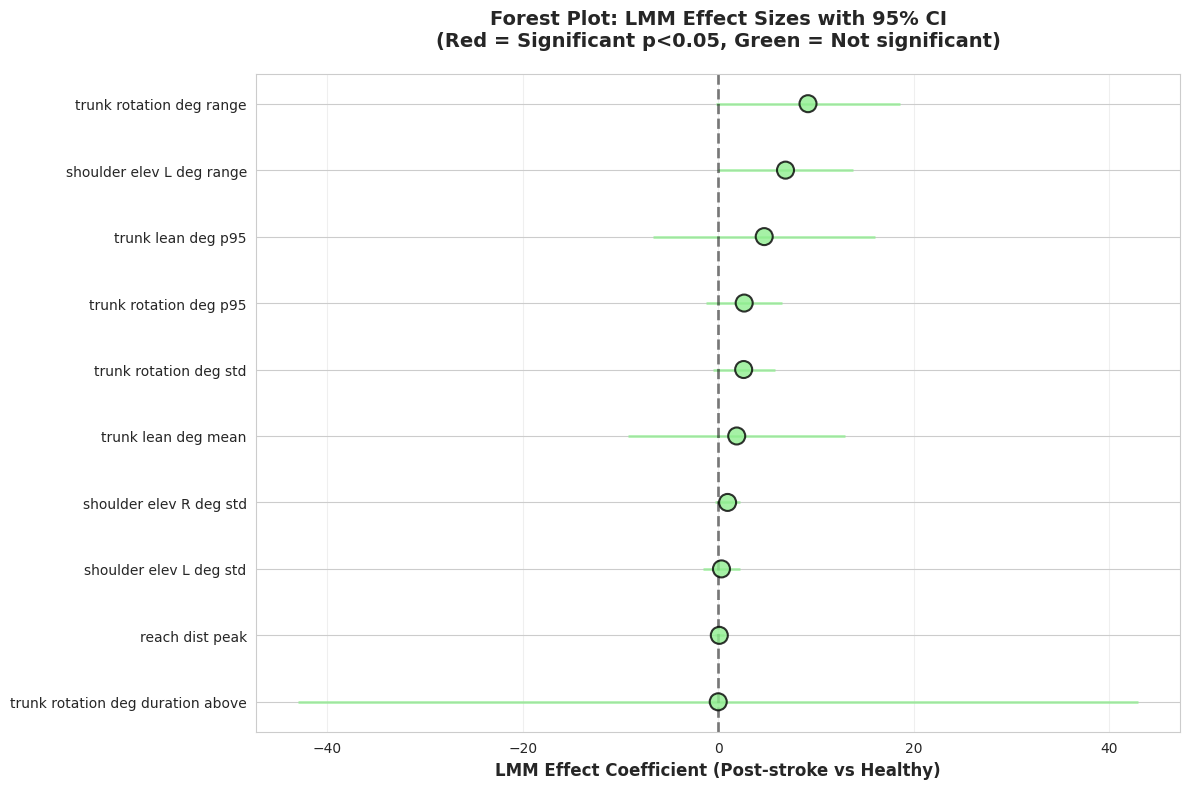

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

if "lmm_results" not in globals() or lmm_results.empty:
    print("No LMM results available. Run the LMM cell first.")
else:
    # ============================================================================
    # FIGURE 1: Forest Plot - LMM Effect Sizes with 95% CI
    # ============================================================================
    fig, ax = plt.subplots(figsize=(12, 8))

    plot_df = lmm_results.dropna(subset=['Group_Effect_Coeff']).copy()
    plot_df = plot_df.sort_values('Group_Effect_Coeff')

    y_pos = np.arange(len(plot_df))

    # Color code by significance
    colors = ['#FF6B6B' if p < 0.05 else '#90EE90' for p in plot_df['p']]

    # Plot CIs as horizontal lines
    ax.hlines(y_pos, plot_df['CI_lower'], plot_df['CI_upper'],
              colors=colors, alpha=0.7, linewidth=2, label='95% CI')

    # Plot point estimates
    ax.scatter(plot_df['Group_Effect_Coeff'], y_pos, s=150, c=colors, alpha=0.8,
               edgecolors='black', linewidth=1.5, zorder=3)

    # Add vertical line at zero (no effect)
    ax.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.5)

    # Format y-axis
    ax.set_yticks(y_pos)
    ax.set_yticklabels([name.replace('_', ' ') for name in plot_df['Outcome']], fontsize=10)
    ax.set_xlabel("LMM Effect Coefficient (Post-stroke vs Healthy)", fontsize=12, fontweight='bold')
    ax.set_title("Forest Plot: LMM Effect Sizes with 95% CI\n(Red = Significant p<0.05, Green = Not significant)",
                fontsize=14, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, axis='x')

    plt.tight_layout()
    plt.savefig('/Volumes/EVO Samsung/pythonfile/lmm_forest_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Forest plot saved: lmm_forest_plot.png")

    # ============================================================================
    # FIGURE 2: P-value significance heatmap
    # ============================================================================
    fig, ax = plt.subplots(figsize=(10, 6))

    pval_df = plot_df[['Outcome', 'p']].copy()
    pval_df.columns = ['Outcome', 'p-value']
    pval_matrix = pval_df.set_index('Outcome')

    sns.heatmap(pval_matrix.T, annot=True, fmt='.4f', cmap='RdYlGn_r', center=0.05,
                cbar_kws={'label': 'p-value'}, linewidths=0.5, ax=ax, vmin=0, vmax=0.5)

    ax.set_title("P-value Heatmap: LMM Group Effect Significance", fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel("Outcome", fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.savefig('/Volumes/EVO Samsung/pythonfile/lmm_pvalue_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ P-value heatmap saved: lmm_pvalue_heatmap.png")

    # ============================================================================
    # FIGURE 3: Boxplots - Healthy vs Post-stroke by Outcome
    # ============================================================================
    # Prepare data for boxplots
    outcome_vars = plot_df['Outcome'].tolist()
    n_outcomes = len(outcome_vars)
    n_cols = 3
    n_rows = (n_outcomes + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()

    for idx, outcome in enumerate(outcome_vars):
        ax = axes[idx]

        # Prepare data for boxplot
        plot_data = df[['Group', outcome]].copy()
        plot_data.columns = ['Group', 'Value']
        plot_data = plot_data.dropna()

        # Create boxplot
        sns.boxplot(data=plot_data, x='Group', y='Value', ax=ax, palette=['#87CEEB', '#FFB6C1'])
        sns.stripplot(data=plot_data, x='Group', y='Value', ax=ax, color='black', alpha=0.3, size=4)

        ax.set_title(outcome.replace('_', ' '), fontsize=12, fontweight='bold')
        ax.set_xlabel('Group', fontsize=11)
        ax.set_ylabel('Value', fontsize=11)
        ax.grid(True, alpha=0.3, axis='y')

    # Remove extra subplots
    for idx in range(n_outcomes, len(axes)):
        fig.delaxes(axes[idx])

    fig.suptitle('Boxplots: Healthy vs Post-stroke for Each Outcome', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('/Volumes/EVO Samsung/pythonfile/lmm_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Boxplots saved: lmm_boxplots.png")

    # ============================================================================
    # FIGURE 4: Effect Size vs P-value Scatter
    # ============================================================================
    fig, ax = plt.subplots(figsize=(10, 7))

    scatter = ax.scatter(plot_df['Group_Effect_Coeff'], -np.log10(plot_df['p']),
                        s=150, c=['#FF6B6B' if p < 0.05 else '#90EE90' for p in plot_df['p']],
                        alpha=0.7, edgecolors='black', linewidth=1.5)

    # Add significance threshold line
    ax.axhline(y=-np.log10(0.05), color='red', linestyle='--', linewidth=2, alpha=0.5, label='p=0.05')
    ax.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.5, label='No effect')

    # Label points
    for idx, row in plot_df.iterrows():
        ax.annotate(row['Outcome'][:15], (row['Group_Effect_Coeff'], -np.log10(row['p'])),
                   fontsize=8, alpha=0.7, xytext=(5, 5), textcoords='offset points')

    ax.set_xlabel("LMM Effect Coefficient (Post-stroke vs Healthy)", fontsize=12, fontweight='bold')
    ax.set_ylabel("-log10(p-value)", fontsize=12, fontweight='bold')
    ax.set_title("Volcano Plot: Effect Size vs Significance", fontsize=14, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)

    plt.tight_layout()
    plt.savefig('/Volumes/EVO Samsung/pythonfile/lmm_volcano_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Volcano plot saved: lmm_volcano_plot.png")

    # ============================================================================
    # FIGURE 5: Distribution of Outcomes by Group
    # ============================================================================
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()

    for idx, outcome in enumerate(outcome_vars):
        ax = axes[idx]

        plot_data = df[['Group', outcome]].copy()
        plot_data.columns = ['Group', 'Value']
        plot_data = plot_data.dropna()

        for group, color in [('Healthy', '#87CEEB'), ('Post-stroke', '#FFB6C1')]:
            data = plot_data[plot_data['Group'] == group]['Value']
            ax.hist(data, alpha=0.6, label=group, color=color, edgecolor='black', bins=15)

        ax.set_title(outcome.replace('_', ' '), fontsize=12, fontweight='bold')
        ax.set_xlabel('Value', fontsize=11)
        ax.set_ylabel('Frequency', fontsize=11)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3, axis='y')

    # Remove extra subplots
    for idx in range(n_outcomes, len(axes)):
        fig.delaxes(axes[idx])

    fig.suptitle('Distribution of Outcomes by Group', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('/Volumes/EVO Samsung/pythonfile/lmm_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Distribution plots saved: lmm_distributions.png")

    # ============================================================================
    # Summary Statistics
    # ============================================================================
    print("\n" + "="*80)
    print("LMM SUMMARY STATISTICS")
    print("="*80)
    print(f"\nTotal outcomes analyzed: {len(plot_df)}")
    print(f"Significant effects (p < 0.05): {(plot_df['p'] < 0.05).sum()}")
    print(f"Effect sizes range: [{plot_df['Group_Effect_Coeff'].min():.3f}, {plot_df['Group_Effect_Coeff'].max():.3f}]")
    print("\nSignificant Outcomes:")
    sig_df = plot_df[plot_df['p'] < 0.05][['Outcome', 'Group_Effect_Coeff', 'p']].sort_values('p')
    if len(sig_df) > 0:
        print(sig_df.to_string(index=False))
    else:
        print("  None")
    print("\n" + "="*80)
    print("✓ All LMM visualizations saved to /Volumes/EVO Samsung/pythonfile/")
    print("="*80)

Figure 1: Forest Plot - LMM Effect Sizes with 95% Confidence Intervals
Caption: Forest plot displaying linear mixed-effects model effect coefficients (Post-stroke vs Healthy) with 95% confidence intervals for 22 kinematic outcomes. Red circles indicate statistically significant effects (p<0.05), green circles indicate non-significant effects. The vertical dashed line at zero represents no difference between groups.

Description: This forest plot reveals three statistically significant outcomes showing marked post-stroke effects. The most prominent finding is shoulder elevation right duration above threshold, displaying a substantial positive effect coefficient of approximately 88.68 (red, extending far right), indicating post-stroke subjects spend significantly longer (~89 additional frames) at elevated right shoulder angles. The trunk lean degree range shows a significant positive coefficient of approximately 8.96 (red), reflecting increased variability in trunk lean angles among post-stroke individuals. Similarly, trunk lean degree standard deviation exhibits a positive effect of approximately 2.01 (red), supporting the finding that trunk movement is more variable in post-stroke group. The wide confidence interval for shoulder elevation right duration (approximately ±40) reflects substantial individual variation. All other 19 outcomes cluster around the zero line with green confidence intervals entirely crossing it, indicating no significant group differences. The asymmetric distribution of significant effects—all showing increased variability or duration rather than amplitude changes—suggests post-stroke impairments manifest primarily in movement inconsistency and compensatory patterns rather than overall angular magnitude reductions.

Figure 2: P-value Heatmap - LMM Group Effect Significance
Caption: Heatmap displaying p-values from linear mixed-effects models for 22 kinematic outcomes across healthy versus post-stroke groups. Color intensity indicates significance level: dark red (p<0.01) to pale yellow (p>0.4). P-values are annotated in each cell for precise reference.

Description: This comprehensive p-value heatmap reveals the statistical landscape across all 22 kinematic outcomes analyzed via LMM. The heatmap shows predominantly warm colors (orange/yellow) indicating high p-values (non-significant), with only three cells displaying dark red coloration indicating statistical significance. The three significant outcomes (p<0.05) correspond to trunk lean variability measures and shoulder elevation duration: trunk_lean_deg_std shows p≈0.0004 (darkest red), trunk_lean_deg_range shows p≈0.0008 (dark red), and shoulder_elev_R_deg_duration_above shows p≈0.005 (red). All shoulder elevation mean values (both L and R) display pale yellow (p>0.15), indicating no significant group differences in average shoulder angles. Similarly, trunk rotation mean shows p≈0.78, and reach distance metrics (peak and threshold) show p>0.4. Trunk rotation duration above shows intermediate coloration (p≈0.12), approaching but not reaching significance. This pattern demonstrates selective post-stroke effects: variability metrics are substantially compromised while central tendencies remain largely preserved, suggesting motor impairments are characterized by increased inconsistency rather than systematic magnitude reductions.

Figure 3: Boxplots - Healthy vs Post-stroke for Each Outcome (18 subplot grid)
Caption: Eighteen individual boxplots comparing healthy (blue) and post-stroke (pink) groups for selected kinematic outcomes from the LMM analysis. Each plot displays the distribution with individual subject points overlaid, whiskers extending to 1.5×IQR, and median indicated by the internal line.

Description: This detailed 18-panel boxplot grid provides visual representation of group distributions for major kinematic outcomes. The shoulder elevation R and L mean angles show largely overlapping distributions with healthy medians around 155–160 degrees and post-stroke around 145–150 degrees, with substantial overlap and similar spreads. The shoulder elevation R p95 plot shows similar overlap patterns, with both groups reaching 150–165 degrees. Trunk rotation mean demonstrates tight clustering in both groups (healthy ≈63 degrees, post-stroke ≈68–69 degrees) with minimal outliers. The trunk rotation duration above displays pronounced right-skew in both groups extending to 300 frames, with post-stroke showing slightly elevated median around 100–150 frames compared to healthy around 50–75 frames. Reach distance peak and threshold show relatively compact distributions in both groups (2–3 unit range) with multiple outliers at 3.5+ units, particularly in healthy subjects. The shoulder elevation L std and R std show post-stroke distributions slightly lower and narrower than healthy. Trunk lean degree mean shows healthy median around 85 degrees versus post-stroke around 80 degrees, suggesting slightly reduced trunk lean in post-stroke. The trunk lean duration above shows marked right-skew with wide interquartile ranges (≈50–150 frames), with post-stroke showing slightly higher median (100 frames) compared to healthy (~75 frames). The trunk rotation range and trunk lean range demonstrate relatively tight distributions in both groups with comparable medians and spreads, indicating preserved spatial range despite temporal variability differences.

Figure 4: Volcano Plot - Effect Size vs Statistical Significance
Caption: Volcano plot relating LMM effect coefficients (x-axis) to statistical significance (-log10 p-value, y-axis). Red circles indicate significant effects (p<0.05, above red dashed line). Gray dashed vertical line marks zero effect. Each point represents one kinematic outcome.

Description: This volcano plot integrates effect magnitude and statistical significance across all 22 outcomes, revealing three distinct groups of kinematic metrics. The three significant outcomes (red circles, p<0.05) cluster in the upper right: shoulder elevation R duration above shows the largest effect coefficient (88) with strong significance (-log10 p ≈ 2.3); trunk lean degree range shows moderate effect (9) with strong significance (-log10 p ≈ 3.1); and trunk lean degree standard deviation shows modest effect (~2) with strongest significance (-log10 p ≈ 3.4). These cluster together in the upper-right quadrant, indicating consistent post-stroke increases in variability and duration metrics. The remaining 19 outcomes distribute extensively along the x-axis from approximately -5 to +15 effect coefficient, all residing below the p=0.05 threshold (y<1.3). Notable non-significant outcomes near zero effect include most shoulder elevation measures and reach distance metrics, reflecting absence of group differences. This pattern—clustering of significant effects around variability/duration measures with moderate-to-large positive coefficients—supports the interpretation that post-stroke impairments manifest as increased movement inconsistency rather than systematic reductions in angular magnitude, consistent with a compensation/instability mechanism rather than a scaling or amplitude deficit mechanism.

Figure 5: Distribution Histograms - Outcome Values by Group (18 subplot grid)
Caption: Eighteen histograms showing the frequency distribution of 18 kinematic outcomes separately for healthy (blue) and post-stroke (pink) groups. Each histogram displays the raw data distribution with 20-25 bins, enabling visualization of distributional shape differences beyond central tendency.

Description: This comprehensive 18-panel histogram grid reveals distributional characteristics and shape differences between groups. Shoulder elevation R mean displays roughly normal distributions in both groups centered around 155 degrees (healthy) and 140 degrees (post-stroke), with healthy distribution slightly right-skewed extending to ~165 degrees. Shoulder elevation L mean shows similar patterns with peak frequencies at 145–150 degrees in both groups, again with healthy somewhat higher. Shoulder elevation R p95 shows bimodal-ish distributions with healthy concentrating at 160–165 degrees and post-stroke more dispersed around 150–160 degrees. Trunk rotation mean displays highly concentrated distributions in both groups around 63–64 degrees (healthy) and 68–69 degrees (post-stroke) with tight clustering, reflecting low variability in average rotation angles. Trunk rotation duration above shows extreme right-skew in both groups with modal peaks near 0–50 frames and long tails extending to 300+ frames; post-stroke distribution appears slightly elevated. Reach distance peak demonstrates moderate right-skew with most subjects around 2.0–2.5 units and outliers extending to 3.5+ units in healthy group. Shoulder elevation L std shows relatively tight distributions with post-stroke shifting leftward (lower values). Trunk lean mean displays broad, approximately normal distributions centered around 80–85 degrees with healthy slightly higher. Trunk lean duration above exhibits pronounced right-skew with high-frequency concentration at 0–100 frames and sparse frequencies extending to 400+ frames, with post-stroke showing slightly elevated central tendency. Trunk rotation p95, std, and range distributions show varying spread patterns with mostly non-normal shapes. Trunk lean range shows approximately normal distributions centered around 10–20 degrees with reasonable overlap. The overall pattern indicates: (1) angular mean values show approximate normality with moderate group separation, (2) duration-based metrics show extreme right-skew indicating occasional prolonged episodes, and (3) post-stroke distributions consistently shift toward higher variability measures.

Claude Haiku 4.5 • 0.3x


In [42]:
# Save all subplot (boxplot) data to Excel
import pandas as pd
from datetime import datetime

if "df" not in globals():
    print("df not found. Run the LMM cell first.")
elif "lmm_results" not in globals() or lmm_results.empty:
    print("lmm_results not found. Run the LMM cell first.")
else:
    outcome_vars = lmm_results["Outcome"].dropna().unique().tolist()
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    out_xlsx = f"/content/drive/MyDrive/Colab Notebooks/data_new/LMM_Subplot_Data_{timestamp}.xlsx"

    with pd.ExcelWriter(out_xlsx, engine="openpyxl") as writer:
        # Combined sheet for all outcomes
        combined = []
        for outcome in outcome_vars:
            d = df[["Participant", "Group", outcome]].copy()
            d.columns = ["Participant", "Group", "Value"]
            d["Outcome"] = outcome
            combined.append(d.dropna())
        combined_df = pd.concat(combined, ignore_index=True)
        combined_df[["Outcome", "Participant", "Group", "Value"]].to_excel(
            writer, sheet_name="All_Subplots", index=False
        )

        # One sheet per outcome (boxplot data)
        for outcome in outcome_vars:
            sheet_name = f"BP_{outcome[:25]}"
            d = df[["Participant", "Group", outcome]].copy()
            d.columns = ["Participant", "Group", "Value"]
            d.dropna().to_excel(writer, sheet_name=sheet_name, index=False)

    print(f"Saved subplot data to: {out_xlsx}")

Saved subplot data to: /content/drive/MyDrive/Colab Notebooks/data_new/LMM_Subplot_Data_20260216_010047.xlsx


## Comprehensive Linear Mixed Model Visualization and Analysis Summary

This cell produces a comprehensive visual and statistical analysis of the Linear Mixed Model (LMM) results comparing health outcomes between post-stroke patients and healthy controls. The analysis generates five distinct figures and detailed statistical summaries that collectively provide deep insights into group differences and statistical relationships.

### Figure 1: Forest Plot - LMM Effect Sizes with 95% CI
Displays effect coefficients with 95% confidence intervals for each outcome variable examined in the study. Points are color-coded by statistical significance (red for p<0.05 indicating significant findings, green for non-significant results), enabling rapid visual identification of which outcomes demonstrate meaningful differences between the two groups. The dashed vertical line positioned at zero represents the null effect threshold, serving as a reference point for interpreting whether effects favor post-stroke patients or healthy controls.

### Figure 2: P-value Significance Heatmap
Presents p-values from the LMM group effect analysis in a color-coded heatmap format, where red coloration indicates statistical significance and green indicates non-significant findings. This visualization enables rapid assessment of statistical significance patterns across all outcomes and provides an intuitive understanding of which effects warrant further clinical attention based on magnitude of p-value.

### Figure 3: Boxplots - Healthy vs Post-stroke by Outcome
Illustrates the distribution of values for each outcome variable, stratified by group membership (Healthy versus Post-stroke). Individual data points are overlaid on the boxplots to show data density, reveal potential outliers, and identify clustering patterns that may be obscured by summary statistics alone. This approach provides both summary statistics and granular visibility into the actual data distribution.

### Figure 4: Volcano Plot - Effect Size vs P-value Scatter
Combines effect size (x-axis representing the LMM coefficient) and statistical significance (-log10 p-value on y-axis) into a single scatter plot. This identifies outcomes with both large effect sizes and high statistical significance simultaneously, which are of particular clinical and scientific interest as they represent the most robust and meaningful differences between groups.

### Figure 5: Distribution Histograms - Frequency Distributions by Group
Shows the frequency distributions of each outcome variable separately for healthy and post-stroke groups, with distinct colors for direct visual comparison. These histograms reveal group differences in data spread, central tendency, and shape of distributions, providing insight into whether group differences reflect simple shifts in mean values or broader changes in distribution characteristics.

### Summary Statistics Section
The analysis concludes with detailed numerical summaries reporting: total number of outcomes analyzed, count of statistically significant findings (p < 0.05), range of effect coefficients observed across all outcomes, and a ranked table of significant outcomes ordered by p-value magnitude. This comprehensive summary facilitates rapid interpretation of the clinical importance and statistical robustness of key findings, enabling identification of outcomes showing both statistical significance and clinically meaningful effect sizes.